<a href="https://colab.research.google.com/github/wiltacca/Portfolio/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Install essential package in Colaboratory.

!pip install feature-engine
!pip install Sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 260 kB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 27.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.6 MB/s 


In [3]:
# Import all the required packages.

# For pandas an numpy 
import pandas as pd
import numpy as np

# For sklearn preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# For sklearn linear model 
from sklearn.linear_model import LinearRegression

# For sklearn compose
from sklearn.compose import ColumnTransformer

# For sklearn metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# For Feature Engine imputation
import feature_engine.imputation as mdi
from feature_engine.imputation import RandomSampleImputer

# For Feature Engine outliers
from feature_engine.outliers import Winsorizer

# For scipy statistical analysis
import scipy.stats
from scipy import stats

# For statsmodels statistical analysis
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm

# For ploting visualisation
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

# Making the figures higher defintion.
plt.rcParams['figure.figsize'] = (12, 10)
%config InlineBackend.figure_formats = ['retina']  

One of the latest exploratory data analysis libraries is a new open-source Python library called Sweetviz, for just the purposes of finding out data types, missing information, distribution of values, correlations, etc. Sweetviz generates beautiful, high-density visualizations to kickstart EDA (Exploratory Data Analysis) with just two lines of code!

# Question 1: Is There A Correlation Between Good Performance In One Module And Another? (20 Marks)

## Exploratory Data Analysis

In [6]:
# Load the dataset.

url = 'https://raw.githubusercontent.com/wiltacca/Portfolio/main/Datasets/student-grades.csv'

data = pd.read_csv(url)

# Get the first n rows.

data.head()

Student ID   ACAD_PROG CLASS  Math.CA  Math.TEST1  Math.TEST2  Math.TEST3  \
0           1  Dip_Social   T05       84          95         100         100   
1           2  Dip_Social   T05       85          80          98          63   
2           3  Dip_Social   T05       91          55          78          83   
3           4  Dip_Social   T05       83          95          80          70   
4           5  Dip_Social   T05       81          93          98          80   

   Math.SemMark Math.SemGrade  Science.CA1  ...  Comms.ASG2  Comms.CA1  \
0            93            A+         83.2  ...        75.5       86.0   
1            82             A         85.2  ...        77.5       88.0   
2            80             A         83.6  ...        76.0       95.0   
3            82             A         86.6  ...        74.0       79.0   
4            87            A+         80.5  ...        73.0      100.0   

   Comms.CA2 Comms.SemMark  Comms.SemGrade  Tech.CA1  Tech.CA2  Tech.ASG1  \
0       70.0          78.0              B+      99.2      96.7       85.0   
1       80.0          80.0               A      96.0      80.0       90.0   
2       75.0          80.0               A      99.2      86.3       84.0   
3       70.0          75.0              B+      92.5      84.7       72.0   
4       85.0          78.0              B+      98.3      61.7       82.0   

   Tech.SemMark Tech.Sem Grade  
0          93.0             A+  
1          89.0             A+  
2          89.0             A+  
3          82.0              A  
4          81.0              A  

[5 rows x 25 columns]

In [7]:
# Let perform exploratory analysis of the dataset.

# pandas.DataFrame.info prints a concise summary of a DataFrame.

data.info() # NaN is regarded as float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student ID        335 non-null    int64  
 1   ACAD_PROG         335 non-null    object 
 2   CLASS             335 non-null    object 
 3   Math.CA           335 non-null    int64  
 4   Math.TEST1        335 non-null    int64  
 5   Math.TEST2        335 non-null    int64  
 6   Math.TEST3        335 non-null    int64  
 7   Math.SemMark      335 non-null    int64  
 8   Math.SemGrade     335 non-null    object 
 9   Science.CA1       333 non-null    float64
 10  Science.CA2       333 non-null    float64
 11  Science.ASG1      333 non-null    float64
 12  Science.SemMark   333 non-null    float64
 13  Science.SemGrade  333 non-null    object 
 14  Comms.ASG1        332 non-null    float64
 15  Comms.ASG2        332 non-null    float64
 16  Comms.CA1         332 non-null    float64
 1

In [8]:
# Let view some basic statistical details like percentile, mean, std etc. of a dataframe.

# pandas.DataFrame.describe generates descriptive statistics.

# include‘all’, list-like of dtypes or None (default), optional.
# A white list of data types to include in the result. Ignored for Series.
# 'all’ : All columns of the input will be included in the output.

data.describe(include='all')

Student ID   ACAD_PROG CLASS     Math.CA  Math.TEST1  Math.TEST2  \
count     335.0000         335   335  335.000000  335.000000  335.000000   
unique         NaN           5    14         NaN         NaN         NaN   
top            NaN  Dip_Social   T08         NaN         NaN         NaN   
freq           NaN         101    28         NaN         NaN         NaN   
mean      168.0000         NaN   NaN   82.140299   80.020896   77.982090   
std        96.8504         NaN   NaN   11.468573   17.345283   20.844297   
min         1.0000         NaN   NaN   36.000000   10.000000   12.000000   
25%        84.5000         NaN   NaN   76.000000   70.000000   65.000000   
50%       168.0000         NaN   NaN   85.000000   85.000000   83.000000   
75%       251.5000         NaN   NaN   91.000000   93.000000   95.000000   
max       335.0000         NaN   NaN  100.000000  100.000000  100.000000   

        Math.TEST3  Math.SemMark Math.SemGrade  Science.CA1  ...  Comms.ASG2  \
count   335.000000    335.000000           335   333.000000  ...  332.000000   
unique         NaN           NaN            10          NaN  ...         NaN   
top            NaN           NaN            A+          NaN  ...         NaN   
freq           NaN           NaN           107          NaN  ...         NaN   
mean     67.119403     77.895522           NaN    79.389189  ...   77.178614   
std      21.576852     13.543382           NaN     5.876234  ...    8.381702   
min       0.000000     25.000000           NaN    60.200000  ...    0.000000   
25%      54.500000     70.500000           NaN    75.900000  ...   74.000000   
50%      70.000000     81.000000           NaN    80.000000  ...   78.500000   
75%      83.500000     88.000000           NaN    83.600000  ...   82.000000   
max     100.000000     99.000000           NaN    92.700000  ...   93.500000   

         Comms.CA1   Comms.CA2 Comms.SemMark  Comms.SemGrade    Tech.CA1  \
count   332.000000  332.000000    332.000000             332  332.000000   
unique         NaN         NaN           NaN              10         NaN   
top            NaN         NaN           NaN               A         NaN   
freq           NaN         NaN           NaN             133         NaN   
mean     87.442771   76.912651     79.186747             NaN   89.475904   
std       8.151495   11.015022      6.322745             NaN   13.660392   
min      45.000000    0.000000     26.000000             NaN   15.000000   
25%      84.000000   70.000000     77.000000             NaN   84.925000   
50%      88.000000   75.000000     80.000000             NaN   95.000000   
75%      93.000000   85.000000     83.000000             NaN   99.200000   
max     100.000000  100.000000     92.000000             NaN  100.000000   

          Tech.CA2   Tech.ASG1  Tech.SemMark Tech.Sem Grade  
count   332.000000  332.000000    332.000000            332  
unique         NaN         NaN           NaN             10  
top            NaN         NaN           NaN             A+  
freq           NaN         NaN           NaN             92  
mean     63.925000   73.825602     75.599398            NaN  
std      21.246358   20.161539     16.026764            NaN  
min       5.000000    0.000000     17.000000            NaN  
25%      48.300000   66.000000     68.000000            NaN  
50%      65.000000   78.000000     78.500000            NaN  
75%      80.800000   89.000000     88.000000            NaN  
max     100.000000  100.000000    100.000000            NaN  

[11 rows x 25 columns]

In [9]:
# Let inspect unique values of the categorical variables.

# pandas.Series.unique returns unique values of Series object.

print('ACAD_PROG:')
print(data['ACAD_PROG'].unique())

print()

print('CLASS: ')
print(data['CLASS'].unique())

print()

print('Math.SemGrade:')
print(data['Math.SemGrade'].unique())

print()

print('Science.SemGrade:')
print(data['Science.SemGrade'].unique())

print()

print('Comms.SemGrade:')
print(data['Comms.SemGrade'].unique())

print()

print('Tech.Sem Grade:')
print(data['Tech.Sem Grade'].unique())

ACAD_PROG:
['Dip_Social' 'Dip_Security' 'Dip_Banking ' 'Dip_Technology' 'Dip_Media']

CLASS: 
['T05' 'T06' 'T07' 'T08' 'T13' 'T14' 'T09' 'T10' 'T01' 'T02' 'T03' 'T04'
 'T11' 'T12']

Math.SemGrade:
['A+' 'A' 'B+' 'B' 'C' 'D' 'D+' 'AD' 'C+' 'F']

Science.SemGrade:
['B+' 'A+' 'AD' 'A' 'B' 'C' 'C+' 'F' nan 'D+']

Comms.SemGrade:
['B+' 'A' 'B' 'D+' 'AD' 'C+' 'A+' 'C' 'F' nan 'D']

Tech.Sem Grade:
['A+' 'A' 'B+' 'B' 'D+' 'F' 'C+' 'D' 'C' 'AD' nan]


In [10]:
# Let check shape (rows, columns) of dataframe.

# pandas.DataFrame.shape returns a tuple representing the dimensionality of the DataFrame.

data.shape

(335, 25)

## Perform Suitable Technique To Deal With Missing Values For Categorical Variables

In [11]:
# Let find categorical variables.

cat_cols = [c for c in data.columns if data[c].dtypes=='O'] # =='O' is (Python) object

# Get the first n rows.

data[cat_cols].head()

ACAD_PROG CLASS Math.SemGrade Science.SemGrade Comms.SemGrade  \
0  Dip_Social   T05            A+               B+             B+   
1  Dip_Social   T05             A               B+              A   
2  Dip_Social   T05             A               A+              A   
3  Dip_Social   T05             A               AD             B+   
4  Dip_Social   T05            A+                A             B+   

  Tech.Sem Grade  
0             A+  
1             A+  
2             A+  
3              A  
4              A

In [12]:
# Let find numerical variables.

num_cols = [c for c in data.columns if data[c].dtypes!='O'] # !='O' is NOT (Python) object

# Get the first n rows.

data[num_cols].head()

Student ID  Math.CA  Math.TEST1  Math.TEST2  Math.TEST3  Math.SemMark  \
0           1       84          95         100         100            93   
1           2       85          80          98          63            82   
2           3       91          55          78          83            80   
3           4       83          95          80          70            82   
4           5       81          93          98          80            87   

   Science.CA1  Science.CA2  Science.ASG1  Science.SemMark  Comms.ASG1  \
0         83.2         87.5          70.4             79.0        79.0   
1         85.2         87.5          67.7             79.0        78.0   
2         83.6        100.0          81.9             86.0        75.0   
3         86.6        100.0          82.9             87.0        74.0   
4         80.5         87.5          77.8             81.0        64.0   

   Comms.ASG2  Comms.CA1  Comms.CA2  Comms.SemMark  Tech.CA1  Tech.CA2  \
0        75.5       86.0       70.0           78.0      99.2      96.7   
1        77.5       88.0       80.0           80.0      96.0      80.0   
2        76.0       95.0       75.0           80.0      99.2      86.3   
3        74.0       79.0       70.0           75.0      92.5      84.7   
4        73.0      100.0       85.0           78.0      98.3      61.7   

   Tech.ASG1  Tech.SemMark  
0       85.0          93.0  
1       90.0          89.0  
2       84.0          89.0  
3       72.0          82.0  
4       82.0          81.0

In [13]:
# Let find the number of missing data for the catgorical variables.

data[cat_cols].isnull().sum().sort_values(ascending=True)

ACAD_PROG           0
CLASS               0
Math.SemGrade       0
Science.SemGrade    2
Comms.SemGrade      3
Tech.Sem Grade      3
dtype: int64

## Imputation of Missing Values For Categorical Variables

There are three categorical varaibles have missing values, for instance, Science.SemGrade, Comms.SemGrade and Tech.Sem Grade.

In [ ]:
# Let create a frequent imputation transformer.

# The CategoricalImputer() replaces missing data in categorical variables by a string like 
# ‘Missing’ or any other entered by the user. Alternatively, it replaces missing data
# by the most frequent category.

# variables : list, default=None.
# The list of variables to be imputed. If None, the imputer will find and select 
# all object type variables.

# imputation_method : str, default=missing
# Desired method of imputation. Can be ‘frequent’ or ‘missing’.

mode_imputer = mdi.CategoricalImputer(variables=['Science.SemGrade', 'Comms.SemGrade', 'Tech.Sem Grade']
                                      , imputation_method = 'frequent')

# Let fit imputation transformer to the train set so that it learns the most frequent categories.

mode_imputer.fit(data[cat_cols])

In [ ]:
# Let view the dictionary with the most frequent values. 

mode_imputer.imputer_dict_

In [ ]:
# let replace (transform) the missing values with frequent categories.

# Note: transform the data - transformation performs based on the parameters (mode_imputer)
# that were computed during fit.

data[cat_cols] = mode_imputer.transform(data[cat_cols])

In [ ]:
# Check that missing data for the catgorical variables have been imputated.

data[cat_cols].isnull().sum().sort_values(ascending=True)

### Commentary: Imputation of Missing Values For Categorical Variables

Mode imputation consists of replacing missing values with the Mode, which is easy to implement and the most common method of data imputation for categorical variables. Frequent categories are estimated using the dataset. Thus, it needs to learn and store these parameters, which I can do using the Feature Engine's transformers.

I set up FrequentCategoryImputer(), specifying the variables to impute in a list. With fit(),
the FrequentCategoryImputer() learned and stored frequent categories in a dictionary
in the imputer_dict_ attribute. With the transform() method, missing values in the
dataset were replaced with stored parameters, which allowed me to obtain pandas dataframes without missing data.

## Perform Suitable Technique To Deal With Missing Values For Numerical Variables

In [ ]:
# Let find the number of missing data for the numerical variables.

data[num_cols].isnull().sum().sort_values(ascending=True)

## Imputation of Mssing Values For Numerical Variables

There are fourteen numerical varaibles have missing values, for instance, Science.SemMark, Science.CA1, Science.CA2, Tech.ASG1, Comms.ASG1, Comms.ASG2, Comms.CA1, Comms.CA2, Comms.SemMark, 
Tech.CA1, Tech.CA2 and Tech.SemMark.

In [ ]:
# Let create a random sample imputer.

# Justification for using this method:
# Random sampling imputation consists of extracting random observations from the pool of 
# available values in the variable. 
# Random sampling imputation preserves the original distribution, which differs from the 
# other imputation techniques and is suitable for numerical and categorical variables.

# The RandomSampleImputer() replaces missing data in each feature with a random sample 
# extracted from the variables in the dataset. 
# The RandomSampleImputer() works with both numerical and categorical variables.

imputer = RandomSampleImputer()

# fit the imputer to the train set.

imputer.fit(data[num_cols])

In [ ]:
# let replace (transform) the missing values for the numerical variables.

# Note: transform the data - replace the missing values .
# Transformation performs based on the parameters (imputer) that were computed during fit. 

data[num_cols] = imputer.transform(data[num_cols])

In [ ]:
# Check that missing data for the numerical variables have been imputated.

data[num_cols].isnull().sum().sort_values(ascending=True)

### Commentary: Imputation of Missing Values For Numerical Variables

I have used the Random sampling imputation as it is a common used method among the Data Scientist, which consists of extracting random observations from the pool of available values in the variable. Random sampling imputation preserves the original distribution and can be used for numerical and categorical variables.

I have carried out random sample imputation with RandomSampleImputer() from Feature Engine. First, with the fit() method, the RandomSampleImputer() stores a copy of the dataset. Then, with transform(), the imputer extracts values at random from the stored dataset and replaces the missing information with them, thereby returning the complete pandas dataframe.


In [ ]:
# Let check that the entire dataset (dataframe) have no missing data.

data.isnull().sum()

## Determine If There Is A Correlation Between The Results of Two Modules of Your Choice.

In [ ]:
# Let determine if there is a correlation between Math.SemMark and Tech.SemMark.

# numpy.corrcoef returns Pearson product-moment correlation coefficients.

np.corrcoef(data['Math.SemMark'], data['Tech.SemMark'])

### Commentary: Correlation Between The Results of Two Modules of Your Choice

Positive 1 means that there is a perfect, positive correlation between two features, as one feature goes up, the other goes up exactly in proportion. If there is a negative number.

Zero means there is no correlation positive or negative between two features. They move completely at random to one another.

Negative 1 means that there is a perfect, negative or inverse correlation between two features. As one feature goes up, the other goes down and vise versa.

-------------------------------------------------------------------------------------------------

A moderate positive correlation of 63% between Math.SemMark and Tech.SemMark, there is a positive correlation between two features, as one feature goes up, the other goes up exactly in proportion.

## How Did The Correlation Compare Across Students From Different Academic Programs?

In [ ]:
# Let compute correlation between Math.SemMark arcoss students from different academic programs.

# str.get_dummies creates dummy (integer) variables that correspond to the string values, 
# and corrwith is another way to compute correlation when I need to do so between a mixture of 
# rows and columns (corr just works with columns only).

# pandas.DataFrame.corrwith that is Pairwise correlation is computed between rows or columns of 
# DataFrame with rows or columns of Series or DataFrame. 
# DataFrames are first aligned along both axes before computing the correlations.

data['ACAD_PROG'].str.get_dummies().corrwith(data['Math.SemMark']/data['Math.SemMark'].max()
                                             ,method='pearson')

### Commentary: Correlation Compare Across Students From Different Academic Programs

The Pearson product-moment correlation coefficient (or Pearson correlation coefficient, for short) is a measure of the strength of a linear association between two variables and is denoted by r. Basically, a Pearson product-moment correlation attempts to draw a line of best fit through the data of two variables, and the Pearson correlation coefficient, r, indicates how far away all these data points are to this line of best fit (i.e., how well the data points fit this new model/line of best fit).

Correlation vs. Causation Do not fall into the trap of mistaking correlation for causation. The rain falls, the plants grow, thats causation because there is a causal link between the water of the rain and the plants growing. On the other hand, did you know that the rates of violent crime and murder have been known to jump when ice cream sales do? 

Positive 1 means that there is a perfect, positive correlation between two features, as one feature goes up, the other goes up exactly in proportion. If there is a negative number.

Zero means there is no correlation positive or negative between two features. They move completely at random to one another.

Negative 1 means that there is a perfect, negative or inverse correlation between two features. As one feature goes up, the other goes down and vise versa.

-------------------------------------------------------------------------------------------------

The correlation coefficient is very close to 0, sugguesting little or no association between Dip_Banking and Math.SemMark, they move completely at random to one another.

A weak negative correlation between Dip_Media and Math.SemMark of -19.4%, there is an inverse correlation between two features. As one feature goes up, the other goes down and vise versa.

A weak positive correlation between Dip_Security and Math.SemMark of 15.4%, there is a positive correlation between two features. As one feature goes up, the other goes up exactly in proportion.

The correlation coefficient is very close to 0, sugguesting little or no association between between Dip_Social and Math.SemMark, they move completely at random to one another.

The correlation coefficient is very close to 0, sugguesting little or no association between Dip_Technology and Math.SemMark, they move completely at random to one another.

In [ ]:
# Let compute correlation between Tech.SemMark arcoss students from different academic programs.

# str.get_dummies creates dummy (integer) variables that correspond to the string values, 
# and corrwith is another way to compute correlation when I need to do so between a mixture of 
# rows and columns (corr just works with columns only).

# pandas.DataFrame.corrwith that is Pairwise correlation is computed between rows or columns of 
# DataFrame with rows or columns of Series or DataFrame. 
# DataFrames are first aligned along both axes before computing the correlations.

data['ACAD_PROG'].str.get_dummies().corrwith(data['Tech.SemMark']/data['Tech.SemMark'].max()
                                             ,method='pearson')

### Commentary: Correlation Compare Across Students From Different Academic Programs

The Pearson product-moment correlation coefficient (or Pearson correlation coefficient, for short) is a measure of the strength of a linear association between two variables and is denoted by r. Basically, a Pearson product-moment correlation attempts to draw a line of best fit through the data of two variables, and the Pearson correlation coefficient, r, indicates how far away all these data points are to this line of best fit (i.e., how well the data points fit this new model/line of best fit).

Correlation vs. Causation Do not fall into the trap of mistaking correlation for causation. The rain falls, the plants grow, thats causation because there is a causal link between the water of the rain and the plants growing. On the other hand, did you know that the rates of violent crime and murder have been known to jump when ice cream sales do? 

Positive 1 means that there is a perfect, positive correlation between two features, as one feature goes up, the other goes up exactly in proportion. If there is a negative number.

Zero means there is no correlation positive or negative between two features. They move completely at random to one another.

Negative 1 means that there is a perfect, negative or inverse correlation between two features. As one feature goes up, the other goes down and vise versa.

-------------------------------------------------------------------------------------------------

The correlation coefficient is very close to 0, sugguesting little or no association between Dip_Banking and Tech.SemMark, they move completely at random to one another.

A weak negative correlation between Dip_Media and Tech.SemMark of -17.6%, there is an inverse correlation between two features. As one feature goes up, the other goes down and vise versa.

A weak positive correlation between Dip_Security and Tech.SemMark of 18.4%, there is a positive correlation between two features.  As one feature goes up, the other goes up exactly in proportion.

The correlation coefficient is very close to 0, sugguesting little or no association between Dip_Social and Tech.SemMark, they move completely at random to one another.

The correlation coefficient is very close to 0, sugguesting little or no association between  Dip_Technology and Tech.SemMark, they move completely at random to one another.

In [ ]:
# Let create a new dataframe for the academic group.

data_academicgroup = data[['ACAD_PROG','Math.SemMark', 'Science.SemMark', 'Comms.SemMark'
                           , 'Tech.SemMark']]

# print the newly created dataframe for the academic group.

data_academicgroup

In [ ]:
# Let inspect the correlation visually by plotting the scatter plots as well as histograms.

# PairGrid object with hue.

graph = sns.PairGrid(data_academicgroup, hue ='ACAD_PROG') 

# Type of graph for diagonal. 

graph = graph.map_diag(plt.hist) 

# Type of graph for non-diagonal.

graph = graph.map_offdiag(plt.scatter) 

# To add legends.

graph = graph.add_legend() 

# Show the plot.

plt.show() 

# Question 2: Is The Distribution of Marks Similar Across Academic Groups? Is There A Particular Academic Group That Fared Better? (15 Marks)


## Know The Data Much Faster With The New Sweetviz Python Library

In [ ]:
import sweetviz as sv 

# To create a report to analyze() for a single dataset.

report = sv.analyze(data_academicgroup)

                                             |          | [  0%]   00:00 -> (? left)


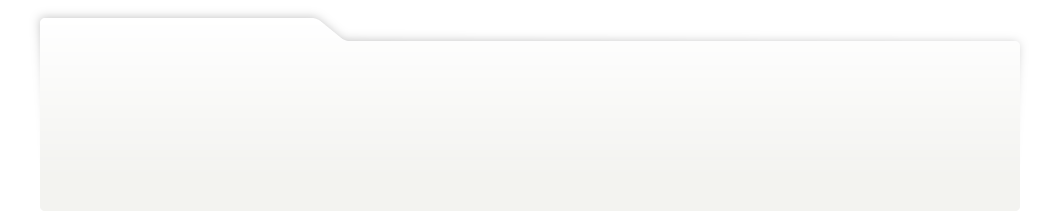
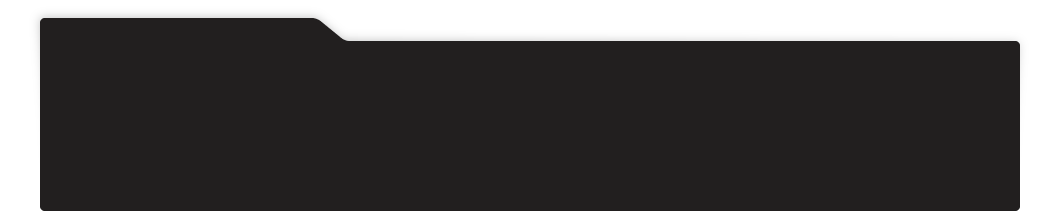
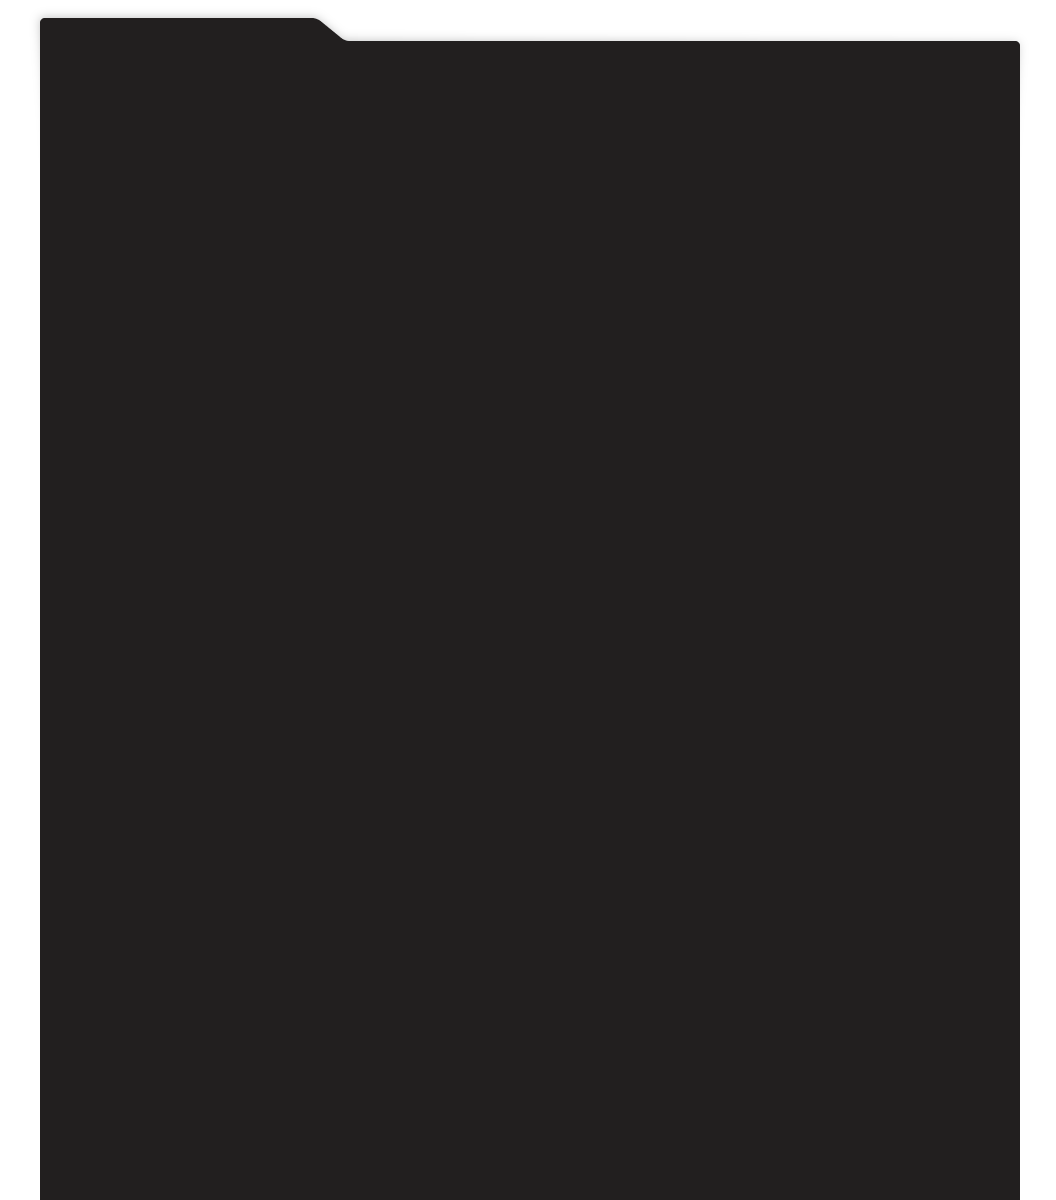
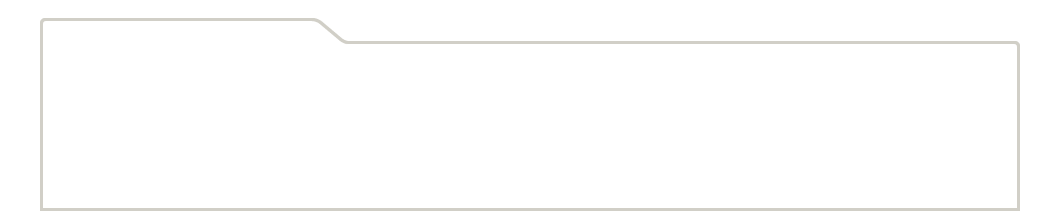
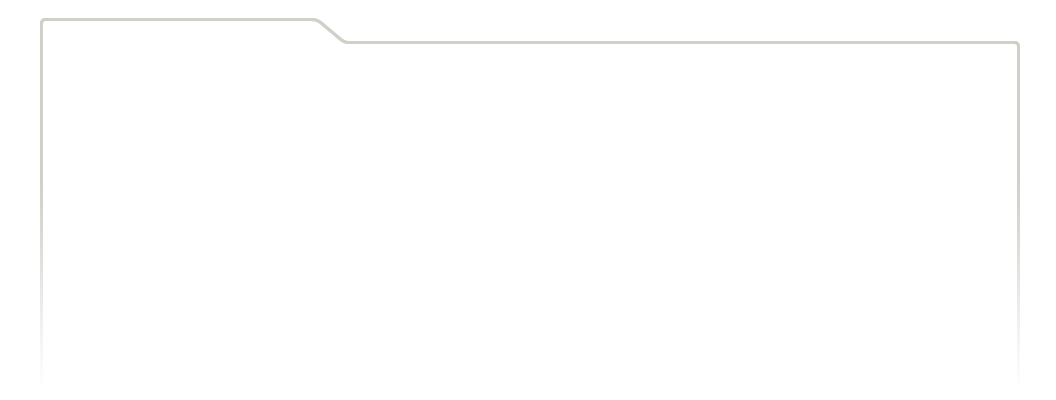
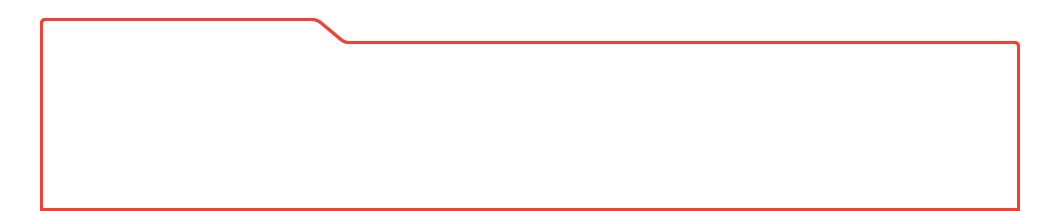
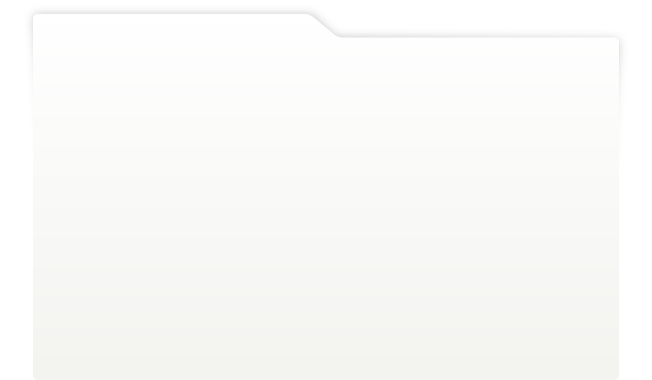
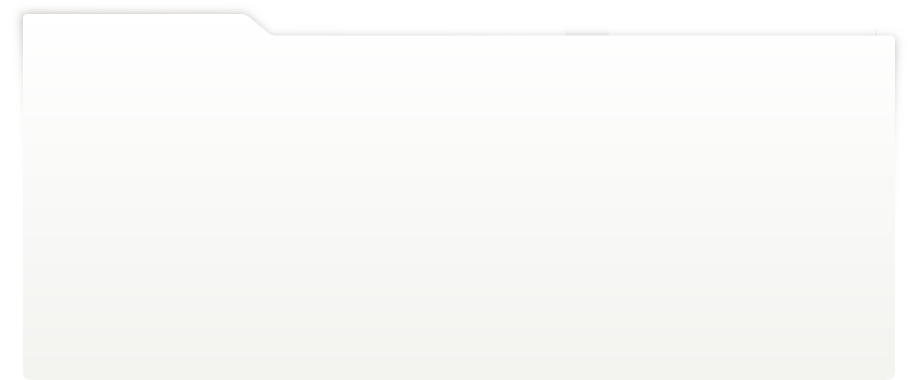
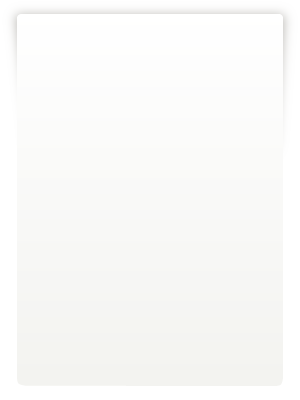
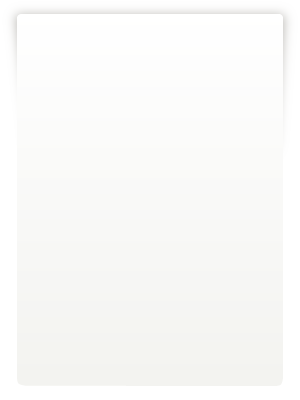
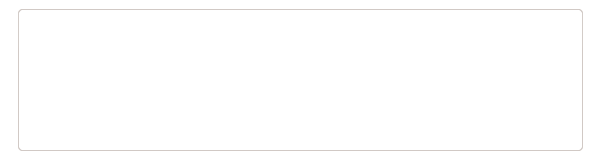
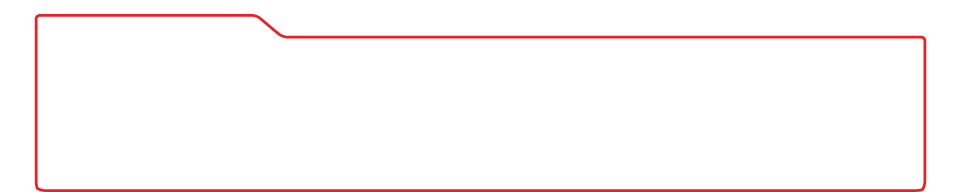
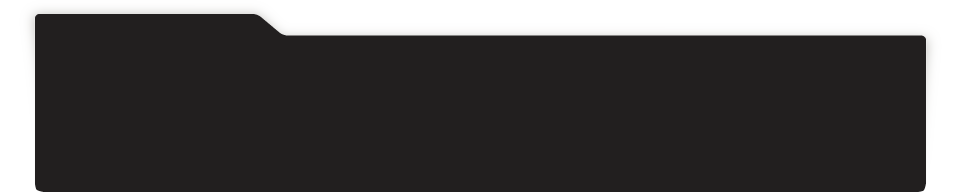
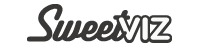
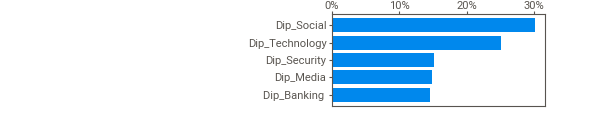
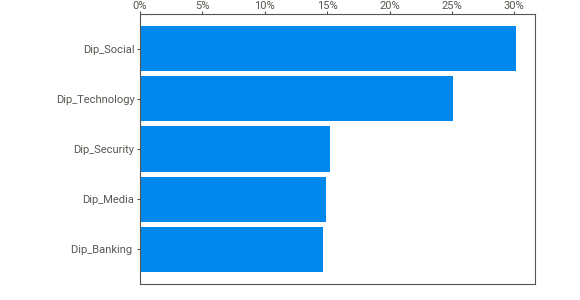
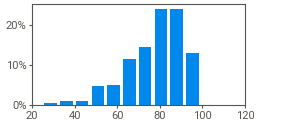
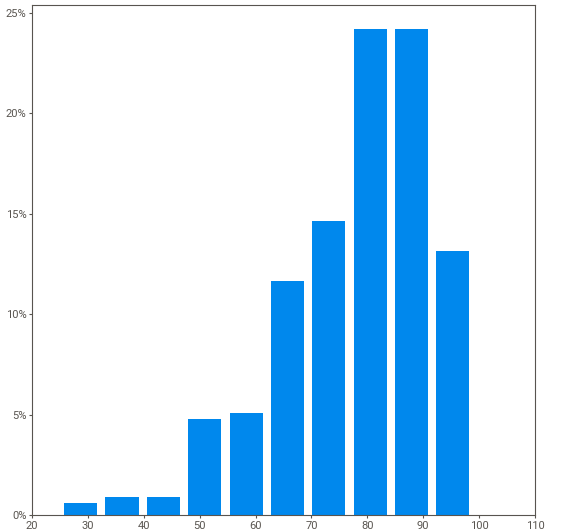
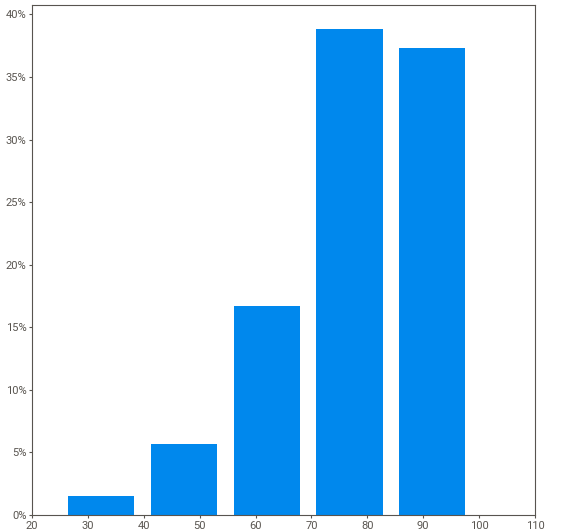
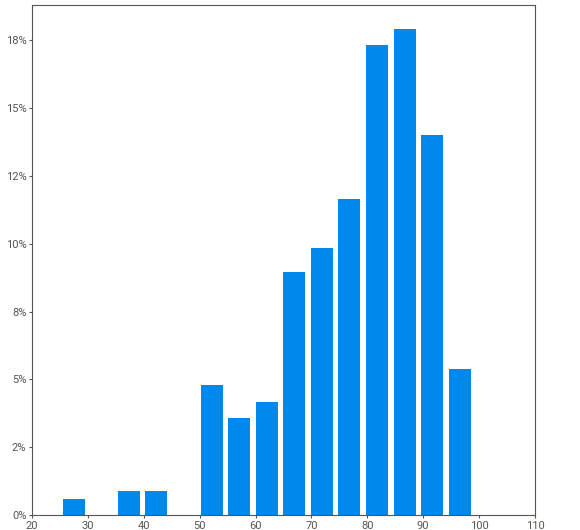
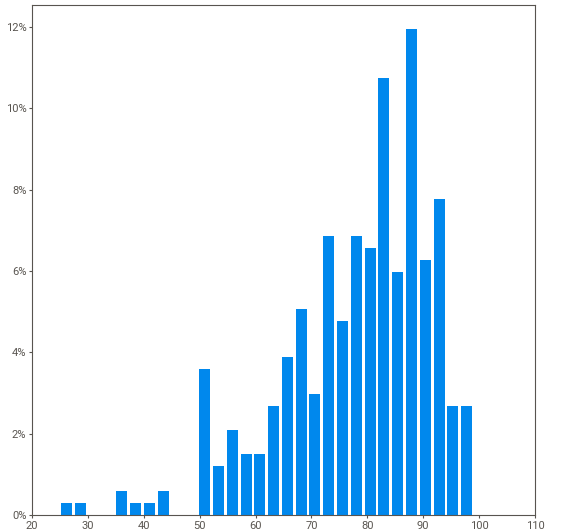
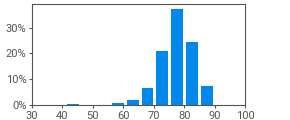
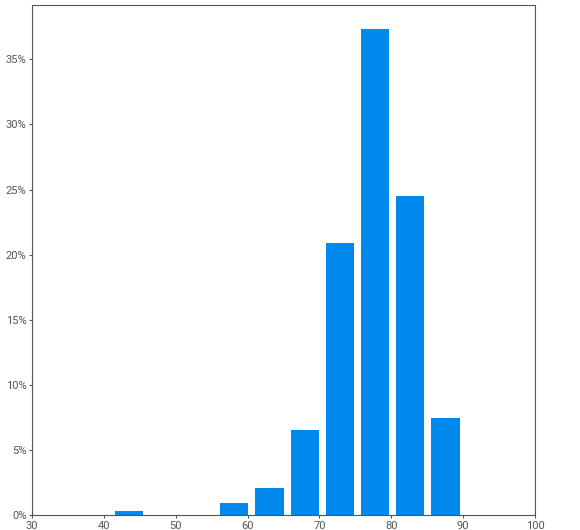
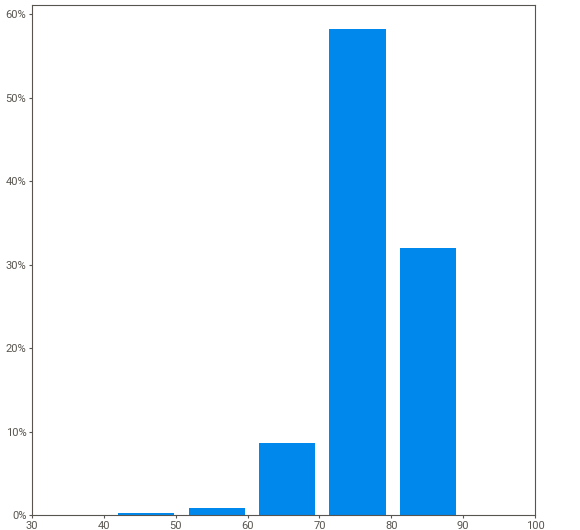
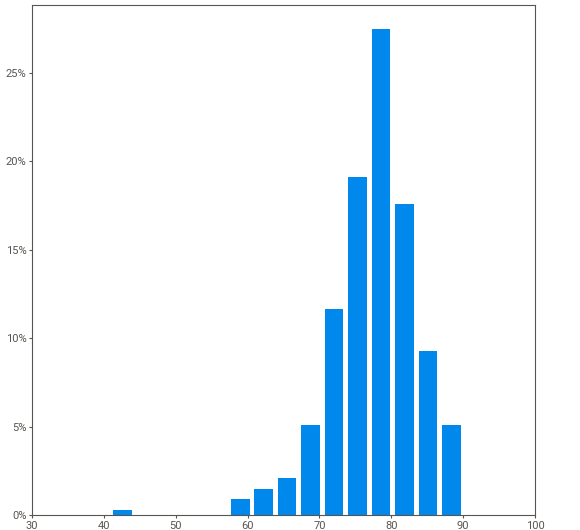
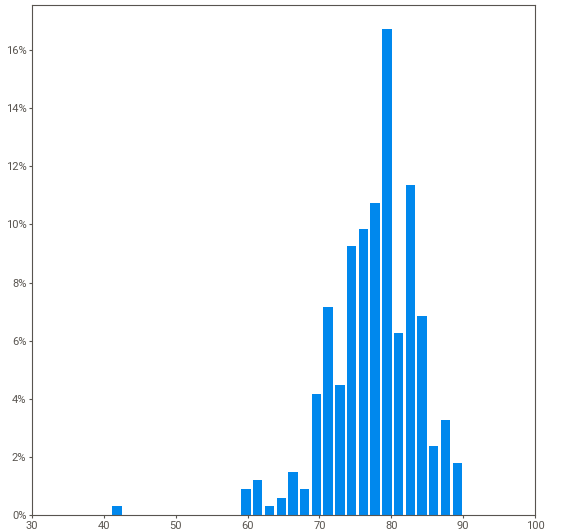
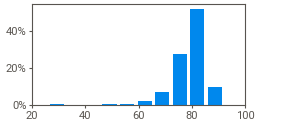
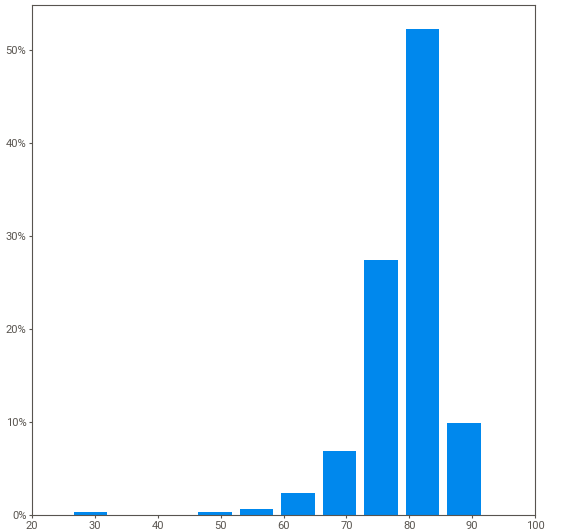
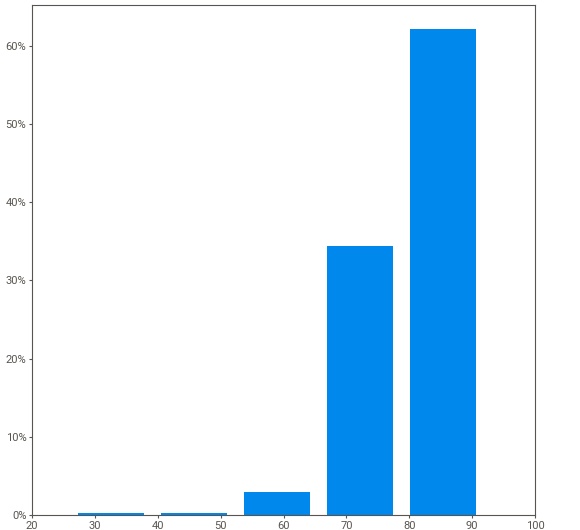
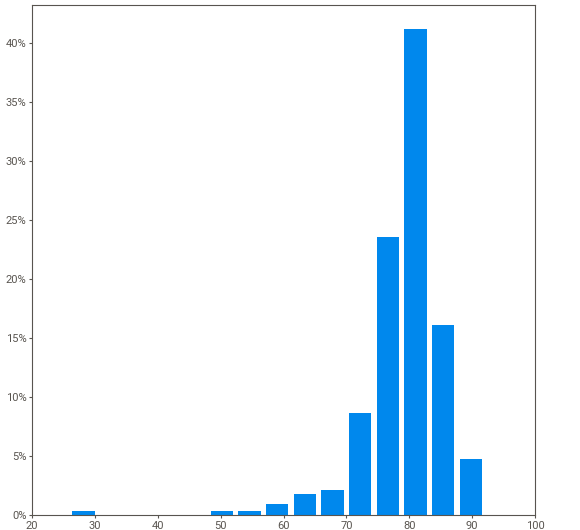
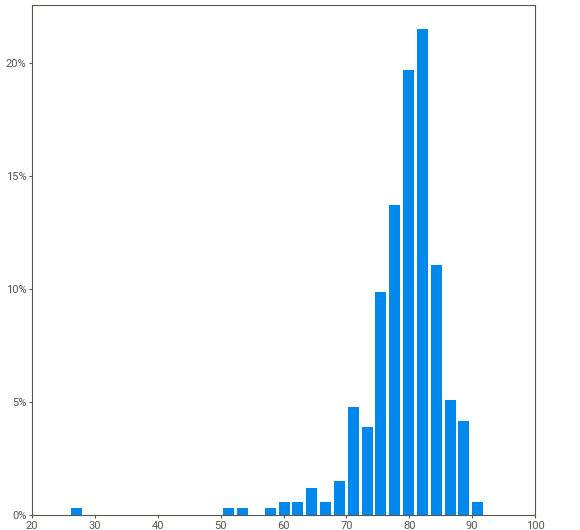
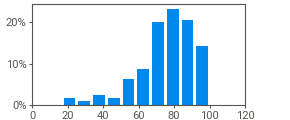
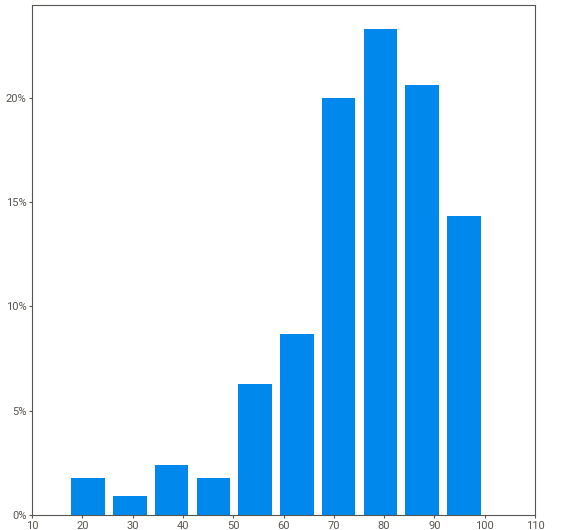
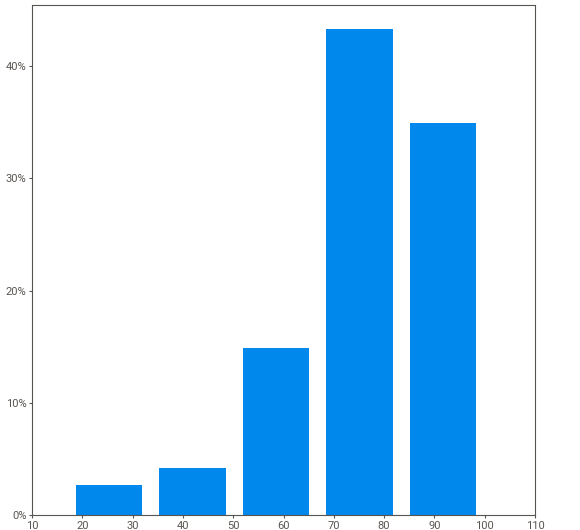
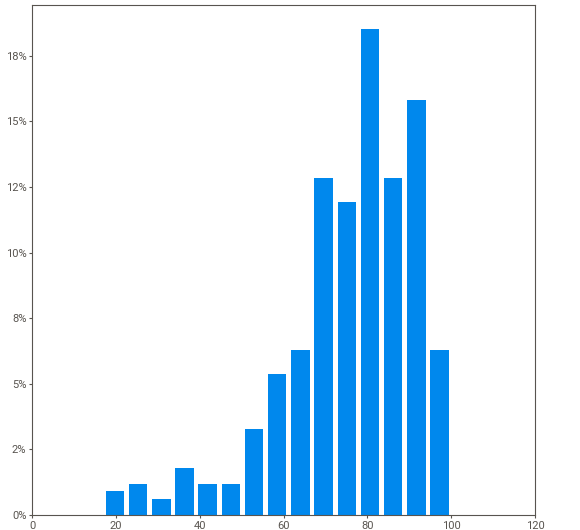
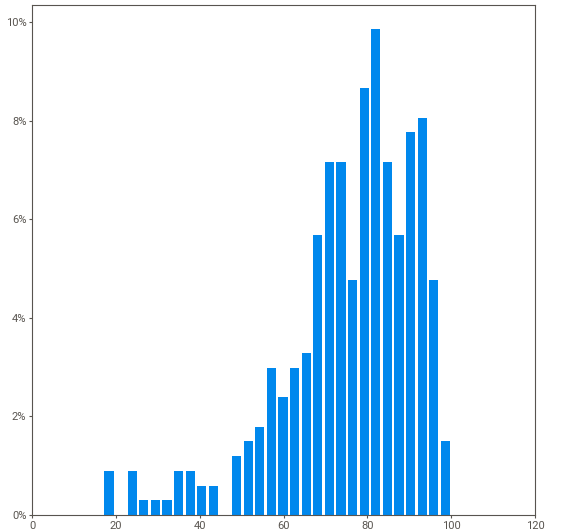
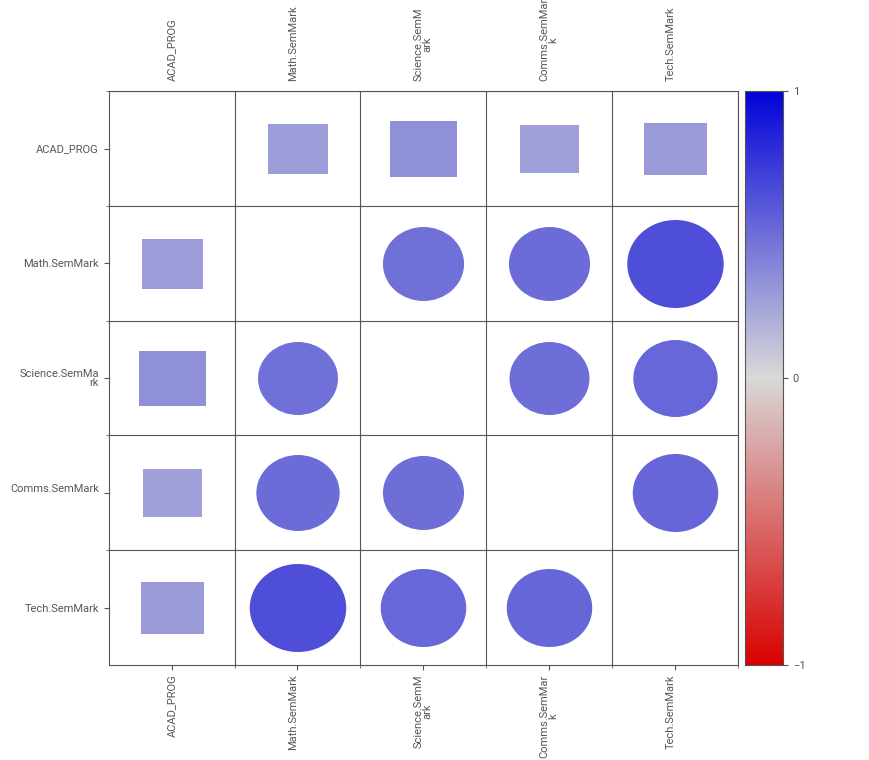
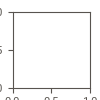

In [ ]:
# Let generate output for the The Sweetviz report.

report.show_notebook()

One of the latest exploratory data analysis libraries is a new open-source Python library called Sweetviz, for just the purposes of finding out data types, missing information, distinct values, zero values, distribution of values, correlations, numerical and categorical associations, MIN, MAX, MEDIAN, quartiles, range, IQR, standard deviation, vraiance, sum, skewness, kurtosis, most frequent values, smallest values, largest values, histograms for numerical variables, bar plots for categorical variables and more.

The "Associations" button unlocks a very powerful analysis of associations and correlations. This graph is a composite of the visuals from Drazen Zaric: Better Heatmaps and Correlation Matrix Plots in Python. Basically, in addition to showing the traditional numerical correlations, it unifies in a single graph both numerical correlation, the uncertainty coefficient (for categorical-categorical) and correlation ratio (for categorical-numerical). Note that the trivial diagonal is left empty, for clarity.


The same data is also found in the "detail" pane of each variable:

It is worth noting these correlation/association methods should not be taken as absolute, as they make some assumptions on the underlying distribution of data and relationships. However they can be a very useful starting point.

Note that for numerical data, I can change the number of "bins" in the graph, to better gauge distribution, as well as how the target feature correlates. 

## Distribution And Dispersion of Numercal Variables 

In [ ]:
# I have created a function to evaluate the distribution and dispersion of numercal variables
# that take a dataframe and a variable name as input and plot a histogram next to a Q-Q plot
# as well as a boxplot.

# scipy.stats.probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False):
# Calculate quantiles for a probability plot, and optionally show the plot

def diagnostic_plots(df, variable):
    
    # Function to plot a histogram, a Q-Q plot and a boxplot
    # side by side, for a certain variable.
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 3, 1)
    df[variable].hist(bins=30)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title('Normal Q-Q Plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[variable], width=0.5)
    plt.title('Boxplot')

    plt.show()

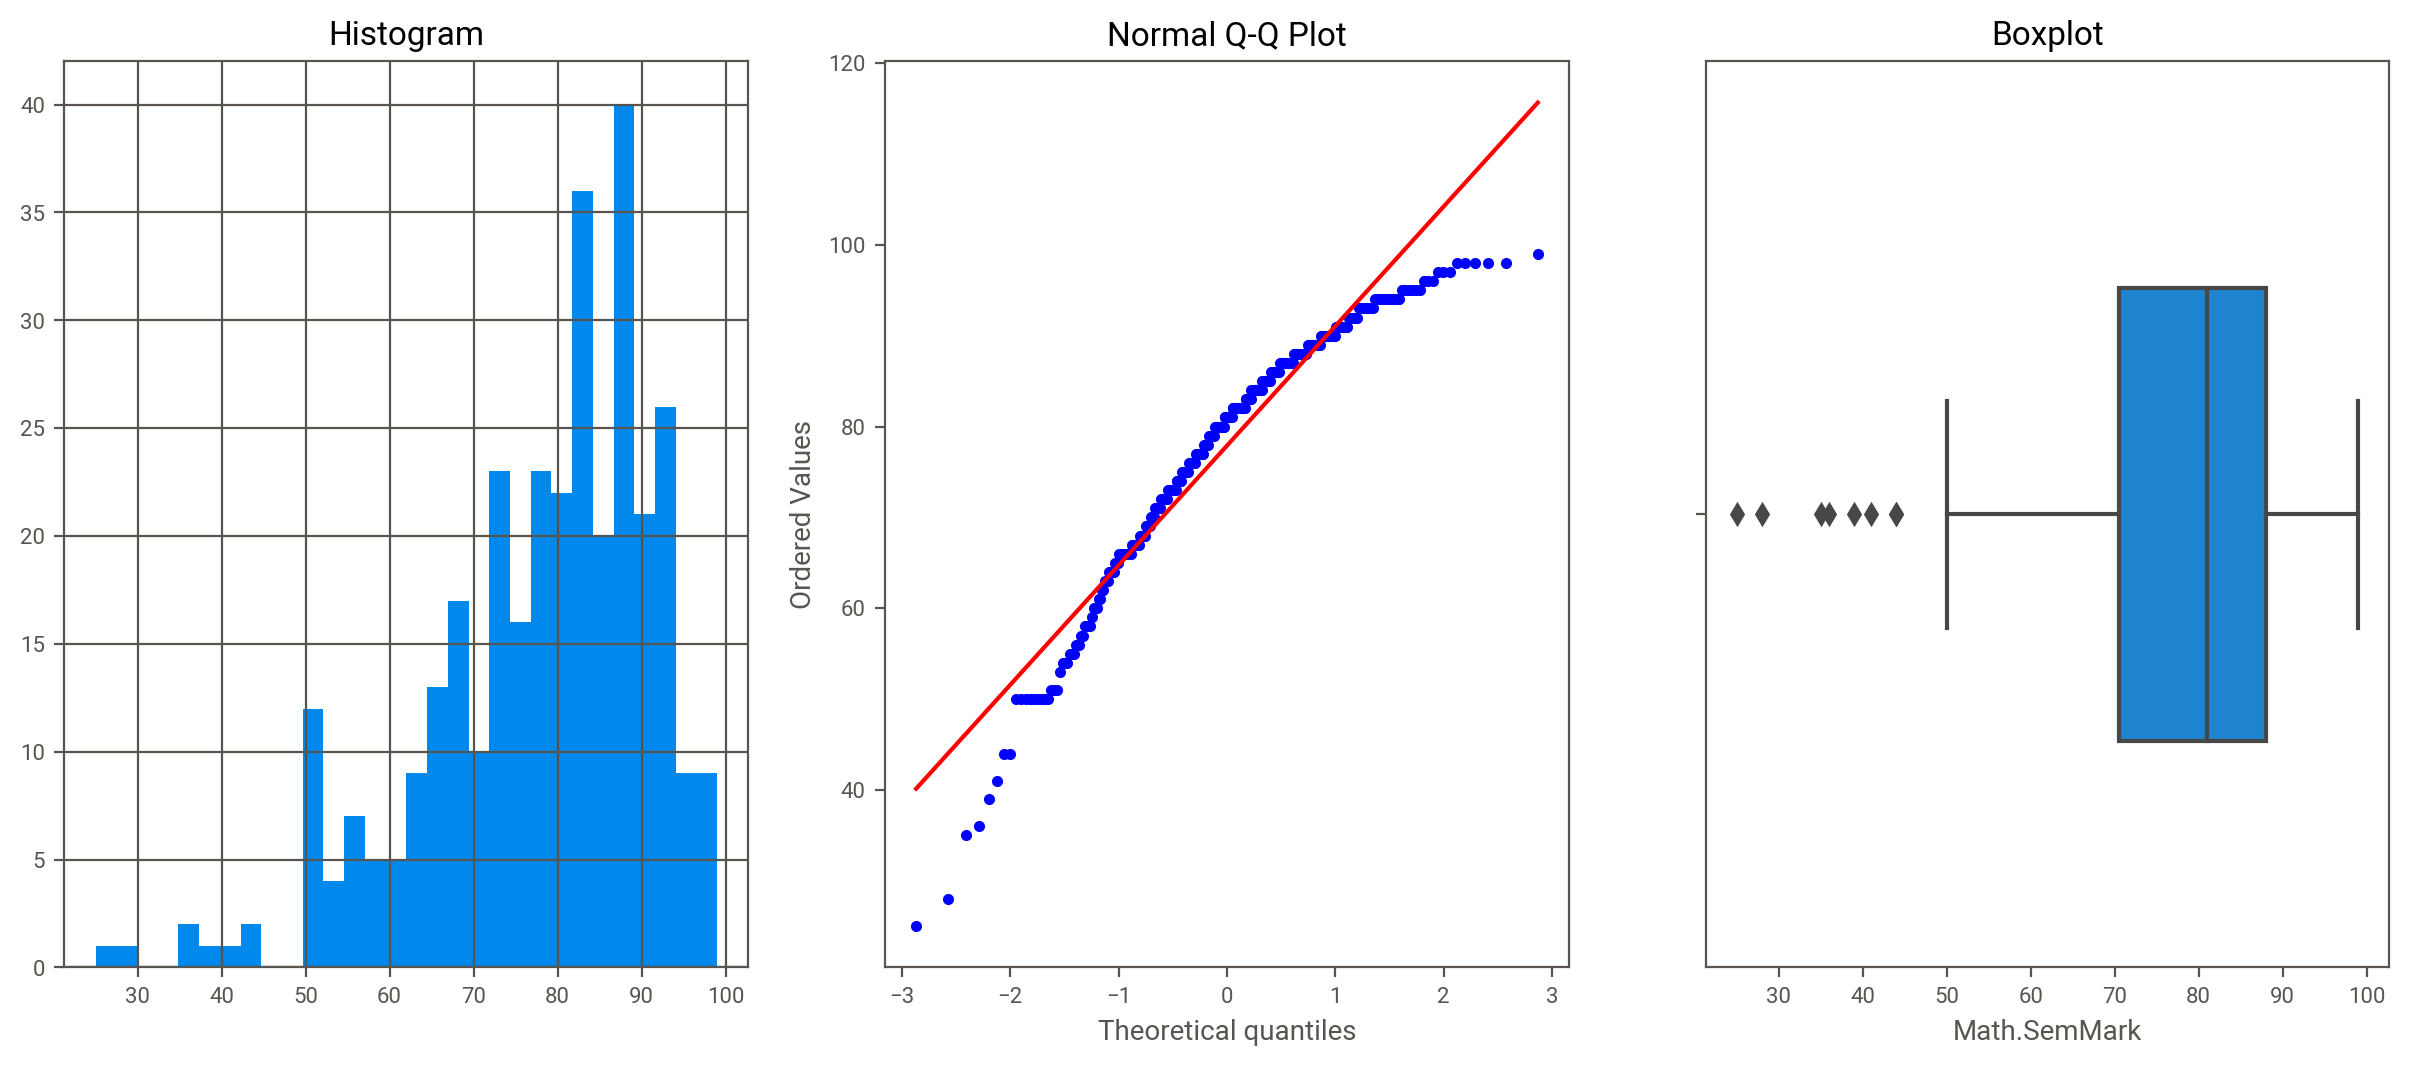

In [ ]:
# Let check the distribution of the Math.SemMark variable.

diagnostic_plots(data_academicgroup, 'Math.SemMark')

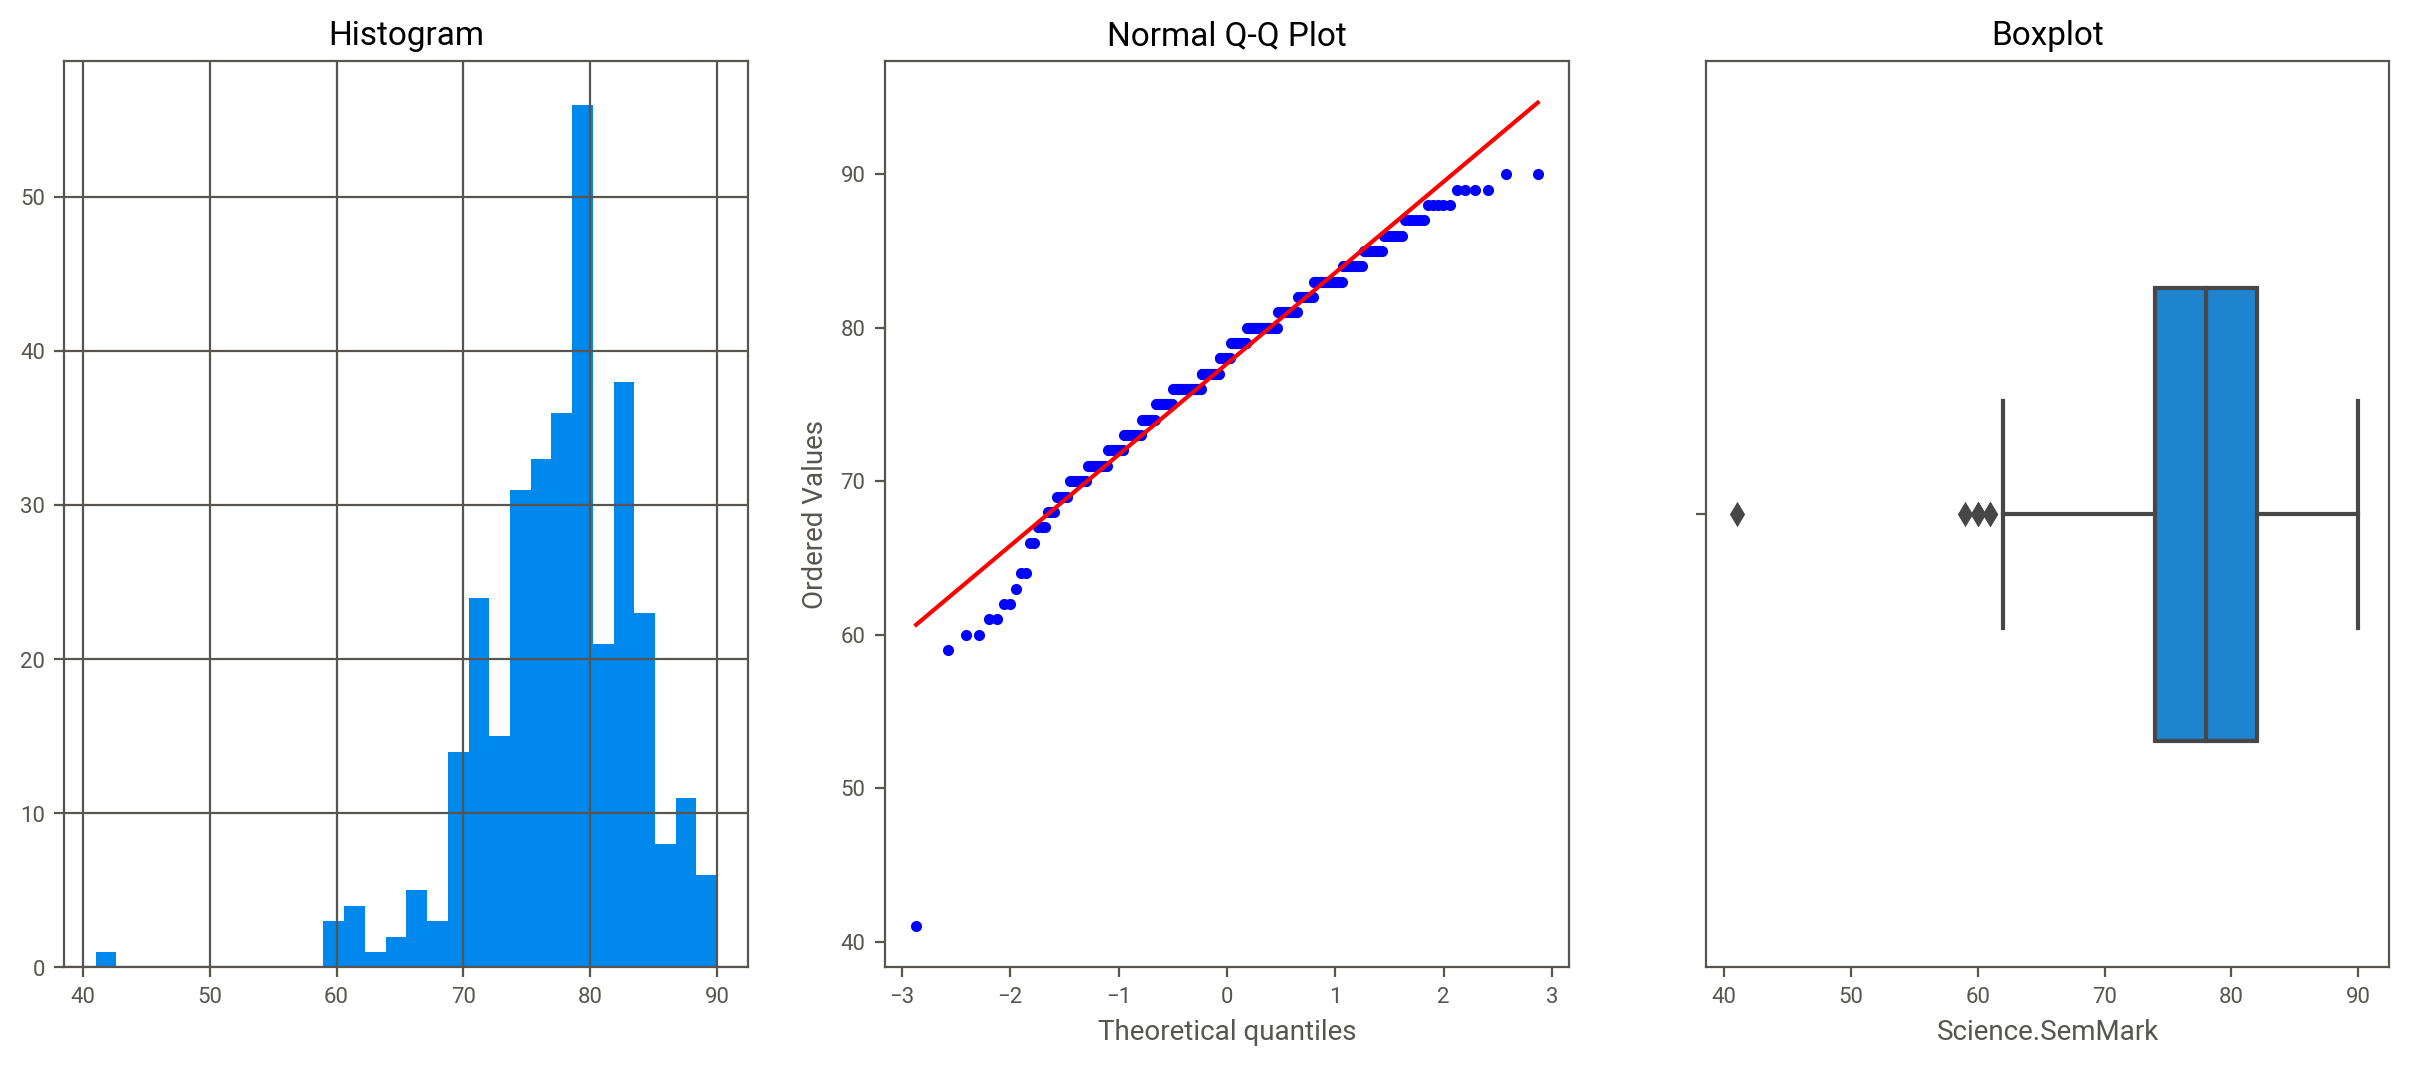

In [ ]:
# Let check the distribution of the Science.SemMark variable.

diagnostic_plots(data_academicgroup, 'Science.SemMark')

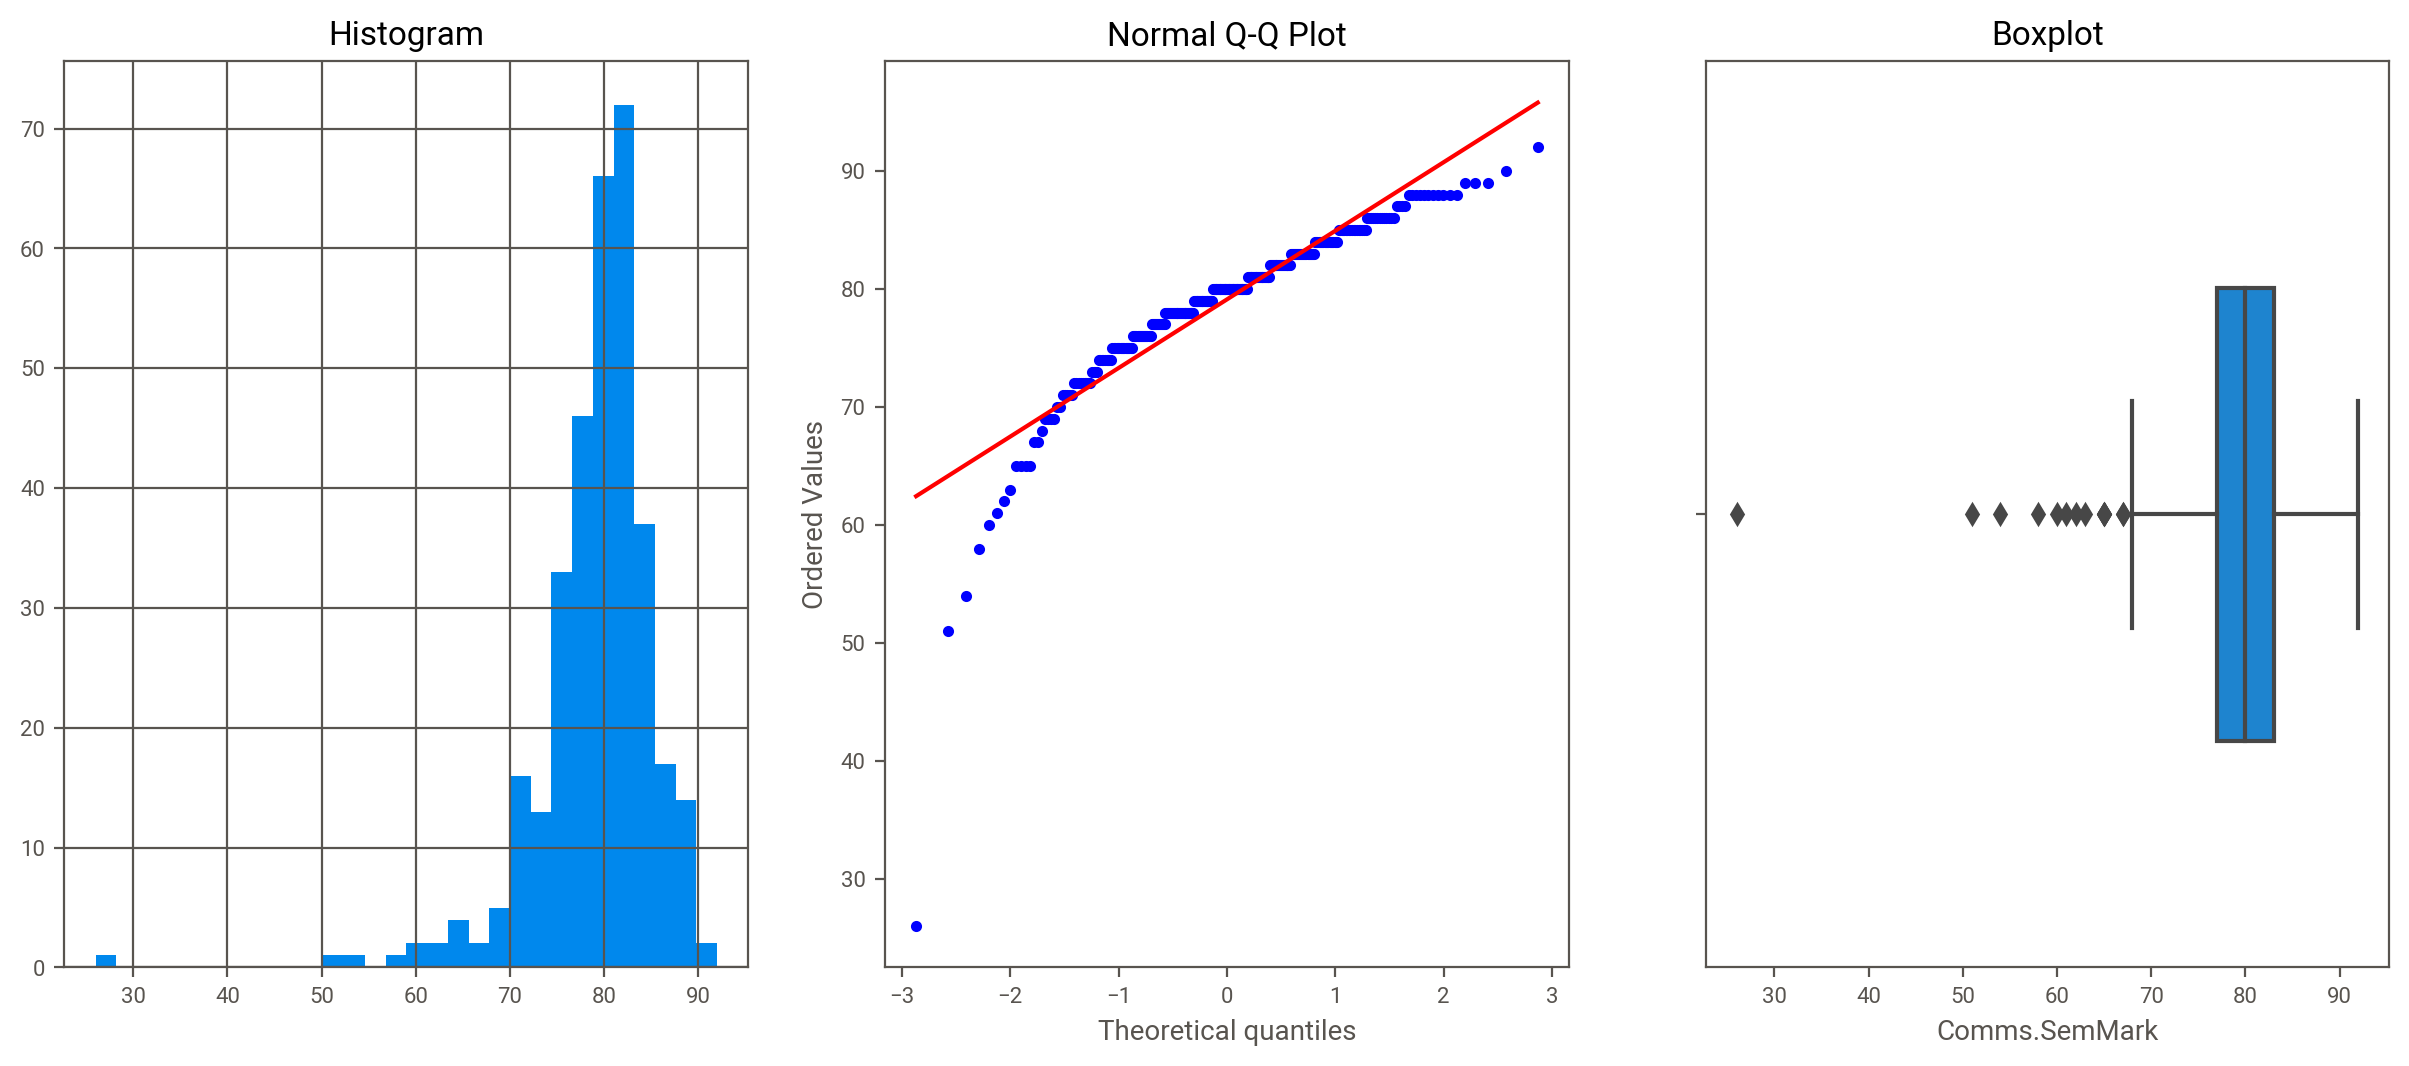

In [ ]:
# Let check the distribution of the Comms.SemMark variable.

diagnostic_plots(data_academicgroup, 'Comms.SemMark')

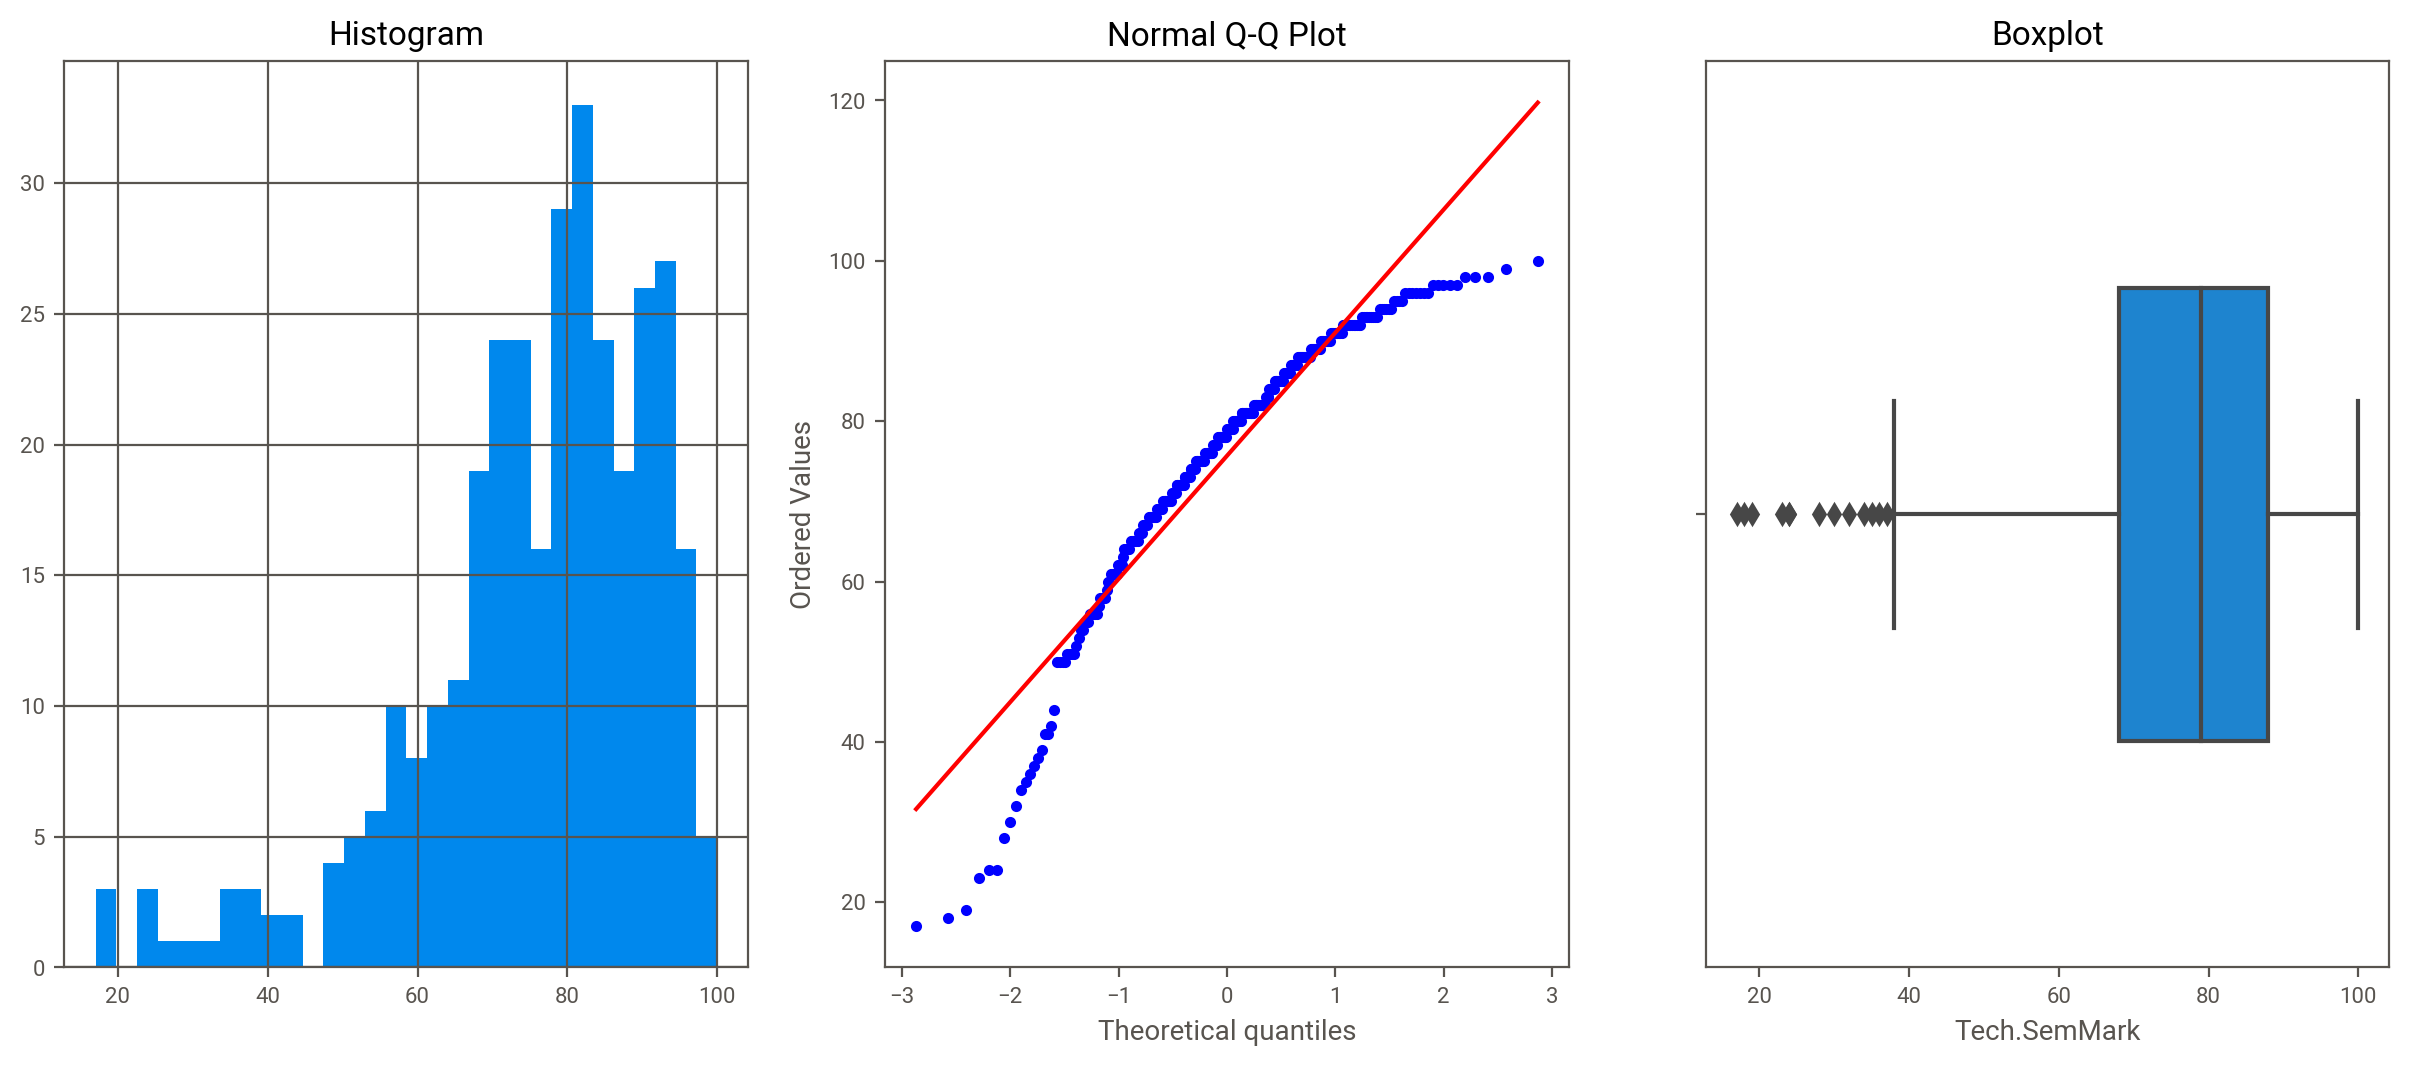

In [ ]:
# Let check the distribution of the Tech.SemMark variable.

diagnostic_plots(data_academicgroup, 'Tech.SemMark')

### Commentary: Distribution And Dispersion of Numercal Variables 

Numerical variables are simply those for which the values are numbers. The first thing that I do when I have numerical variables is to understand what values the variable can take, as well as the distribution and dispersion. This can be achieved with a histogram.

In Statistics, Q-Q (quantile-quantile) plots play a very vital role to graphically analyze and compare two probability distributions by plotting their quantiles against each other. If the two distributions which I am comparing are exactly equal then the points on the Q-Q plot will perfectly lie on a straight line y = x. 

Q-Q plots are used to find the type of distribution for a random variable whether it be a Gaussian Distribution, Uniform Distribution, Exponential Distribution or even Pareto Distribution, etc. I can tell the type of distribution using the power of the Q-Q plot just by looking at the plot. In general, I am talking about Normal distributions only due to concept of 68–95–99.7 rule which perfectly fits into the normal distribution so I know how much of the data lies in the range of first standard deviation, second standard deviation and third standard deviation from the mean. 

Q-Q plots are also used to find the skewness (a measure of “asymmetry”) of a distribution. When I plot theoretical quantiles on the x-axis and the sample quantiles whose distribution I want to know on the y-axis then I see a very peculiar shape of a Normally distributed Q-Q plot for skewness. Tailed Q-Q plots

Similarly, I can talk about the Kurtosis (a measure of “Tailedness”) of the distribution by simply looking at its Q-Q plot.

The box plot is a graphical way of
representing the distribution of data on the basis of five number summary: (1)
minimum, (2) first quartile, (3) median, (4) third quartile, and (5) maximum.
The difference between the third quartile (Q3) and the first quartile (Q1) is
referred to as interquartile range. There could also be an outlier that is an
extreme value.

Math.SemMark variable the Q-Q plot deviates from the straight line but the upper end is not, then I can clearly say that the distribution has a longer tail to its left or simply it is left-skewed (or negatively skewed). The box plot displays outliers, however I have decided to include them in my analysis as these are exceptional marks.

Science.SemMark variable the Q-Q plot deviates from the straight line and its center follows a straight line, I can clearly say that the distribution with a fat tail. The box plot displays outliers (one extreme outlier), however I have decided to include them in my analysis as these are exceptional marks.

Comms.SemMark variable the Q-Q plot deviates from the straight line and its center follows a straight line, I can clearly say that the distribution with a fat tail. The box plot displays outliers (one extreme outlier), however I have decided to include them in my analysis as these are exceptional marks.

Tech.SemMark variable the Q-Q plot deviates from the straight line but the upper end is not, then I can clearly say that the distribution has a longer tail to its left or simply it is left-skewed (or negatively skewed). The box plot displays outliers, however I have decided to include them in my analysis as these are exceptional marks.

## Distribution of Observations Within Categories Variables 

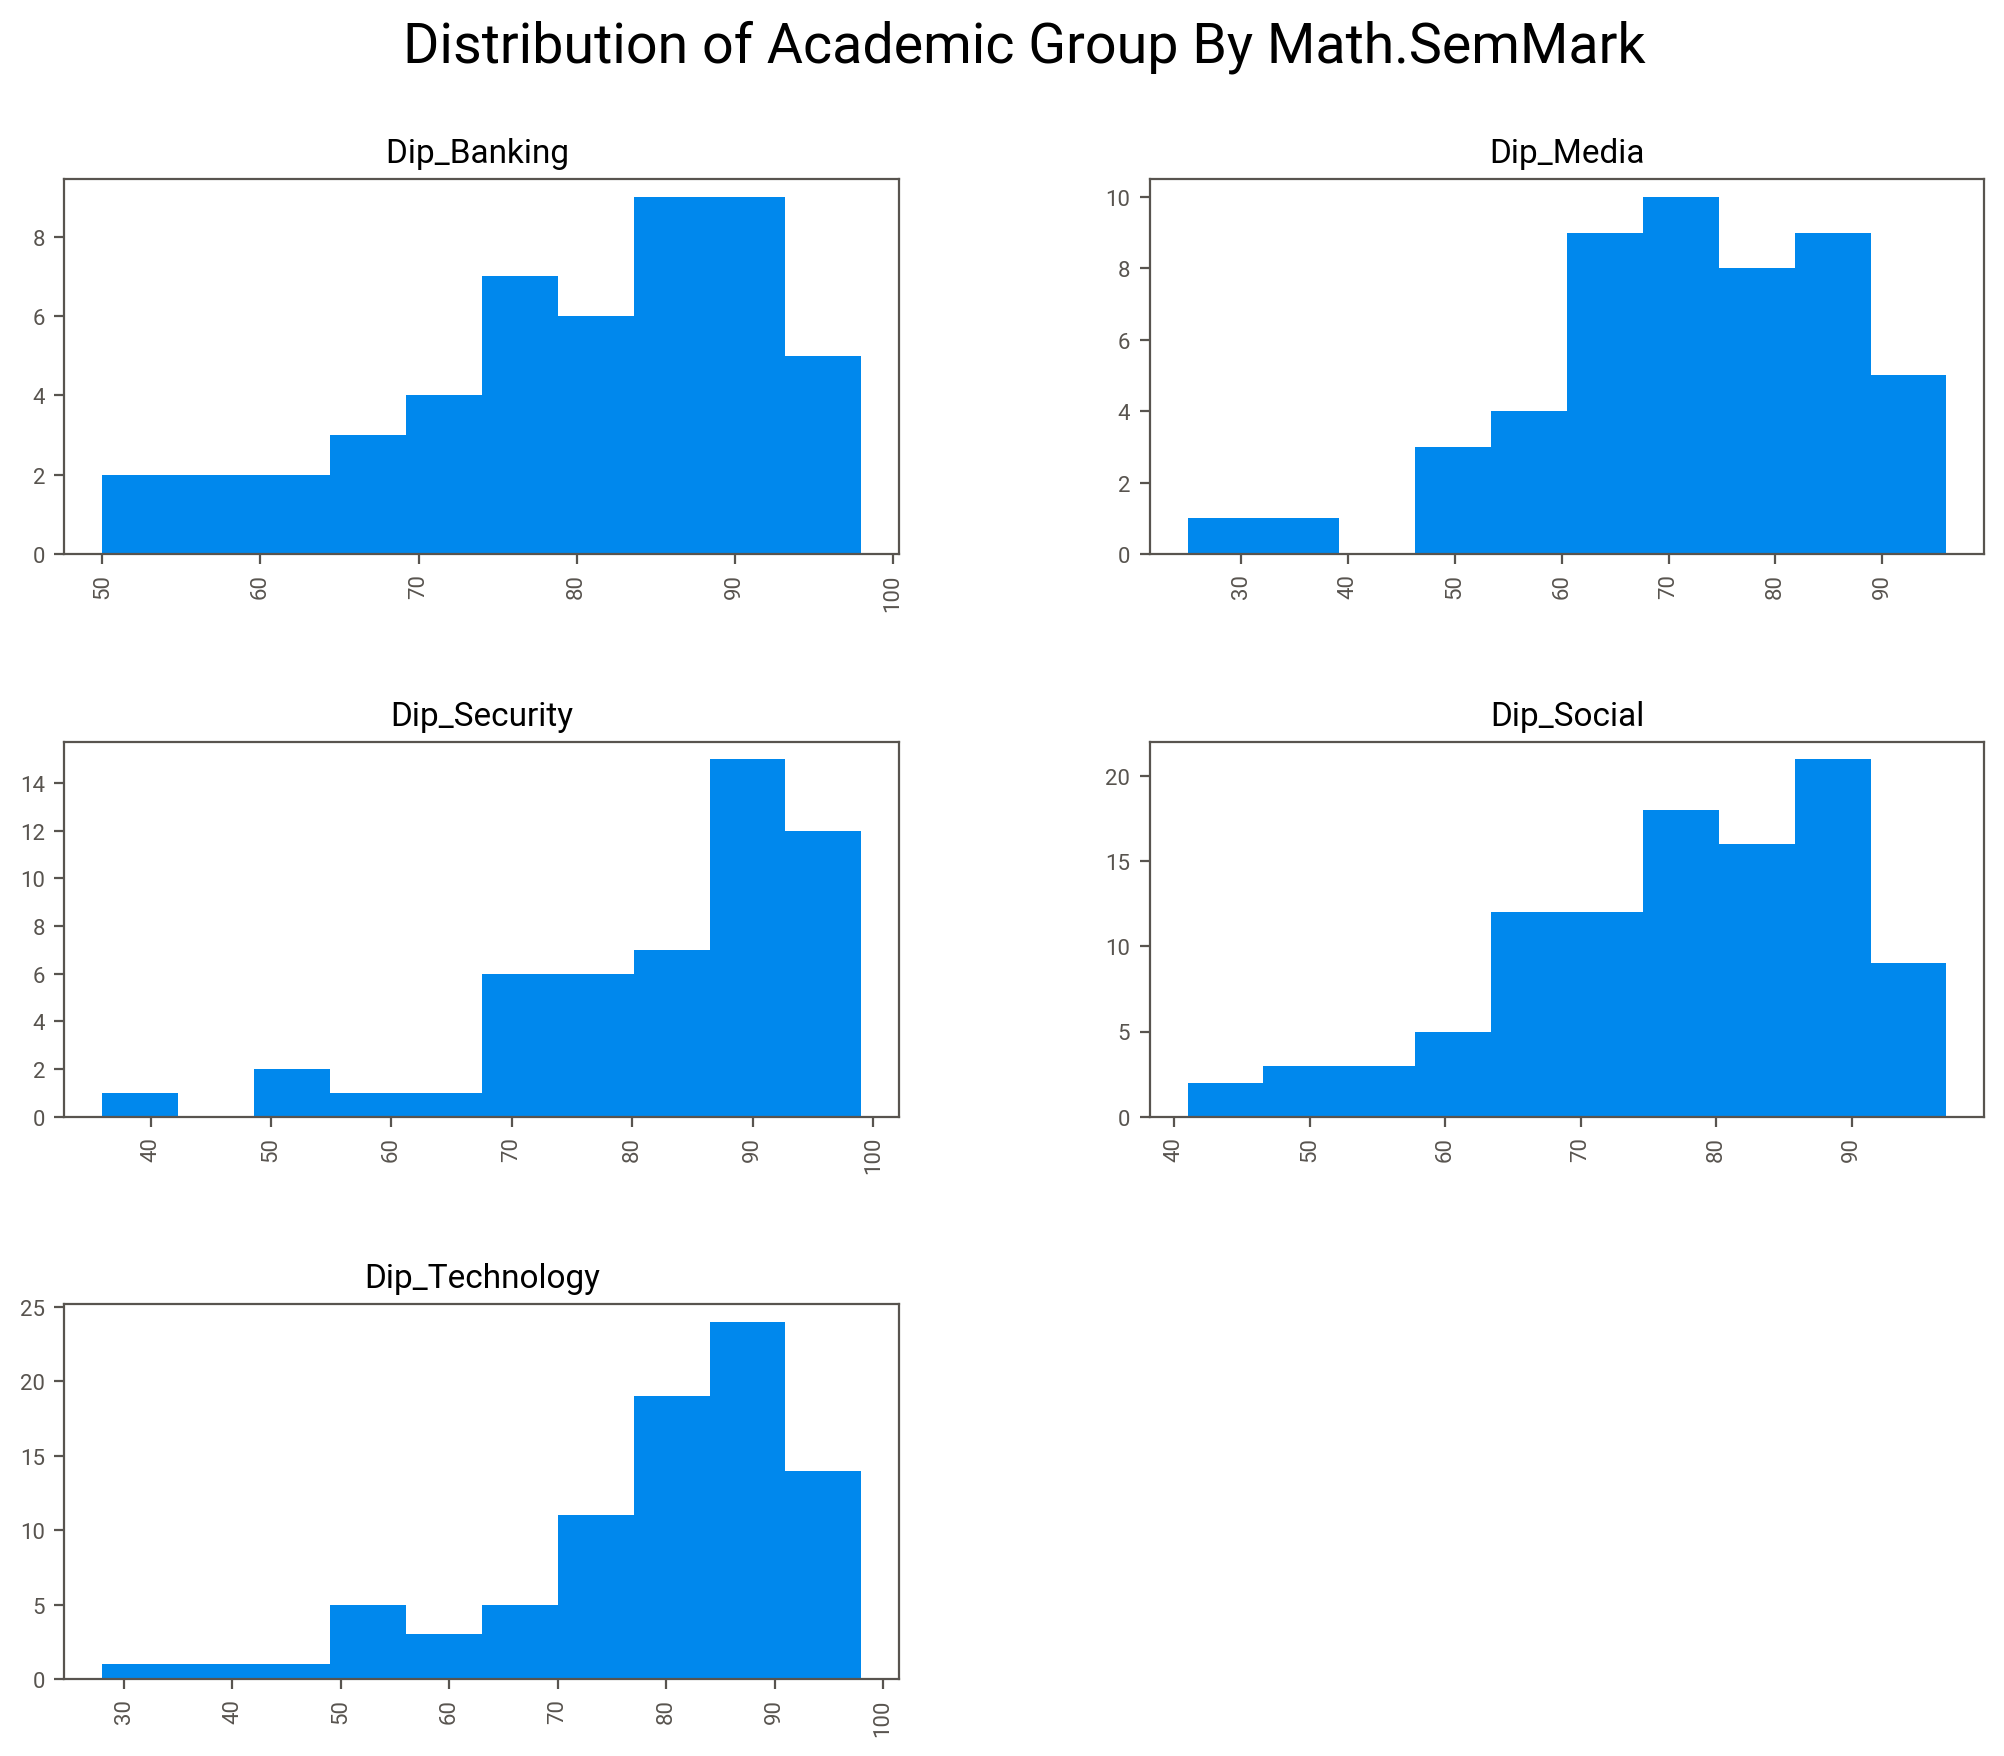

In [ ]:
# Let create histograms to view the Distribution of observations for Math.SemMark variable.

# Plot histograms.

data_academicgroup.hist(by='ACAD_PROG',column='Math.SemMark')

# Set title.

pl.suptitle('Distribution of Academic Group By Math.SemMark', fontsize=20)

# Display the plot.

plt.show()

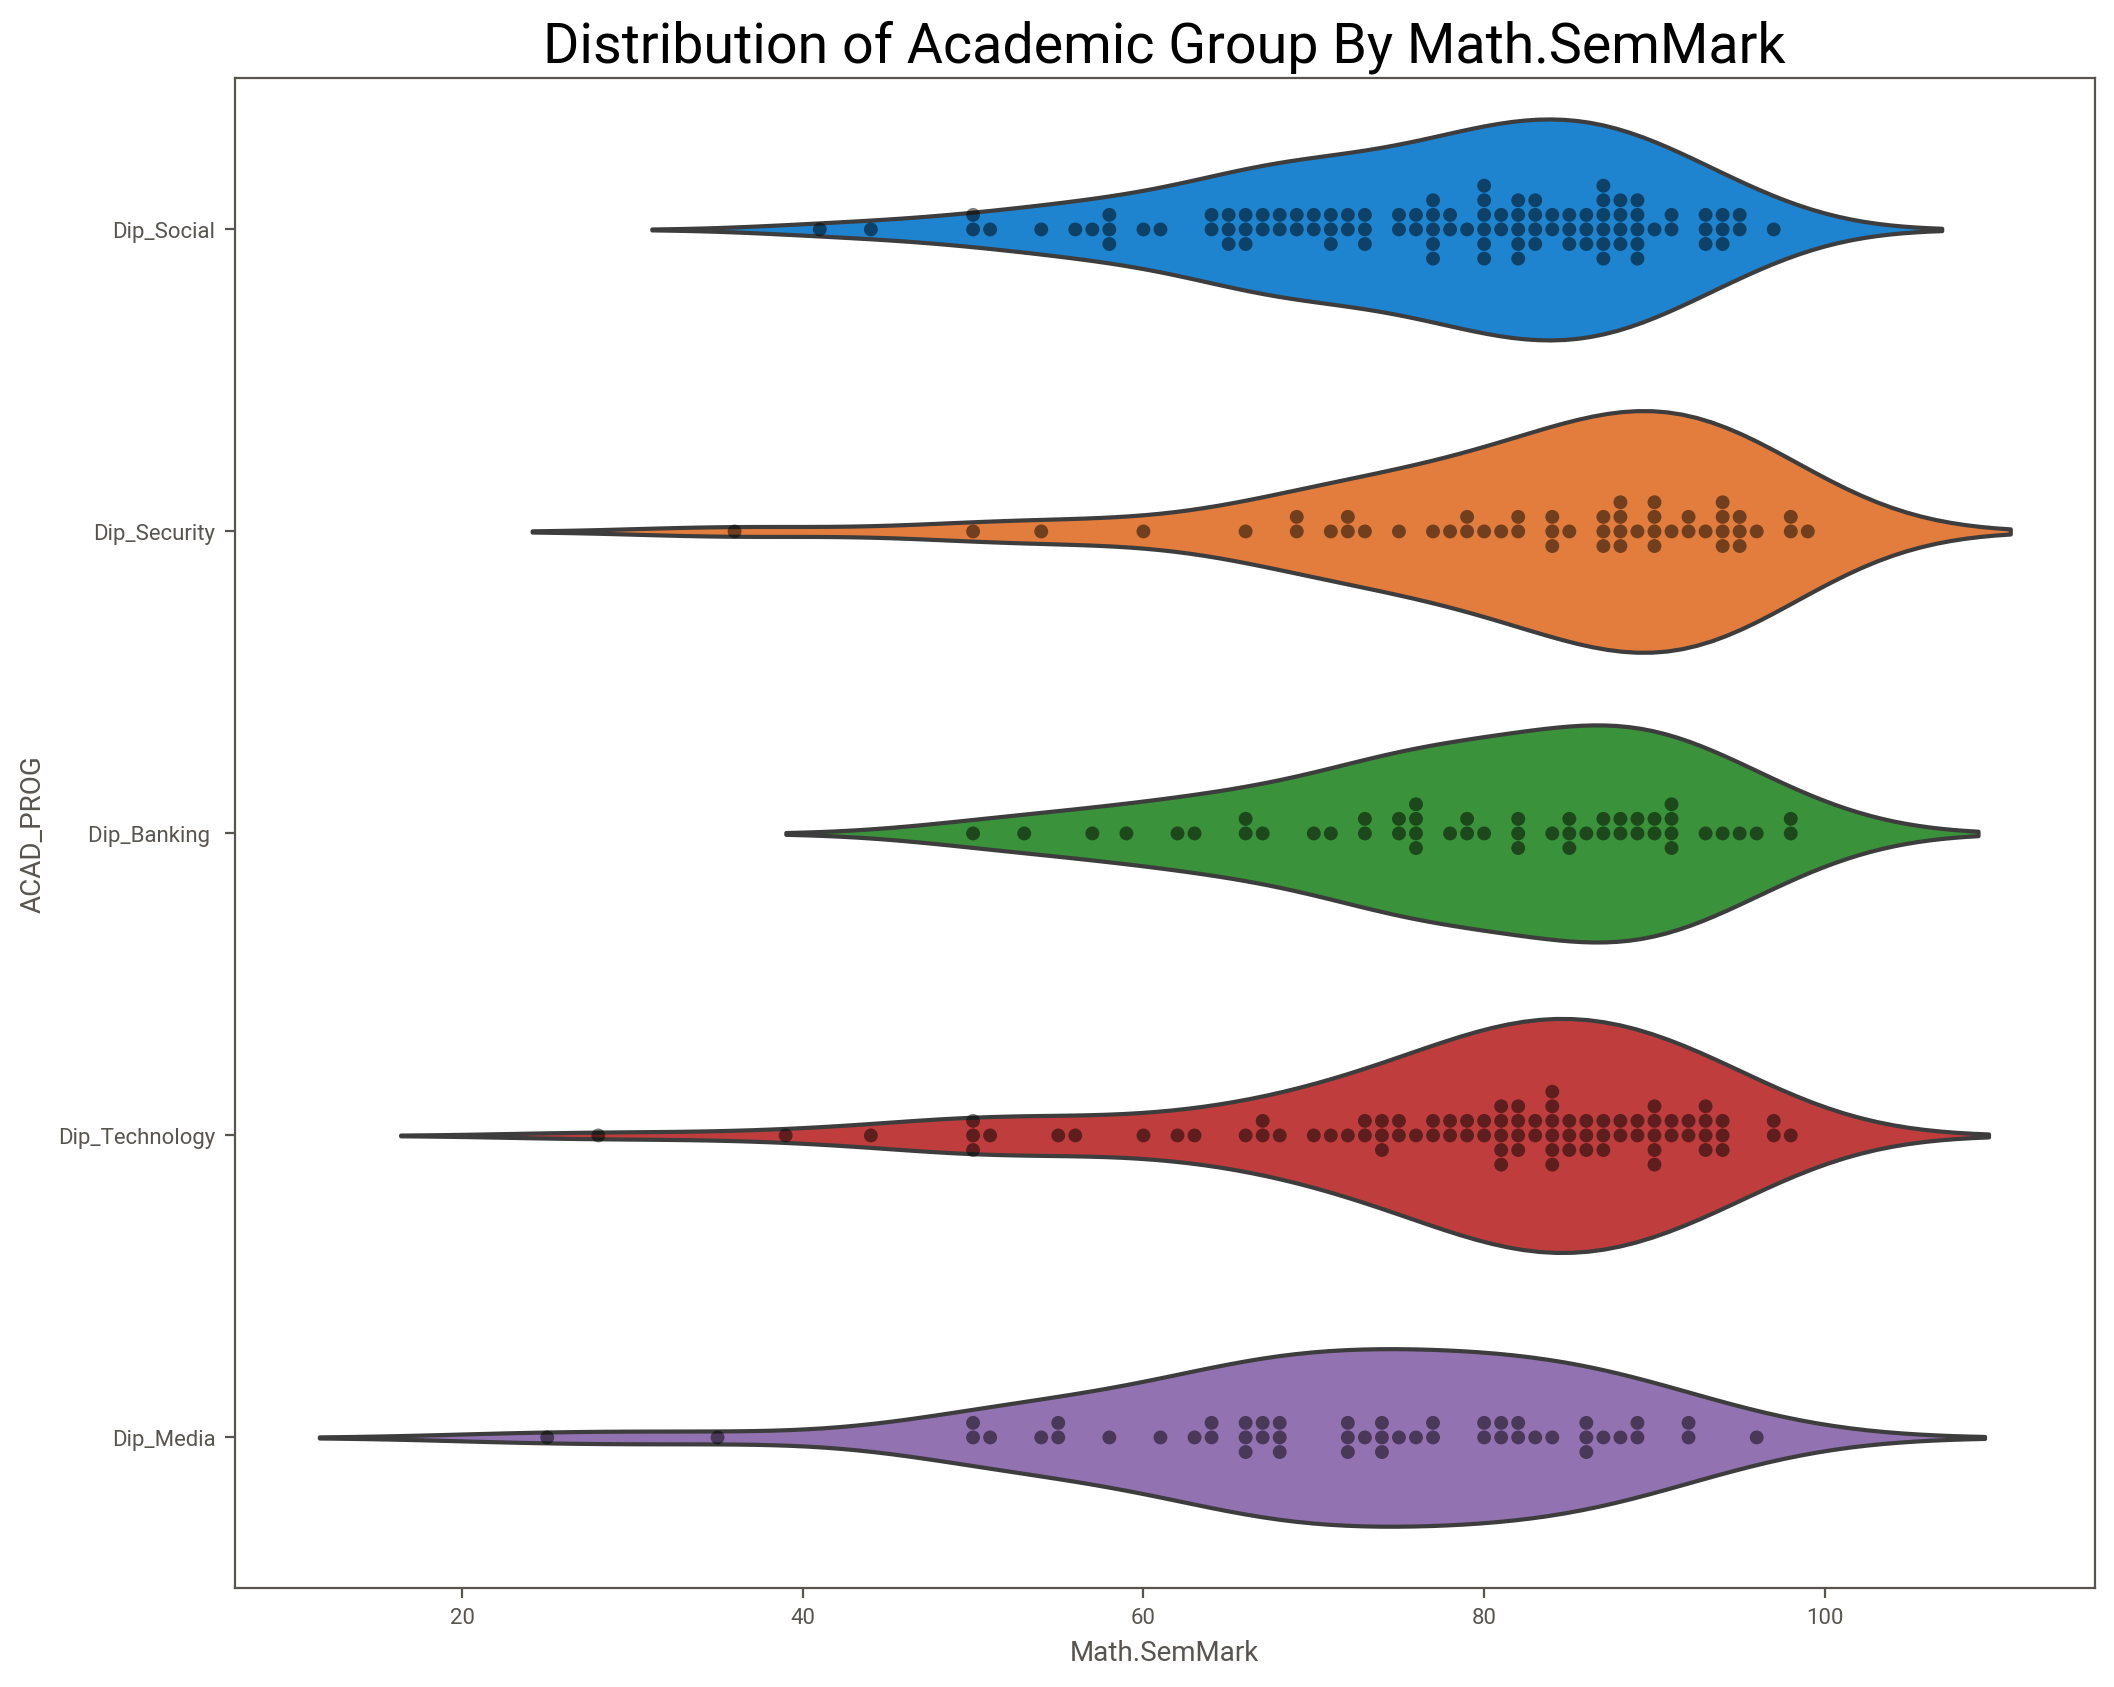

In [ ]:
# Combined swarm & violin plots to view  Distribution of observations for Math.SemMark variable.

# Set figure size.

plt.figure(figsize=(12,10))
 
# Create violin plot with inner boxplots removed.

sns.violinplot(x='Math.SemMark',
               y='ACAD_PROG', 
               data=data_academicgroup, 
               inner=None), # Remove the bars inside the violins

# Overlay swarm plot on violin plot.

sns.swarmplot(x='Math.SemMark', 
              y='ACAD_PROG', 
              data=data_academicgroup, 
              color='k', # Make points black and 
              alpha=0.5) # slightly transparent
 
# Set title.

plt.title('Distribution of Academic Group By Math.SemMark', fontsize=20)

# Display the plot.

plt.show()

Text(0.5, 1.0, 'Distribution of Academic Group By Math.SemMark')

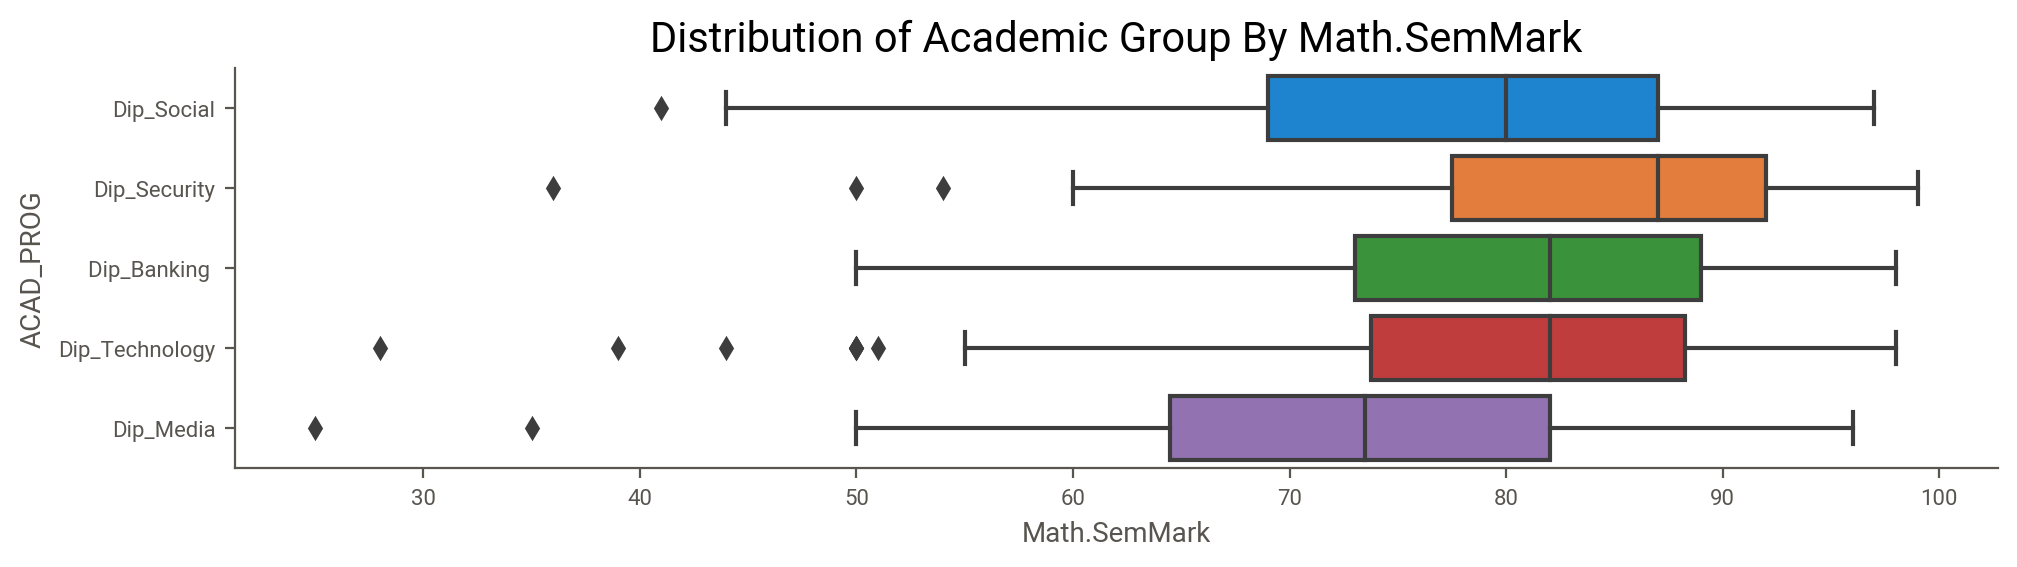

In [ ]:
# Let customised a boxplot using methods on the FacetGrid object that it returns.

g = sns.catplot(x='Math.SemMark', y='ACAD_PROG',
                kind='box', orient='h', height=2.5, aspect=4,
                data=data_academicgroup)

# Display the plot.

plt.title('Distribution of Academic Group By Math.SemMark', fontsize=15)

Text(0.5, 1.0, 'Statistical estimation (Mean) of Academic Group By Math.SemMark')

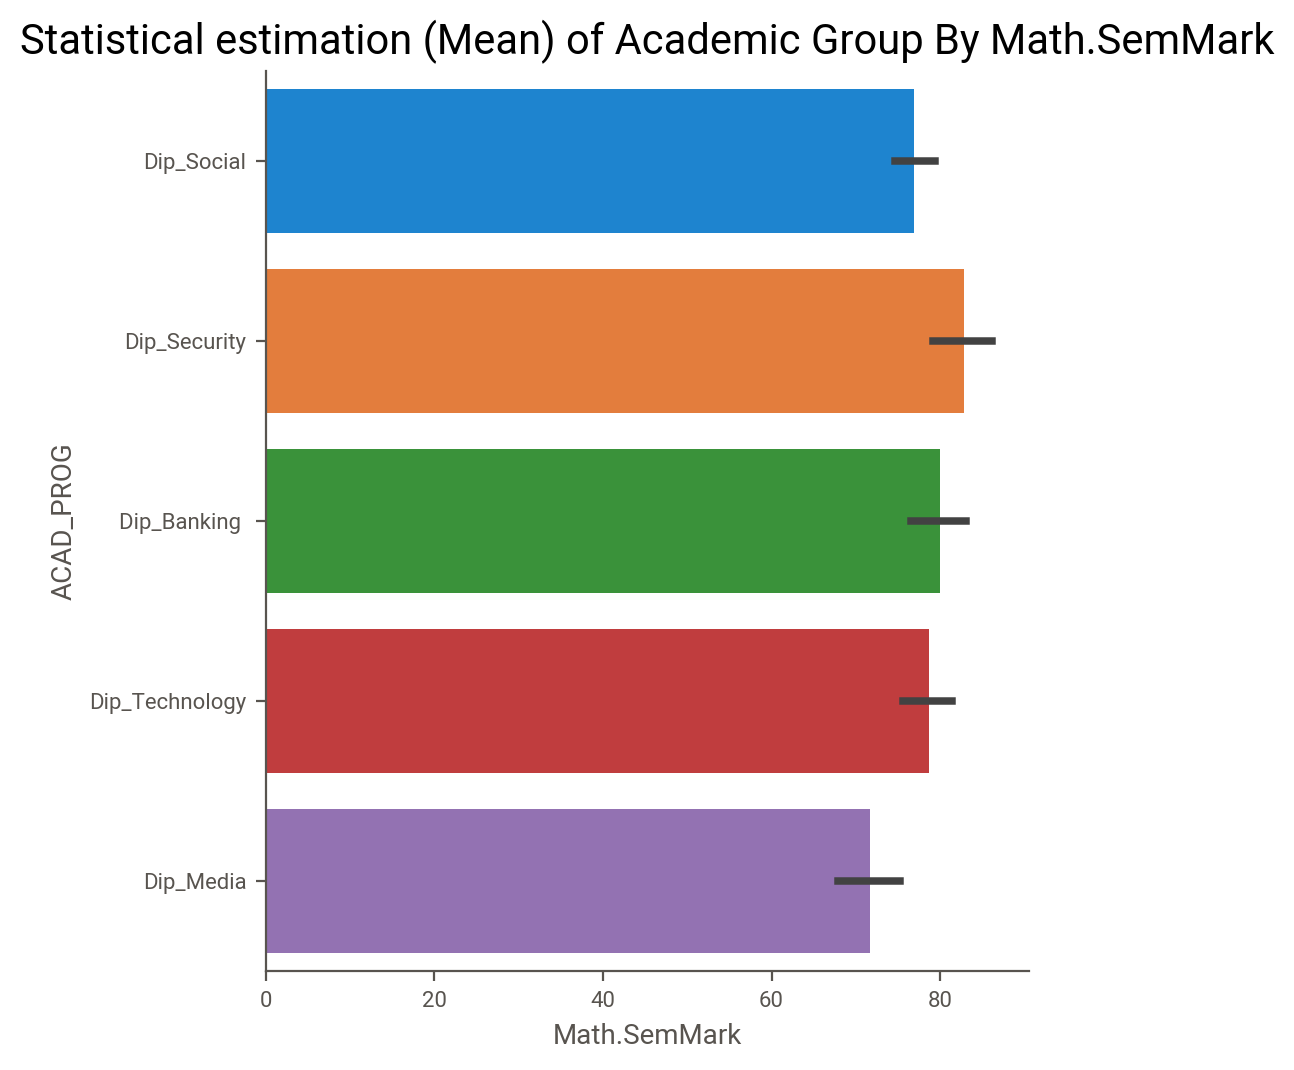

In [ ]:
# A barplot() function operates on a full dataset and applies a function to obtain the estimate
# (taking the mean by default). it also uses bootstrapping to compute a confidence interval 
# around the estimate, which is plotted using error bars.

sns.catplot(x='Math.SemMark', y='ACAD_PROG', kind='bar', data=data_academicgroup)

plt.title('Statistical estimation (Mean) of Academic Group By Math.SemMark', fontsize=15)

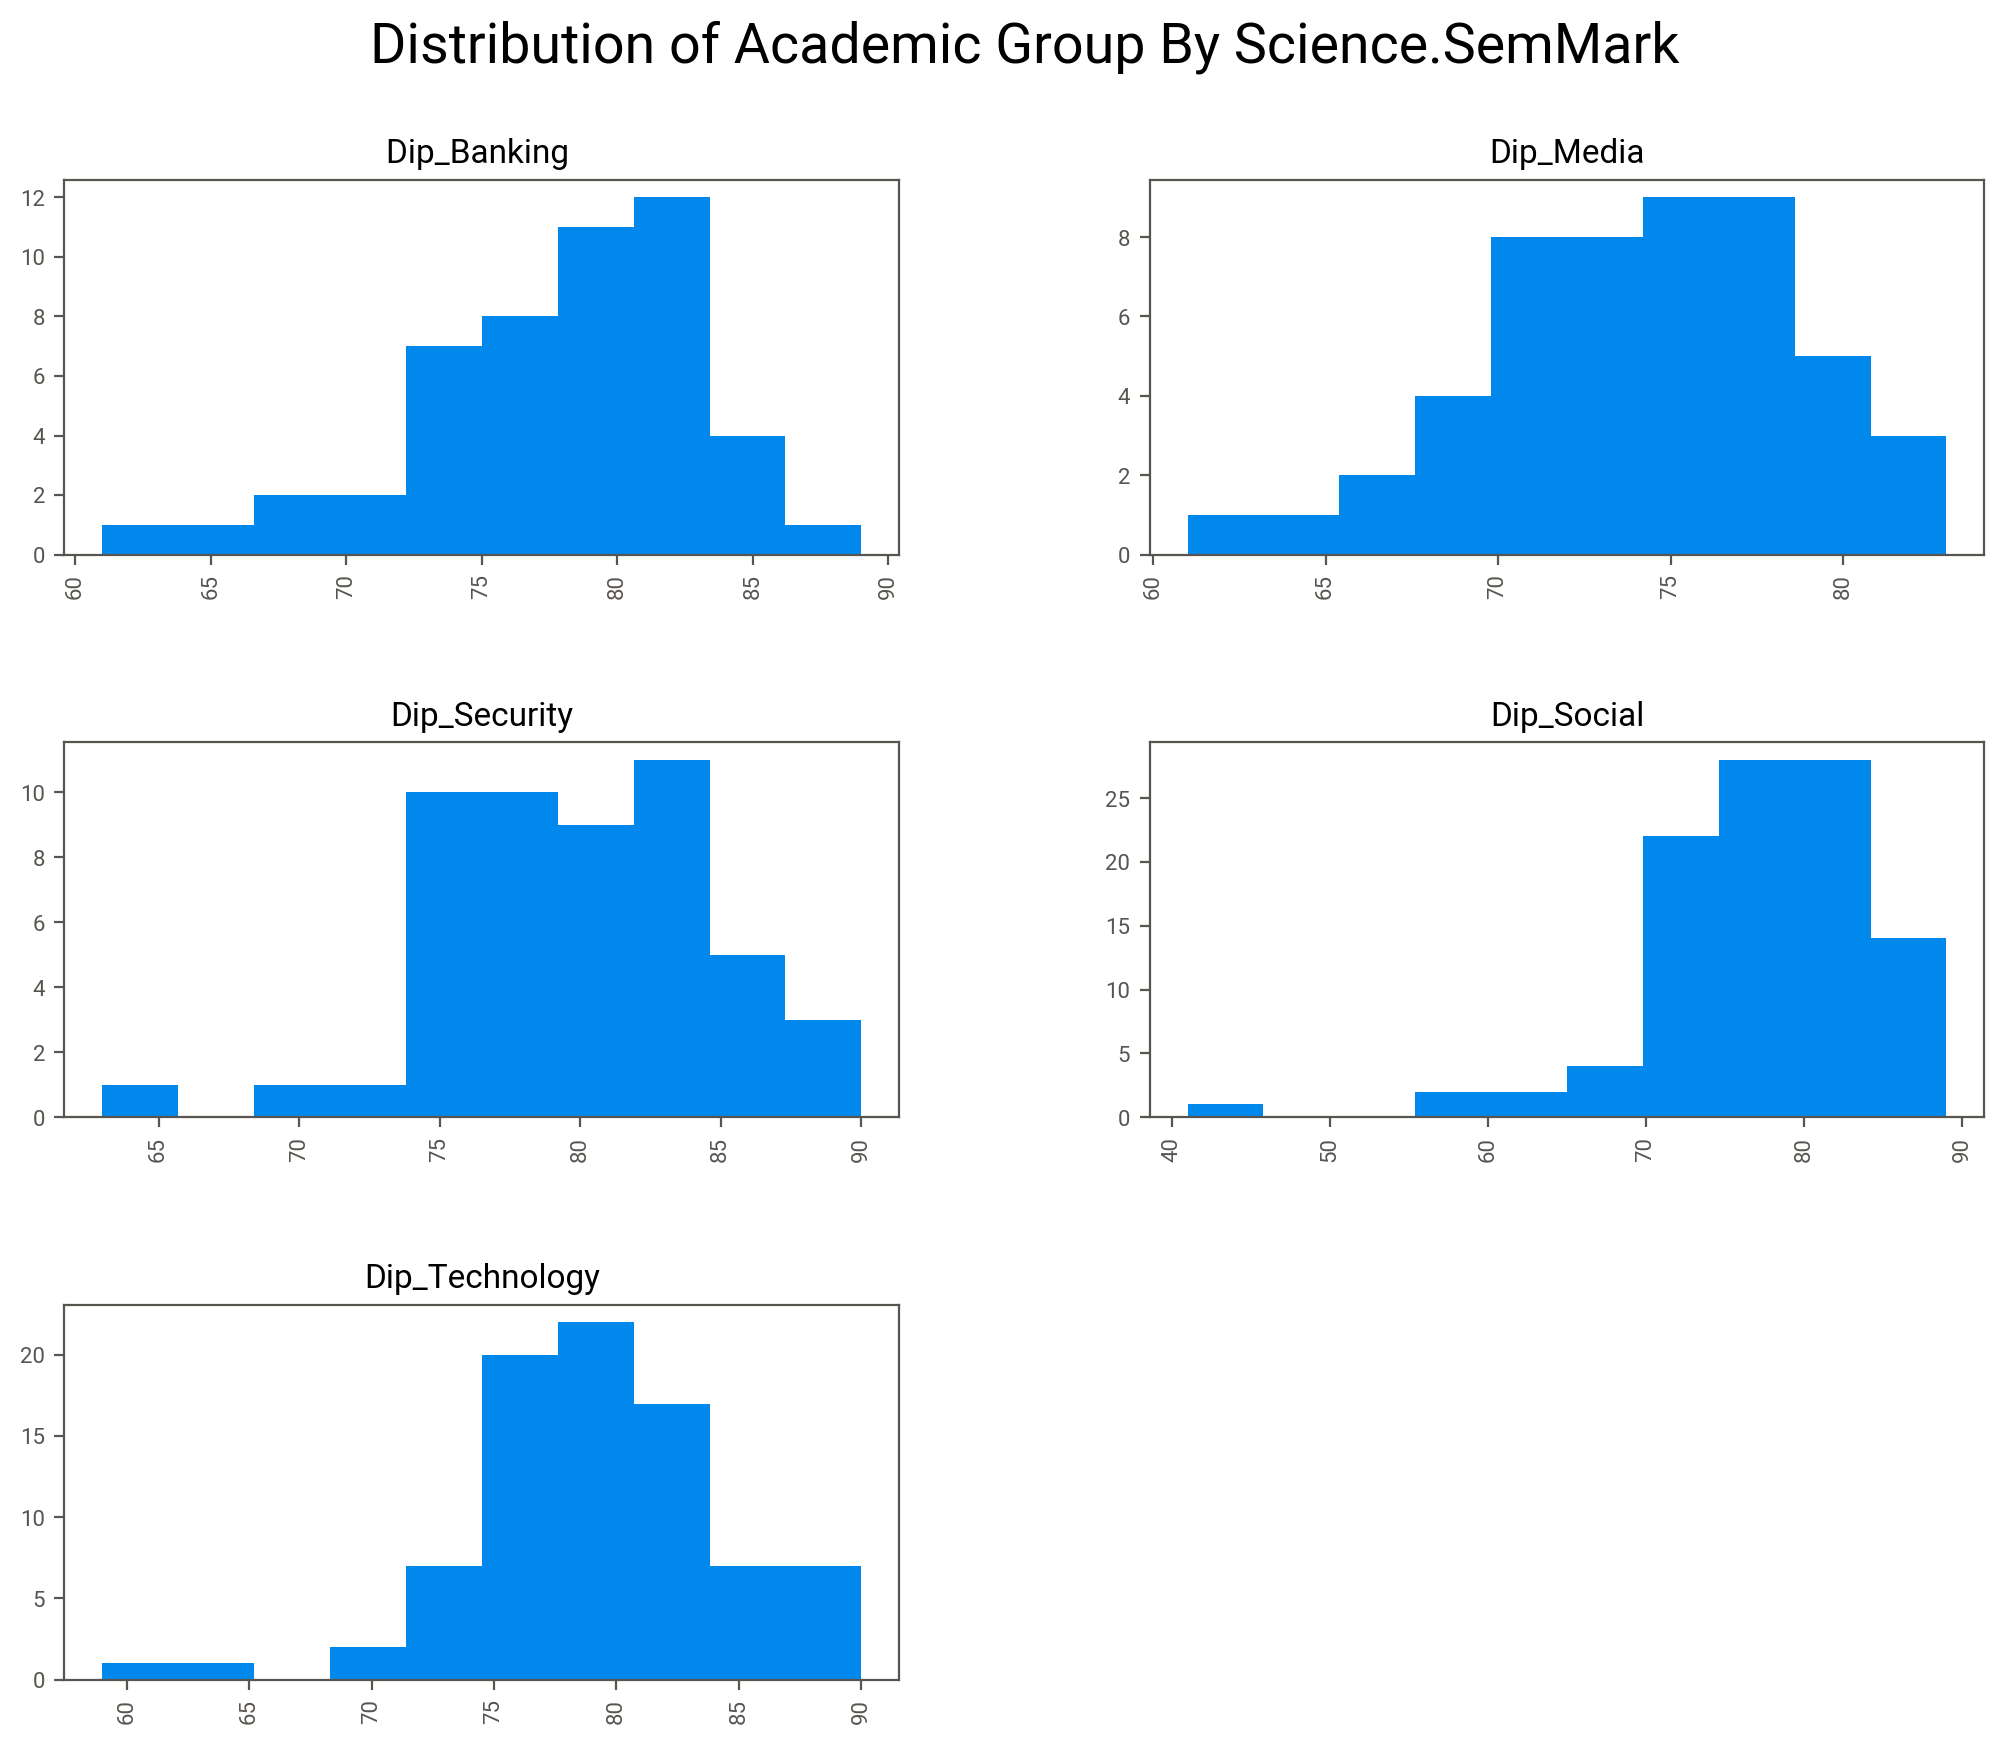

In [ ]:
# Let create histograms to view the Distribution of observations for Science.SemMark variable.

# Plot histograms.

data_academicgroup.hist(by='ACAD_PROG',column='Science.SemMark')

# Set title.

pl.suptitle('Distribution of Academic Group By Science.SemMark', fontsize=20)

# Display the plot.

plt.show()

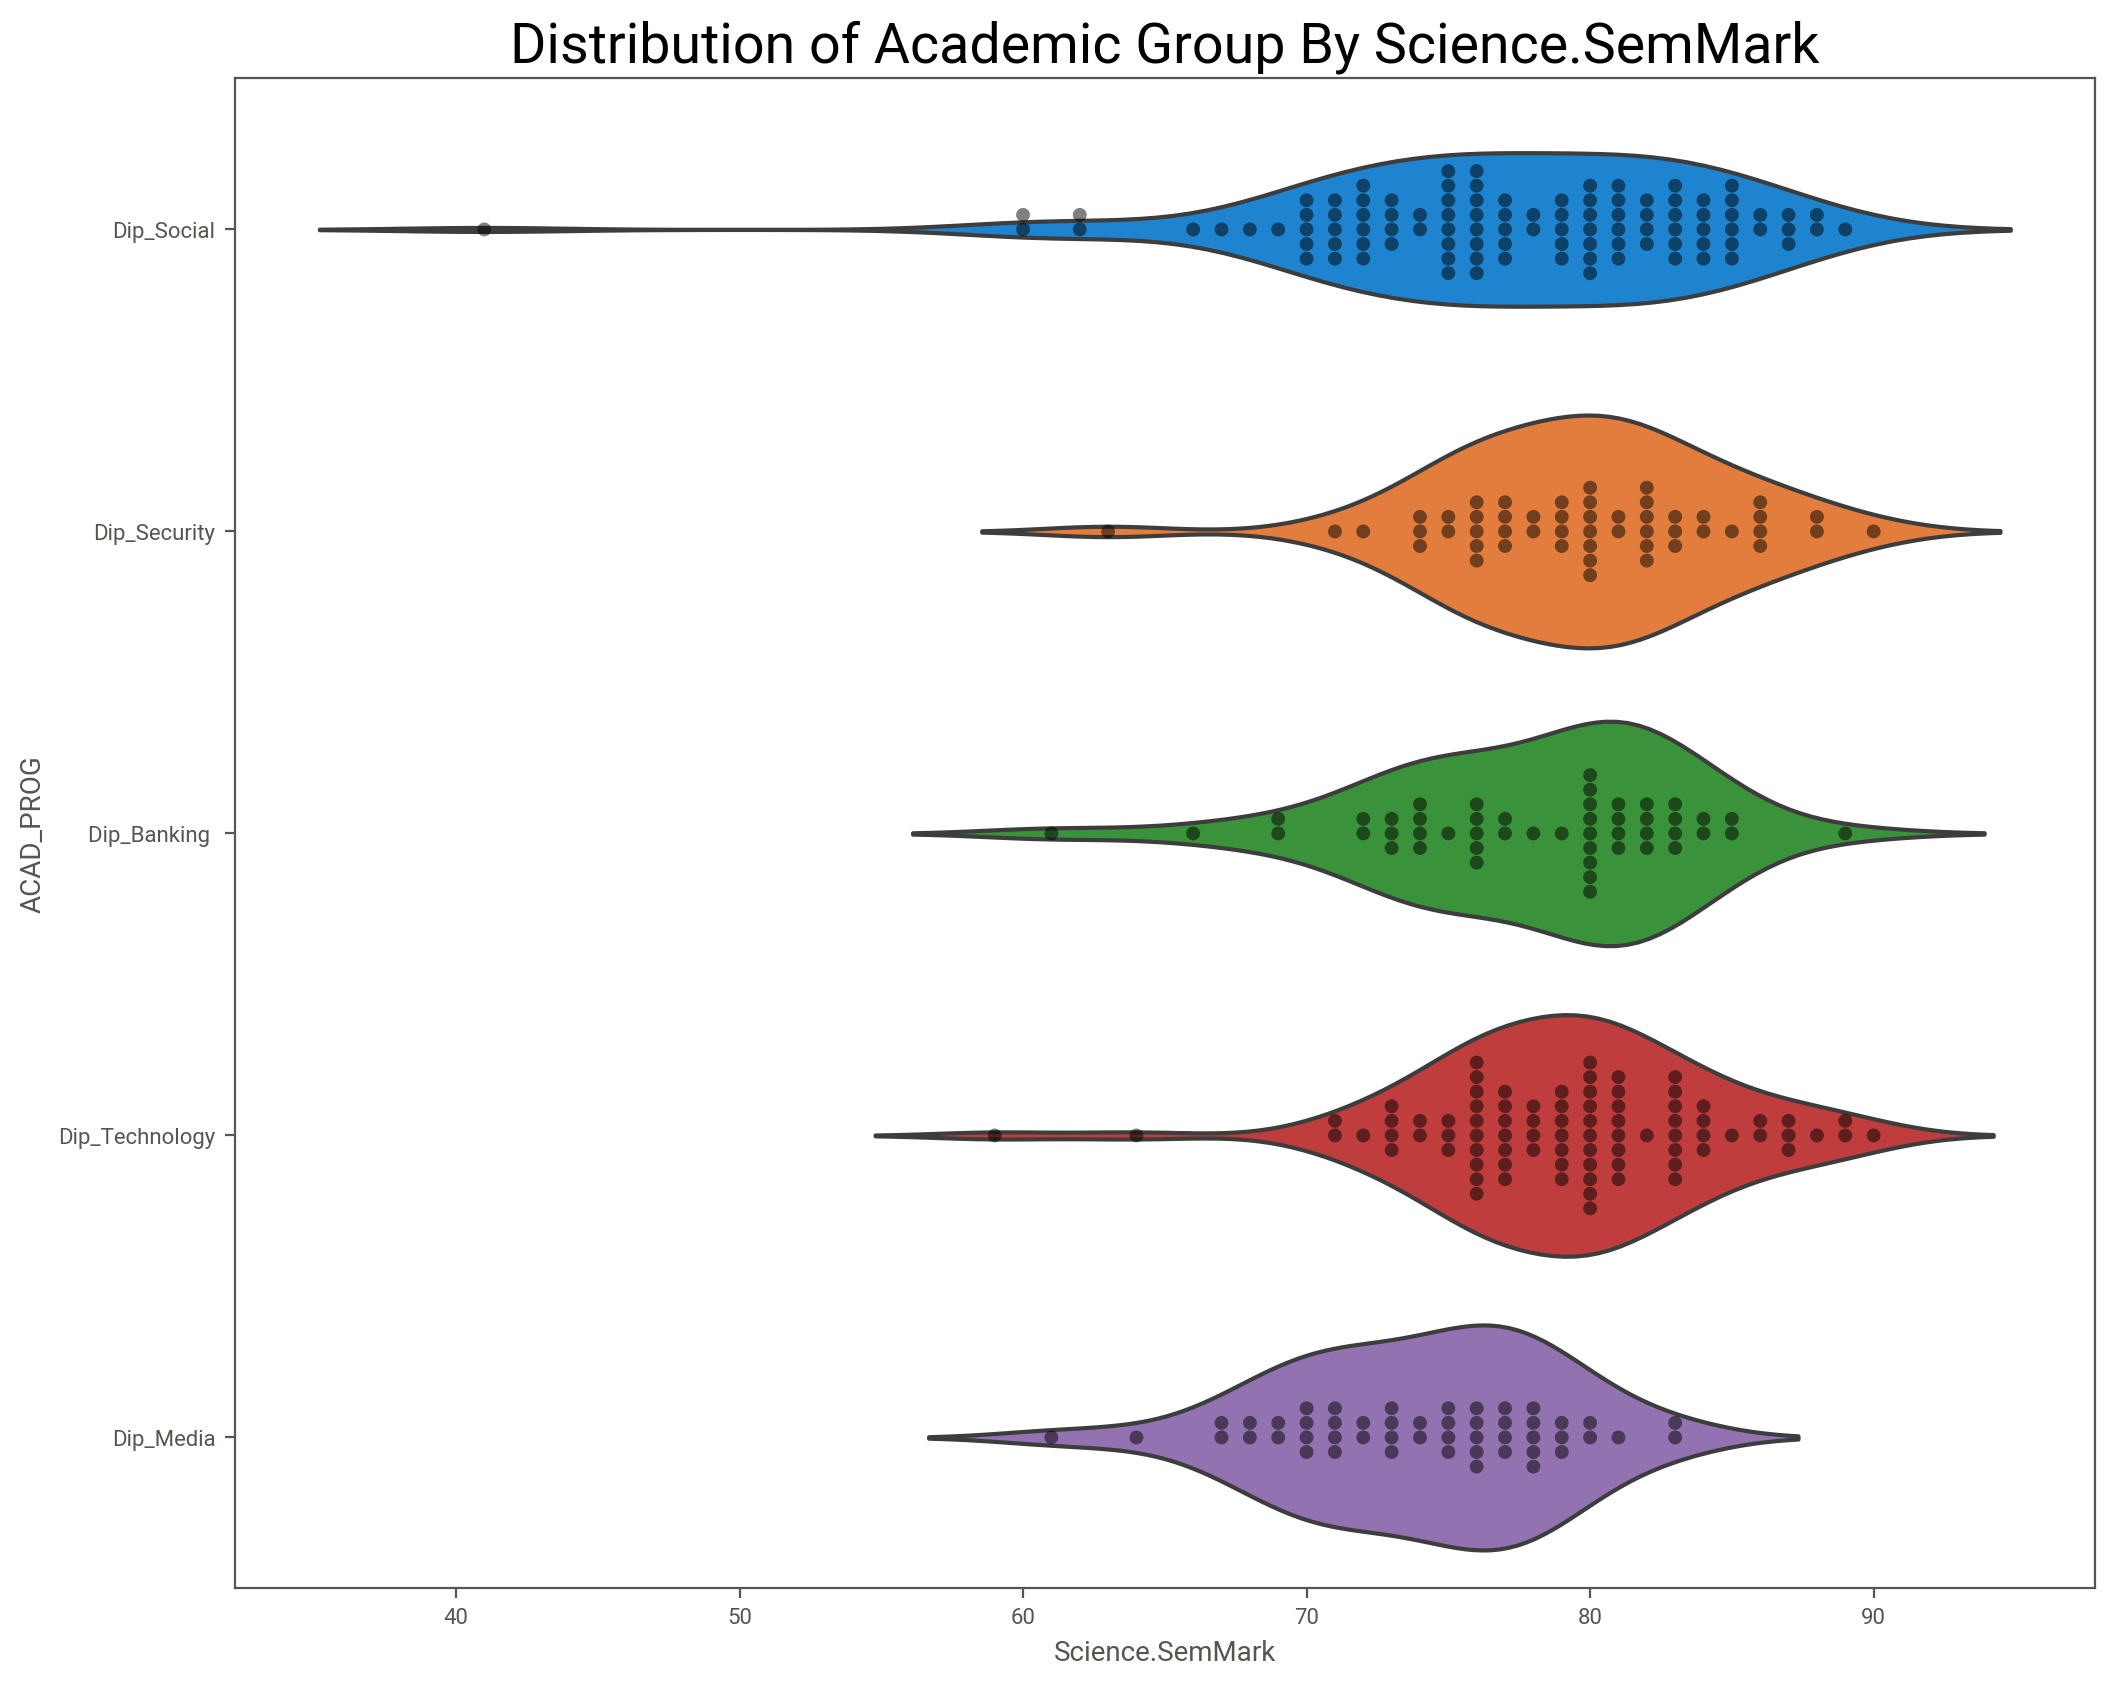

In [ ]:
# Combined swarm & violin plots to view  Distribution of observations for Science.SemMark variable.

# Set figure size.

plt.figure(figsize=(12,10))
 
# Create violin plot with inner boxplots removed.

sns.violinplot(x='Science.SemMark',
               y='ACAD_PROG', 
               data=data_academicgroup, 
               inner=None), # Remove the bars inside the violins

# Overlay swarm plot on violin plot.

sns.swarmplot(x='Science.SemMark', 
              y='ACAD_PROG', 
              data=data_academicgroup, 
              color='k', # Make points black and 
              alpha=0.5) # slightly transparent
 
# Set title.

plt.title('Distribution of Academic Group By Science.SemMark', fontsize=20)


# Display the plot.

plt.show()

Text(0.5, 1.0, 'Distribution of Academic Group By Science.SemMark')

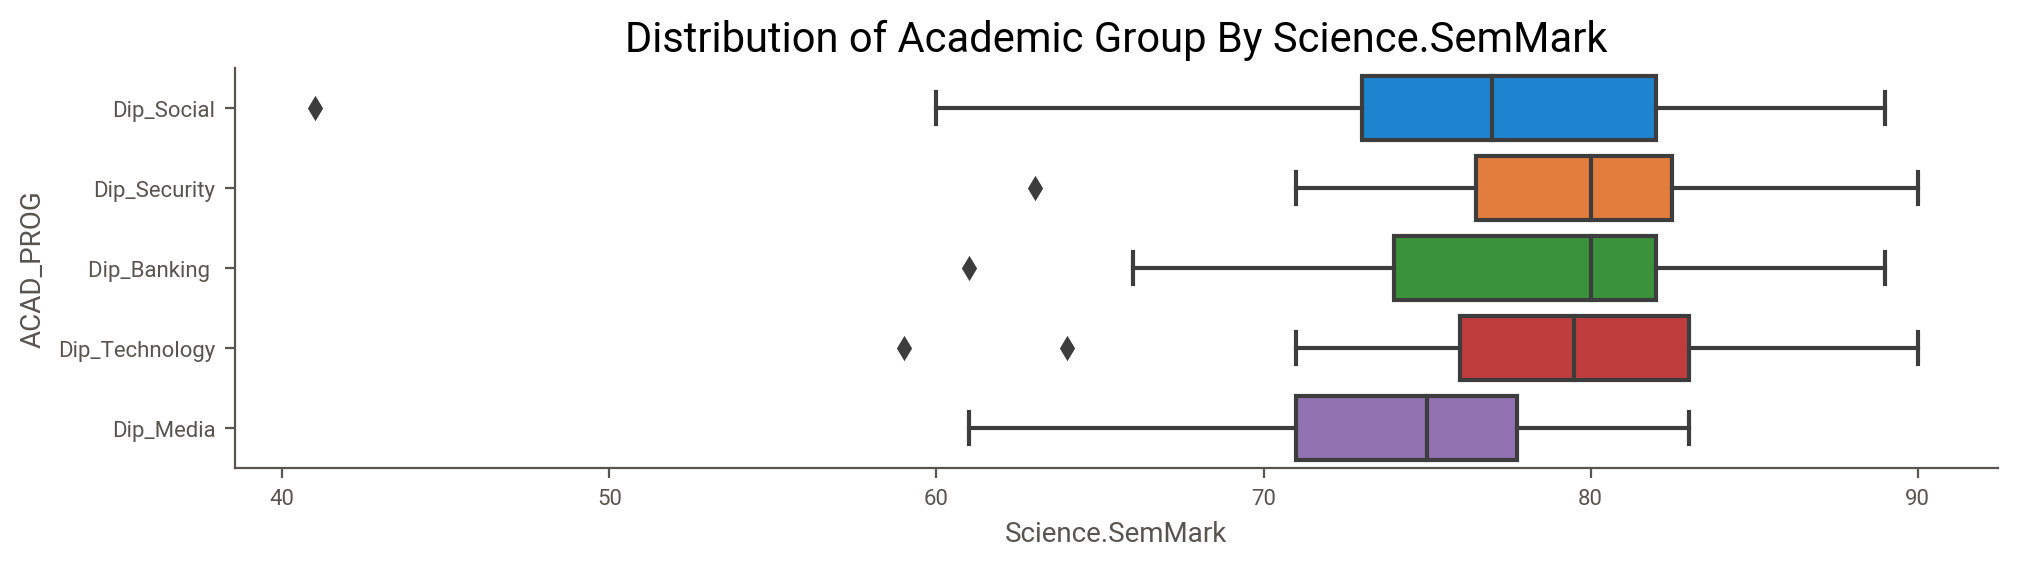

In [ ]:
# Let customised a boxplot using methods on the FacetGrid object that it returns.

g = sns.catplot(x='Science.SemMark', y='ACAD_PROG',
                kind='box', orient='h', height=2.5, aspect=4,
                data=data_academicgroup)

# Display the plot.

plt.title('Distribution of Academic Group By Science.SemMark', fontsize=15)

Text(0.5, 1.0, 'Statistical estimation (Mean) of Academic Group By Science.SemMark')

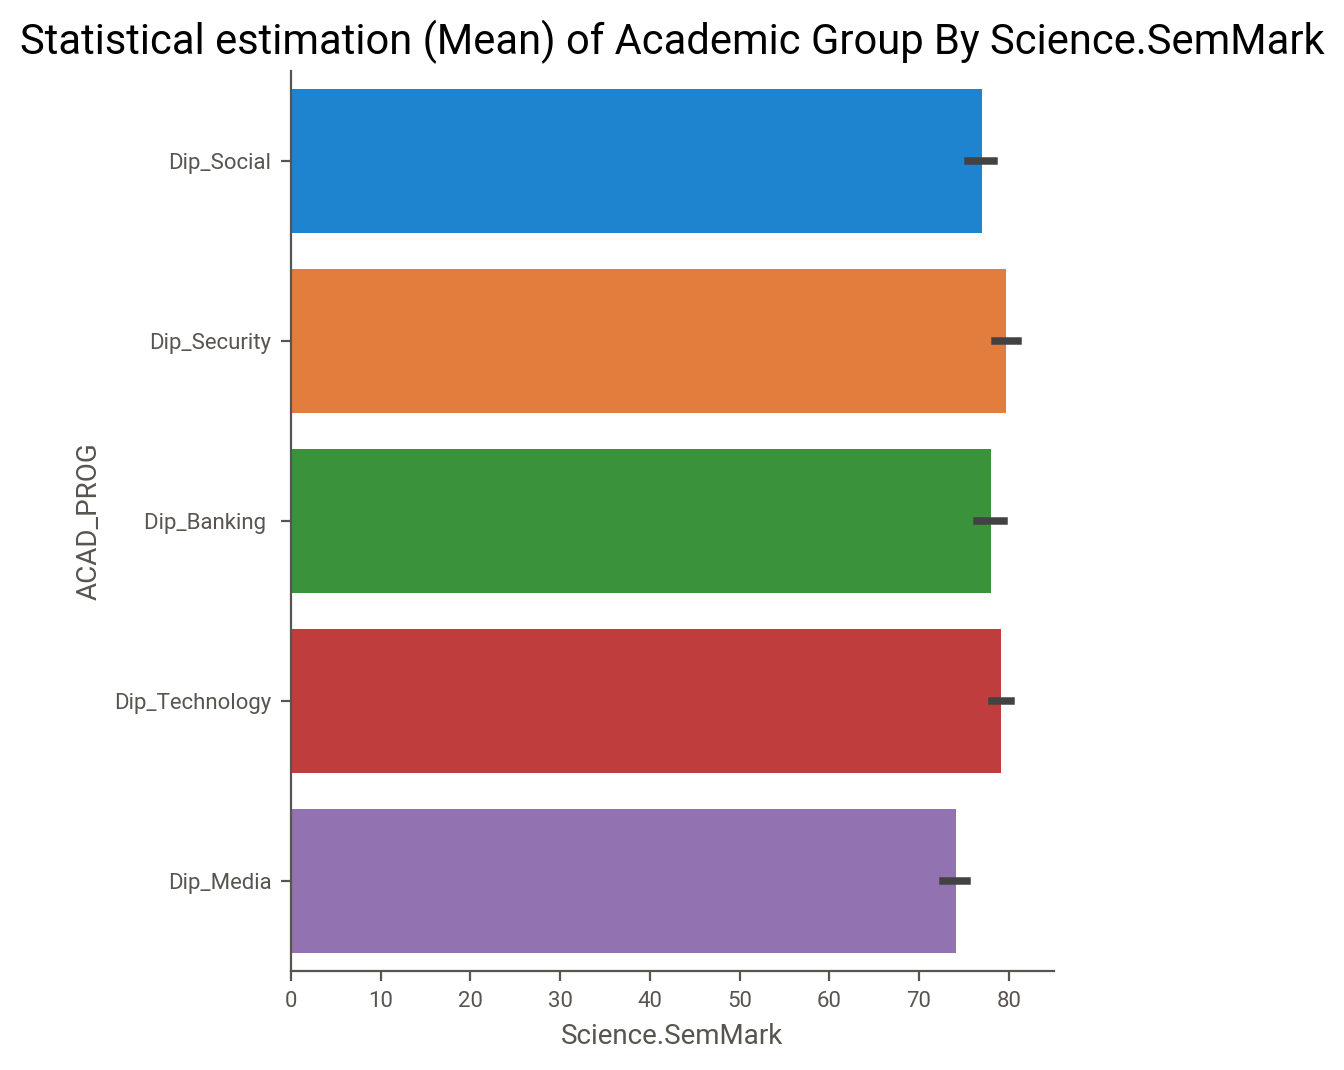

In [ ]:
# A barplot() function operates on a full dataset and applies a function to obtain the estimate
# (taking the mean by default). it also uses bootstrapping to compute a confidence interval 
# around the estimate, which is plotted using error bars.

sns.catplot(x='Science.SemMark', y='ACAD_PROG', kind='bar', data=data_academicgroup)

plt.title('Statistical estimation (Mean) of Academic Group By Science.SemMark', fontsize=15)

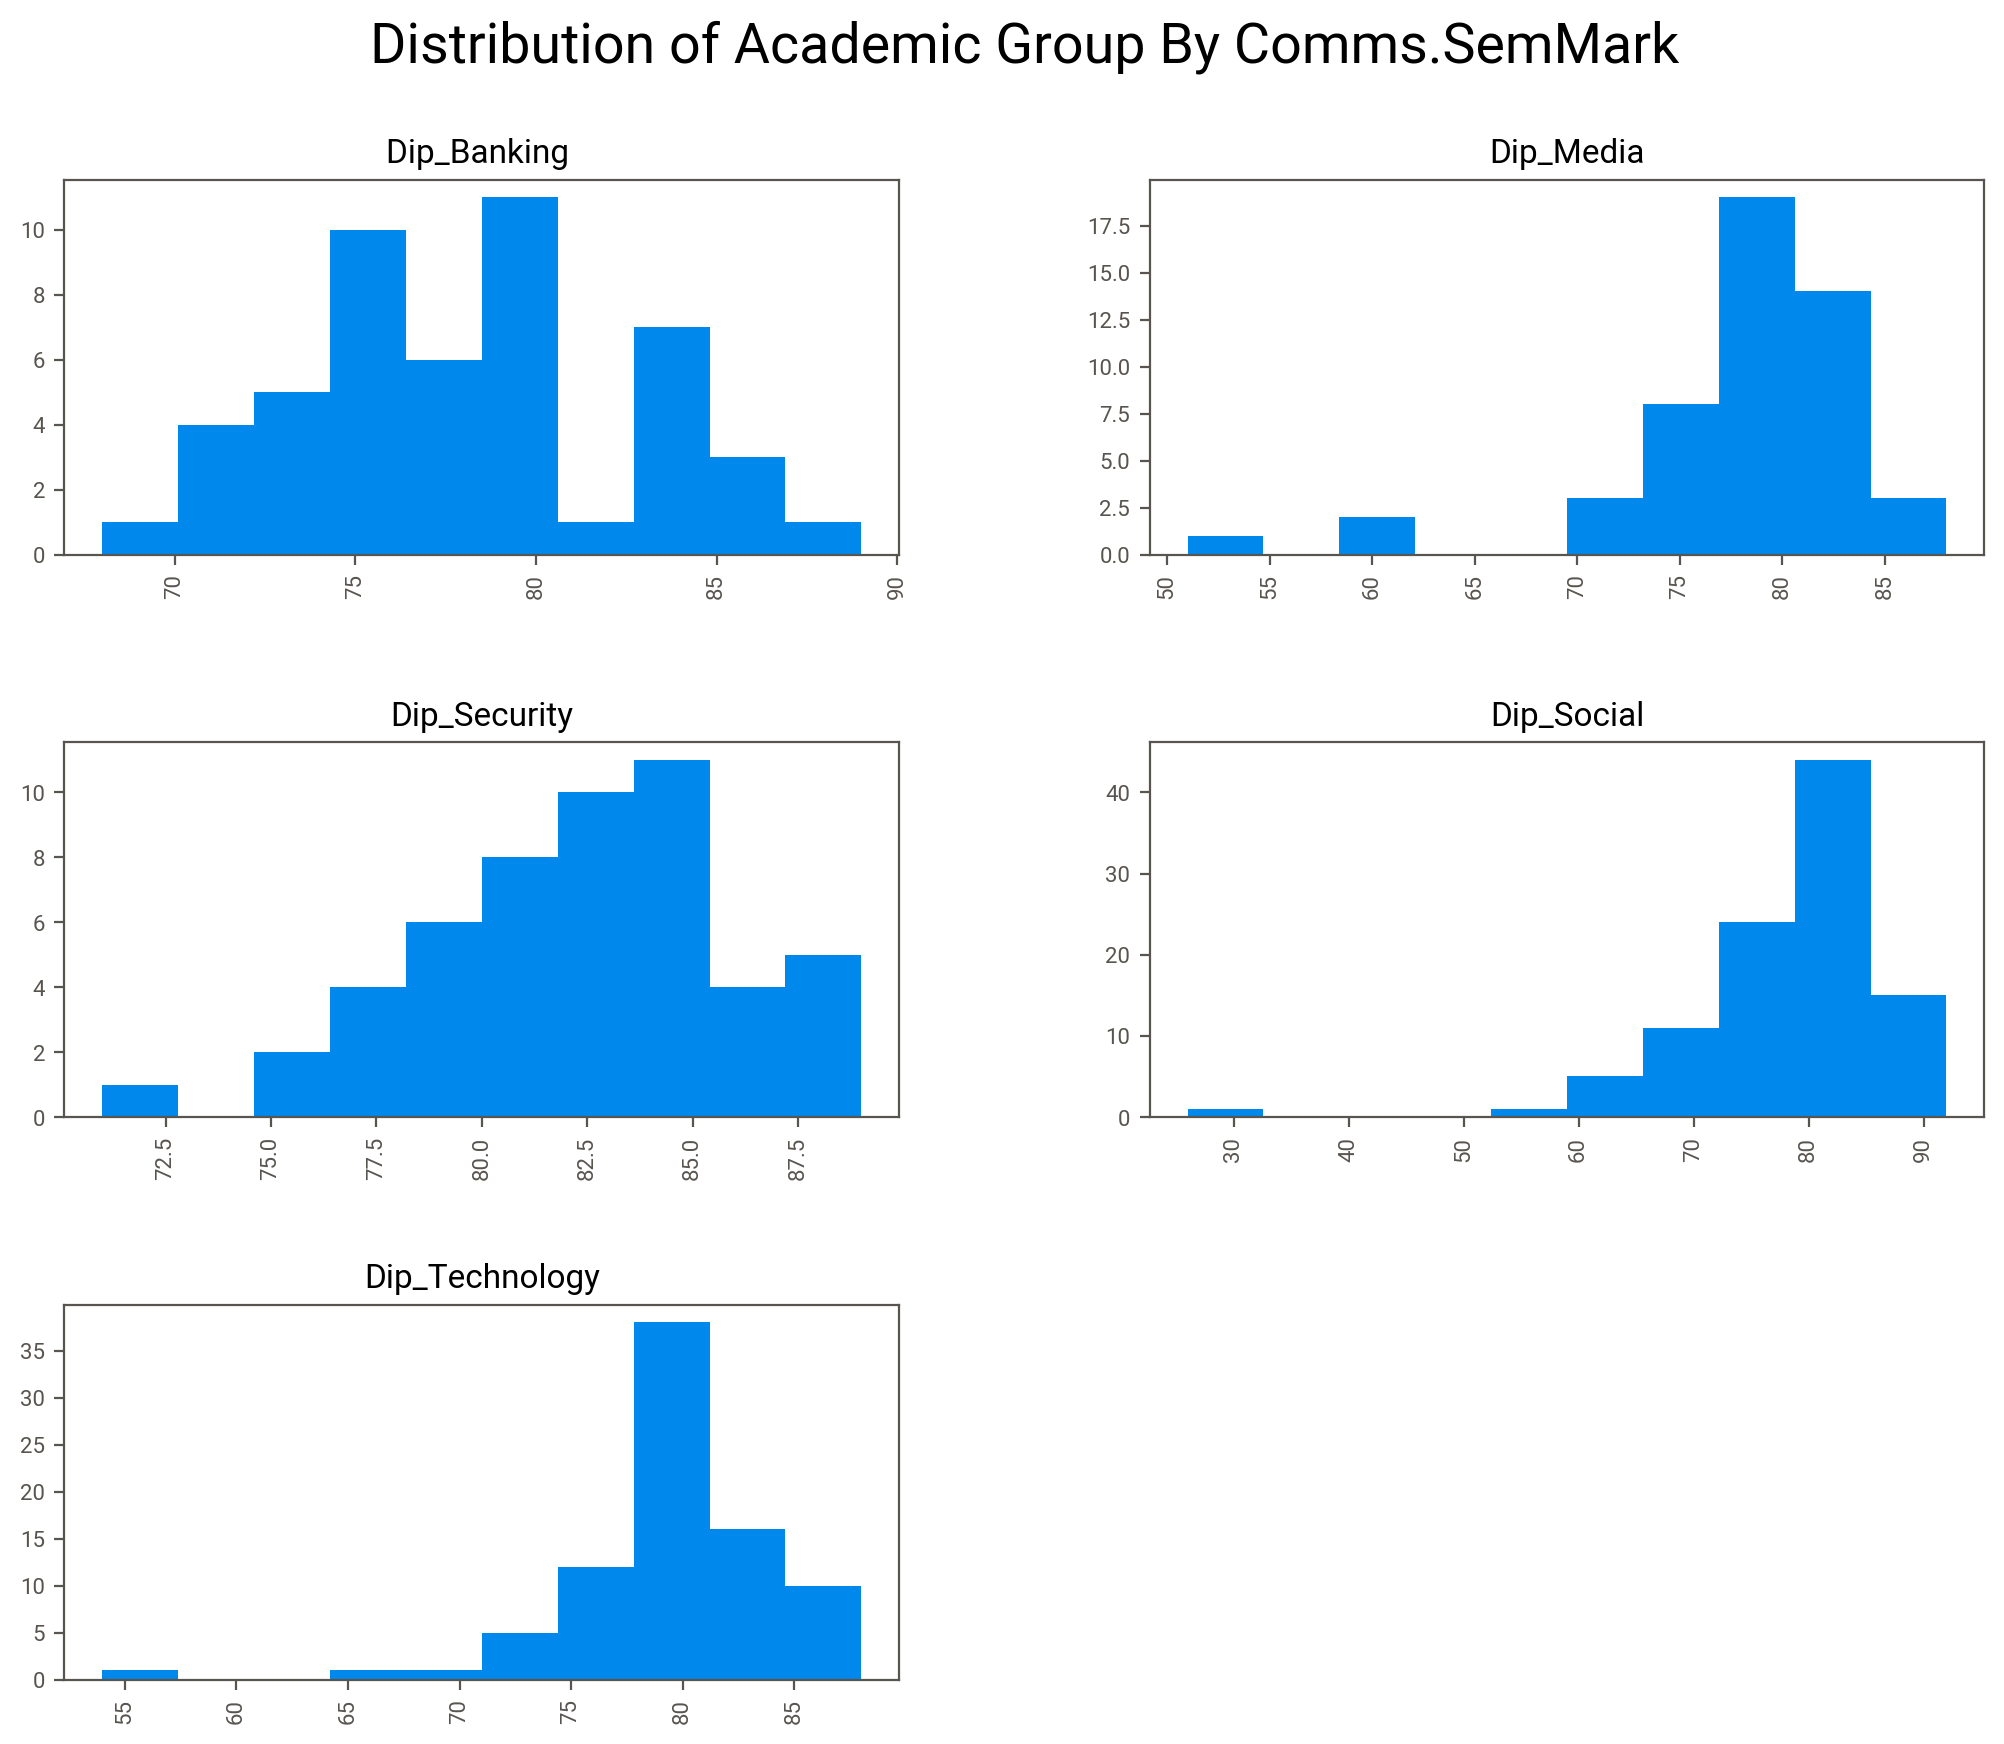

In [ ]:
# Let create histograms to view the Distribution of observations for Comms.SemMark variable.

# Plot histograms.

data_academicgroup.hist(by='ACAD_PROG',column='Comms.SemMark')

# Set title.

pl.suptitle('Distribution of Academic Group By Comms.SemMark', fontsize=20)

# Display the plot.

plt.show()

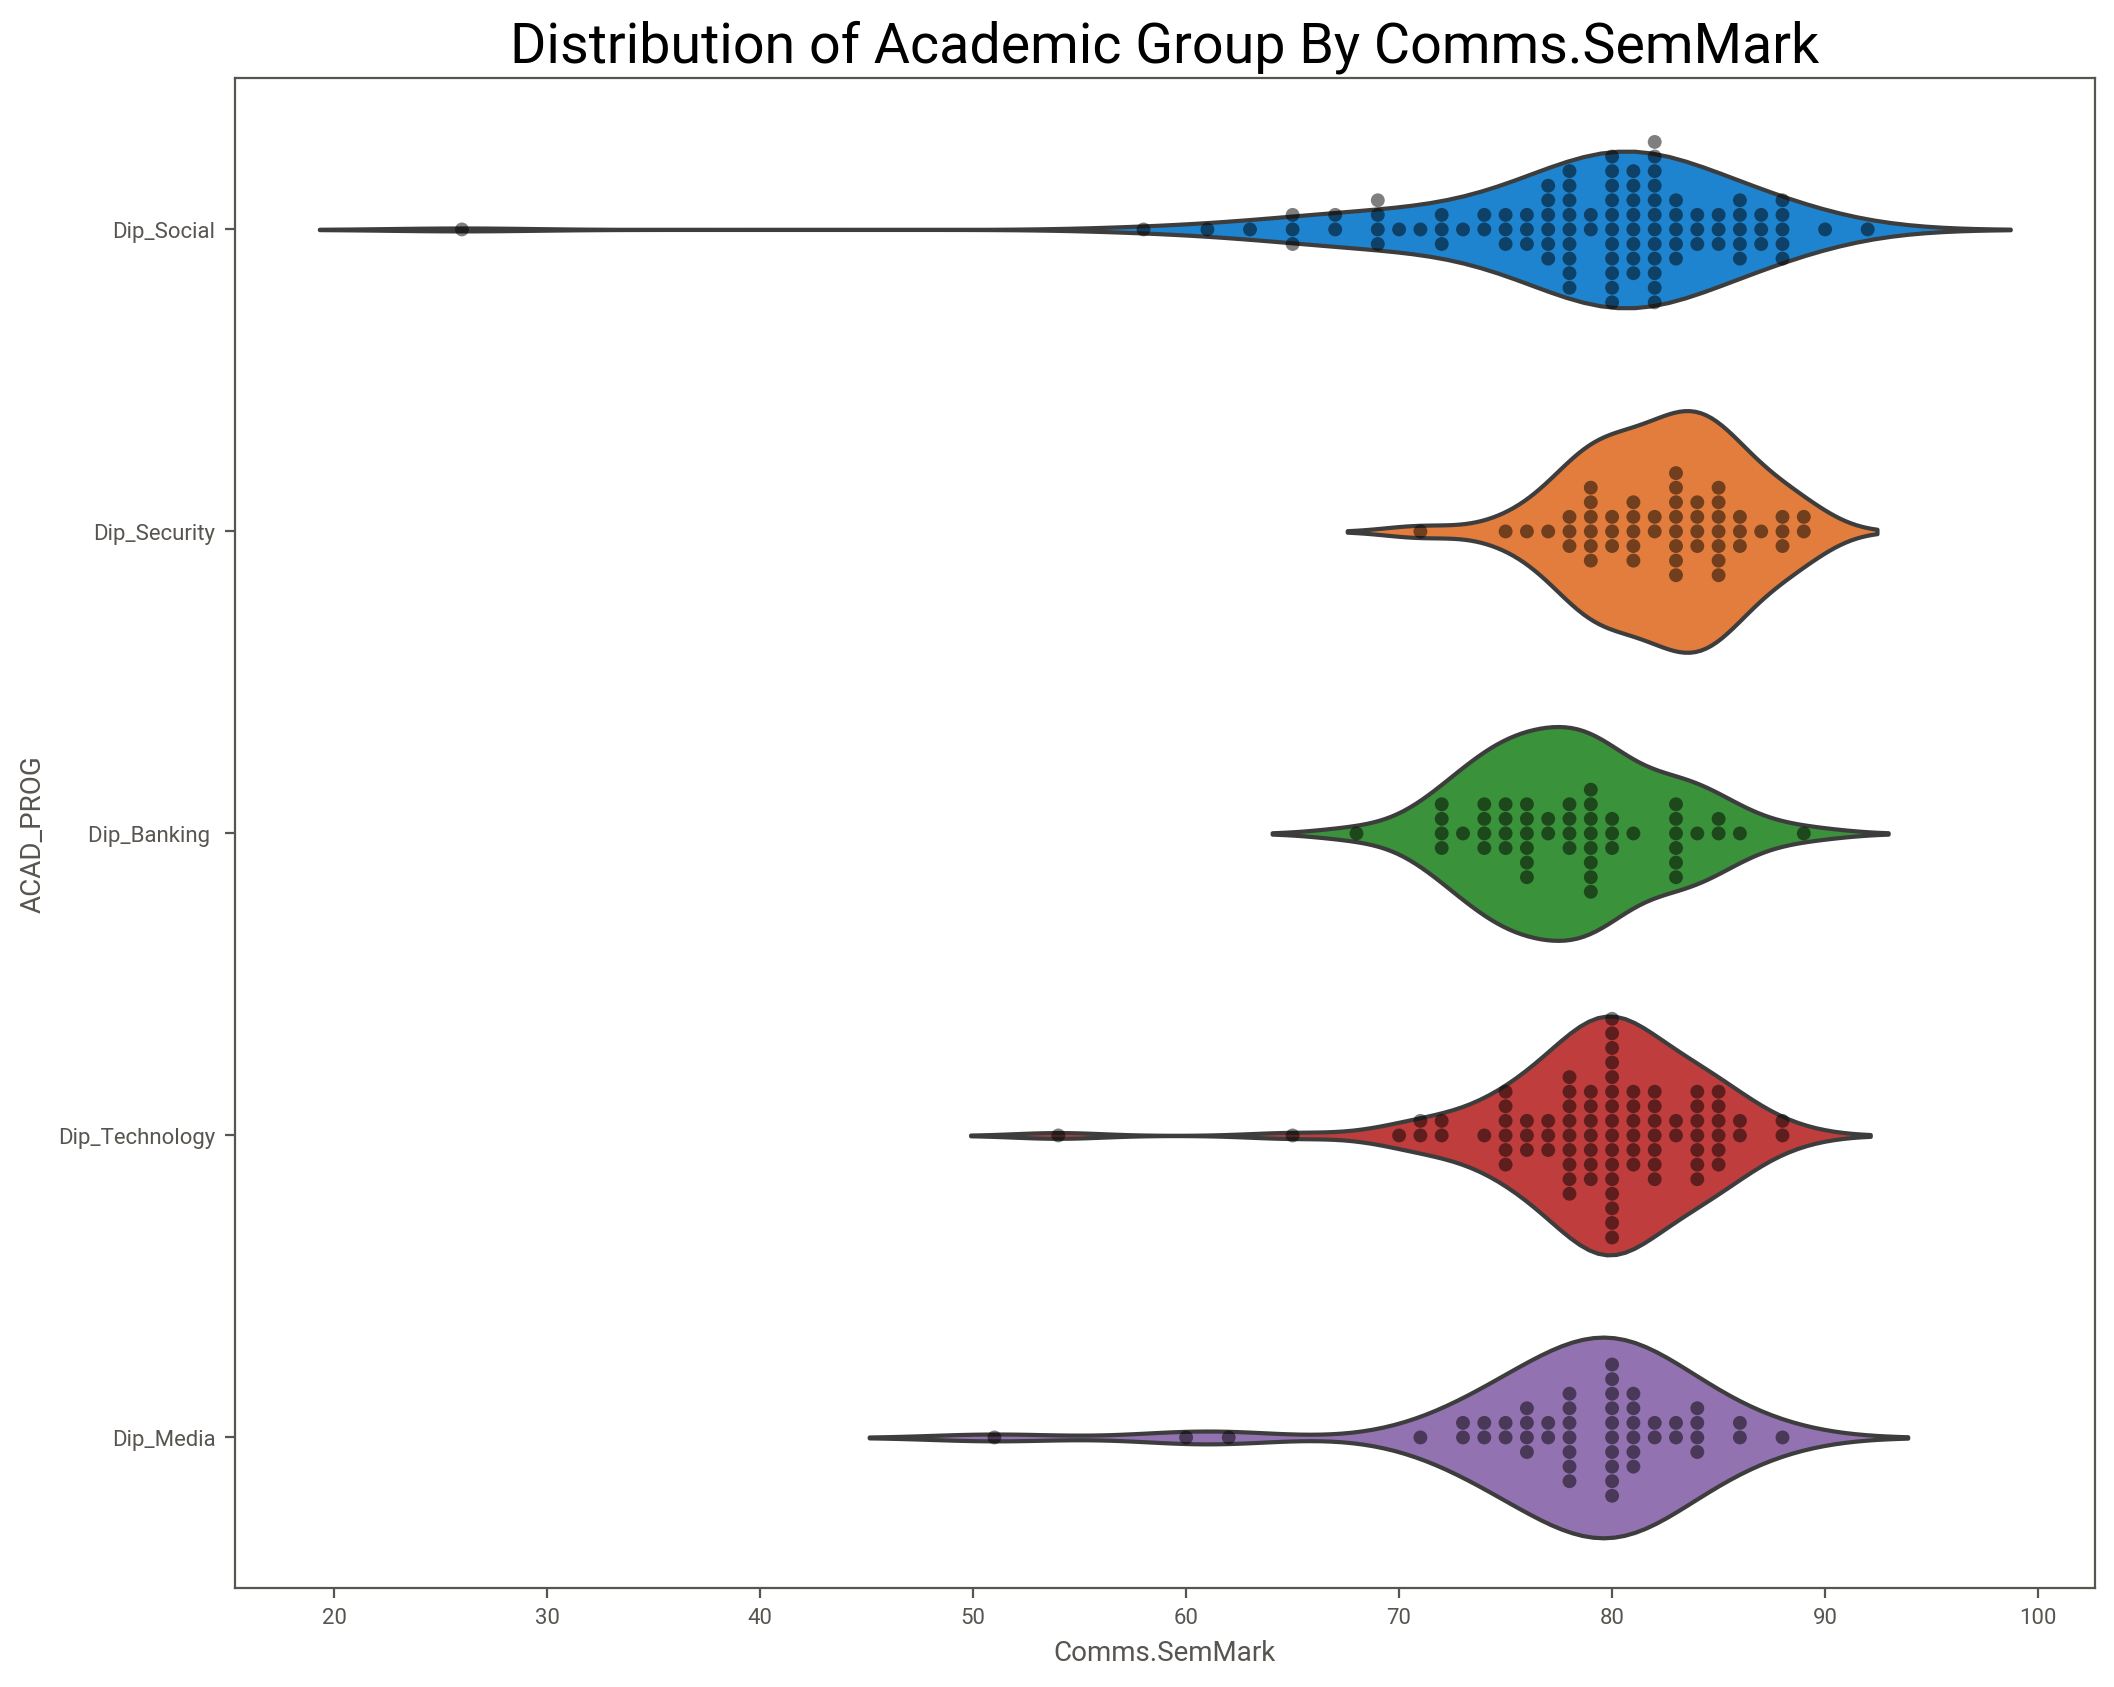

In [ ]:
# Combined swarm & violin plots to view  Distribution of observations for Comms.SemMark variable.

# Set figure size.

plt.figure(figsize=(12,10))
 
# Create violin plot with inner boxplots removed.

sns.violinplot(x='Comms.SemMark',
               y='ACAD_PROG', 
               data=data_academicgroup, 
               inner=None), # Remove the bars inside the violins

# Overlay swarm plot on violin plot.

sns.swarmplot(x='Comms.SemMark', 
              y='ACAD_PROG', 
              data=data_academicgroup, 
              color='k', # Make points black and 
              alpha=0.5) # slightly transparent
 
# Set title.

plt.title('Distribution of Academic Group By Comms.SemMark', fontsize=20)


# Display the plot.

plt.show()

Text(0.5, 1.0, 'Distribution of Academic Group By Comms.SemMark')

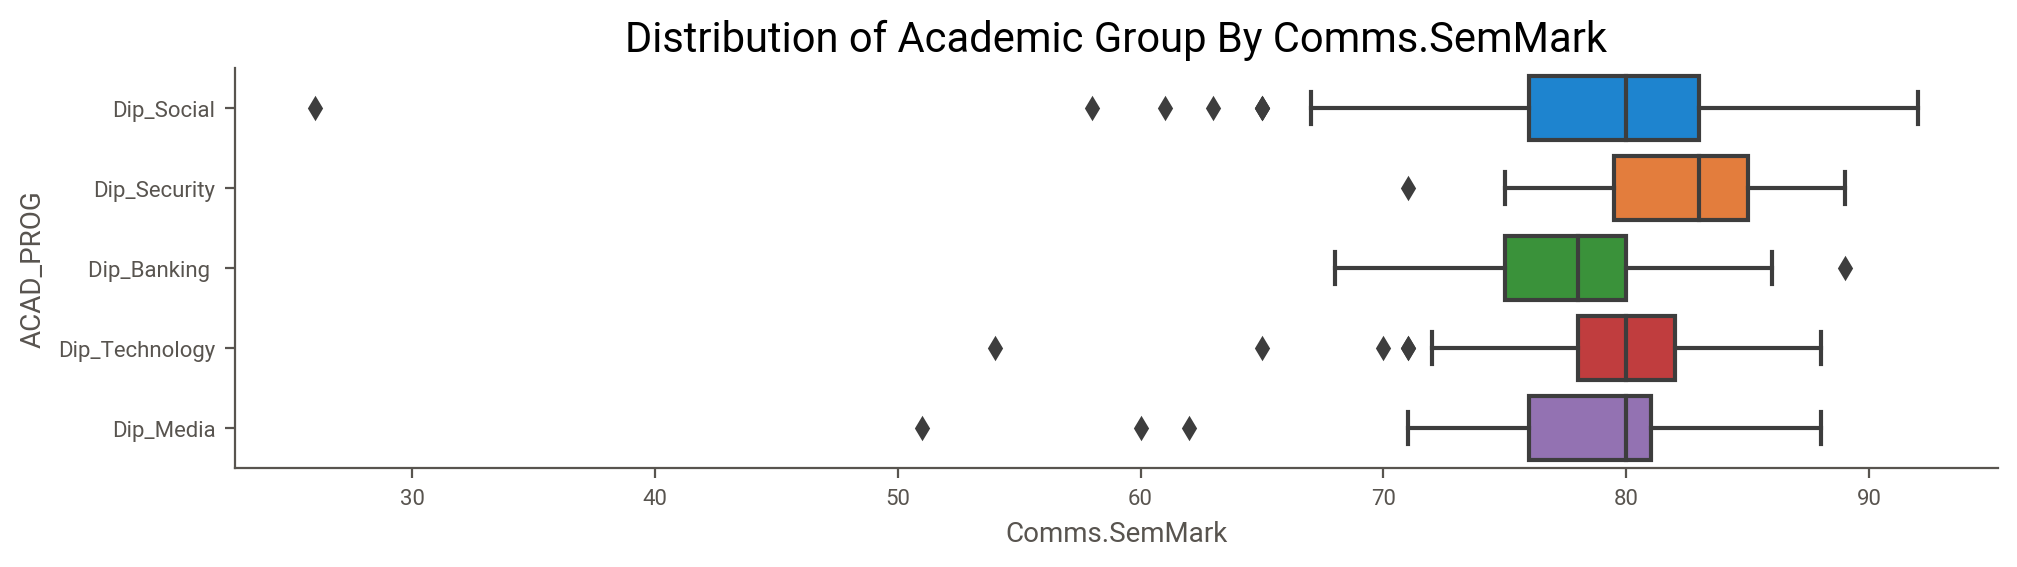

In [ ]:
# Let customised a boxplot using methods on the FacetGrid object that it returns.

g = sns.catplot(x='Comms.SemMark', y='ACAD_PROG',
                kind='box', orient='h', height=2.5, aspect=4,
                data=data_academicgroup)

# Display the plot.

plt.title('Distribution of Academic Group By Comms.SemMark', fontsize=15)

Text(0.5, 1.0, 'Statistical estimation (Mean) of Academic Group By Comms.SemMark')

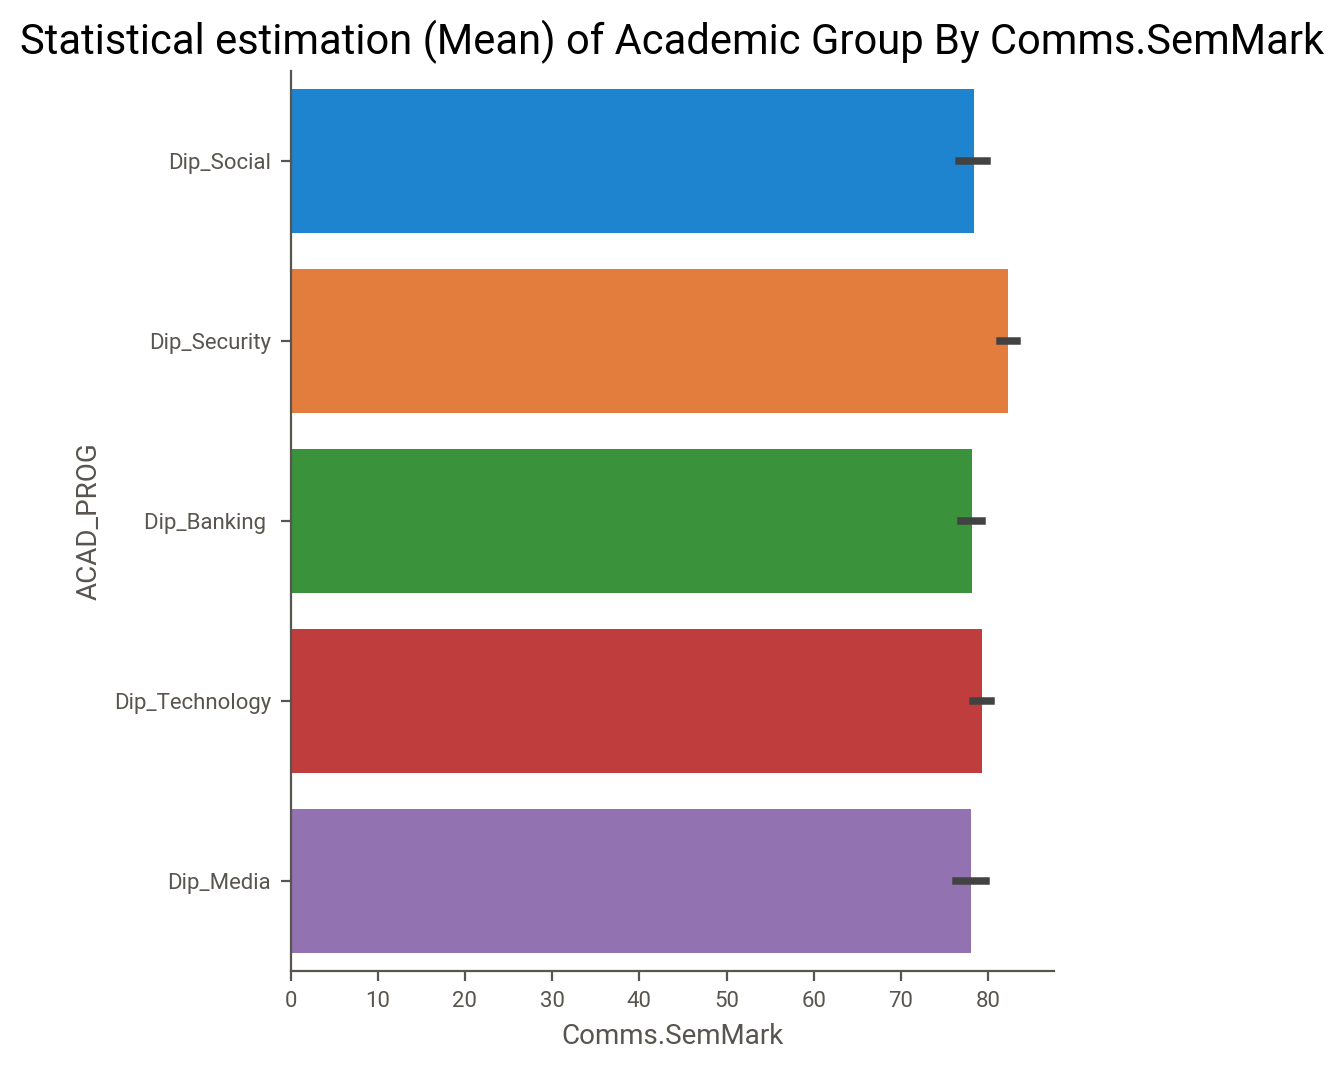

In [ ]:
# A barplot() function operates on a full dataset and applies a function to obtain the estimate
# (taking the mean by default). it also uses bootstrapping to compute a confidence interval 
# around the estimate, which is plotted using error bars.

sns.catplot(x='Comms.SemMark', y='ACAD_PROG', kind='bar', data=data_academicgroup)

plt.title('Statistical estimation (Mean) of Academic Group By Comms.SemMark', fontsize=15)

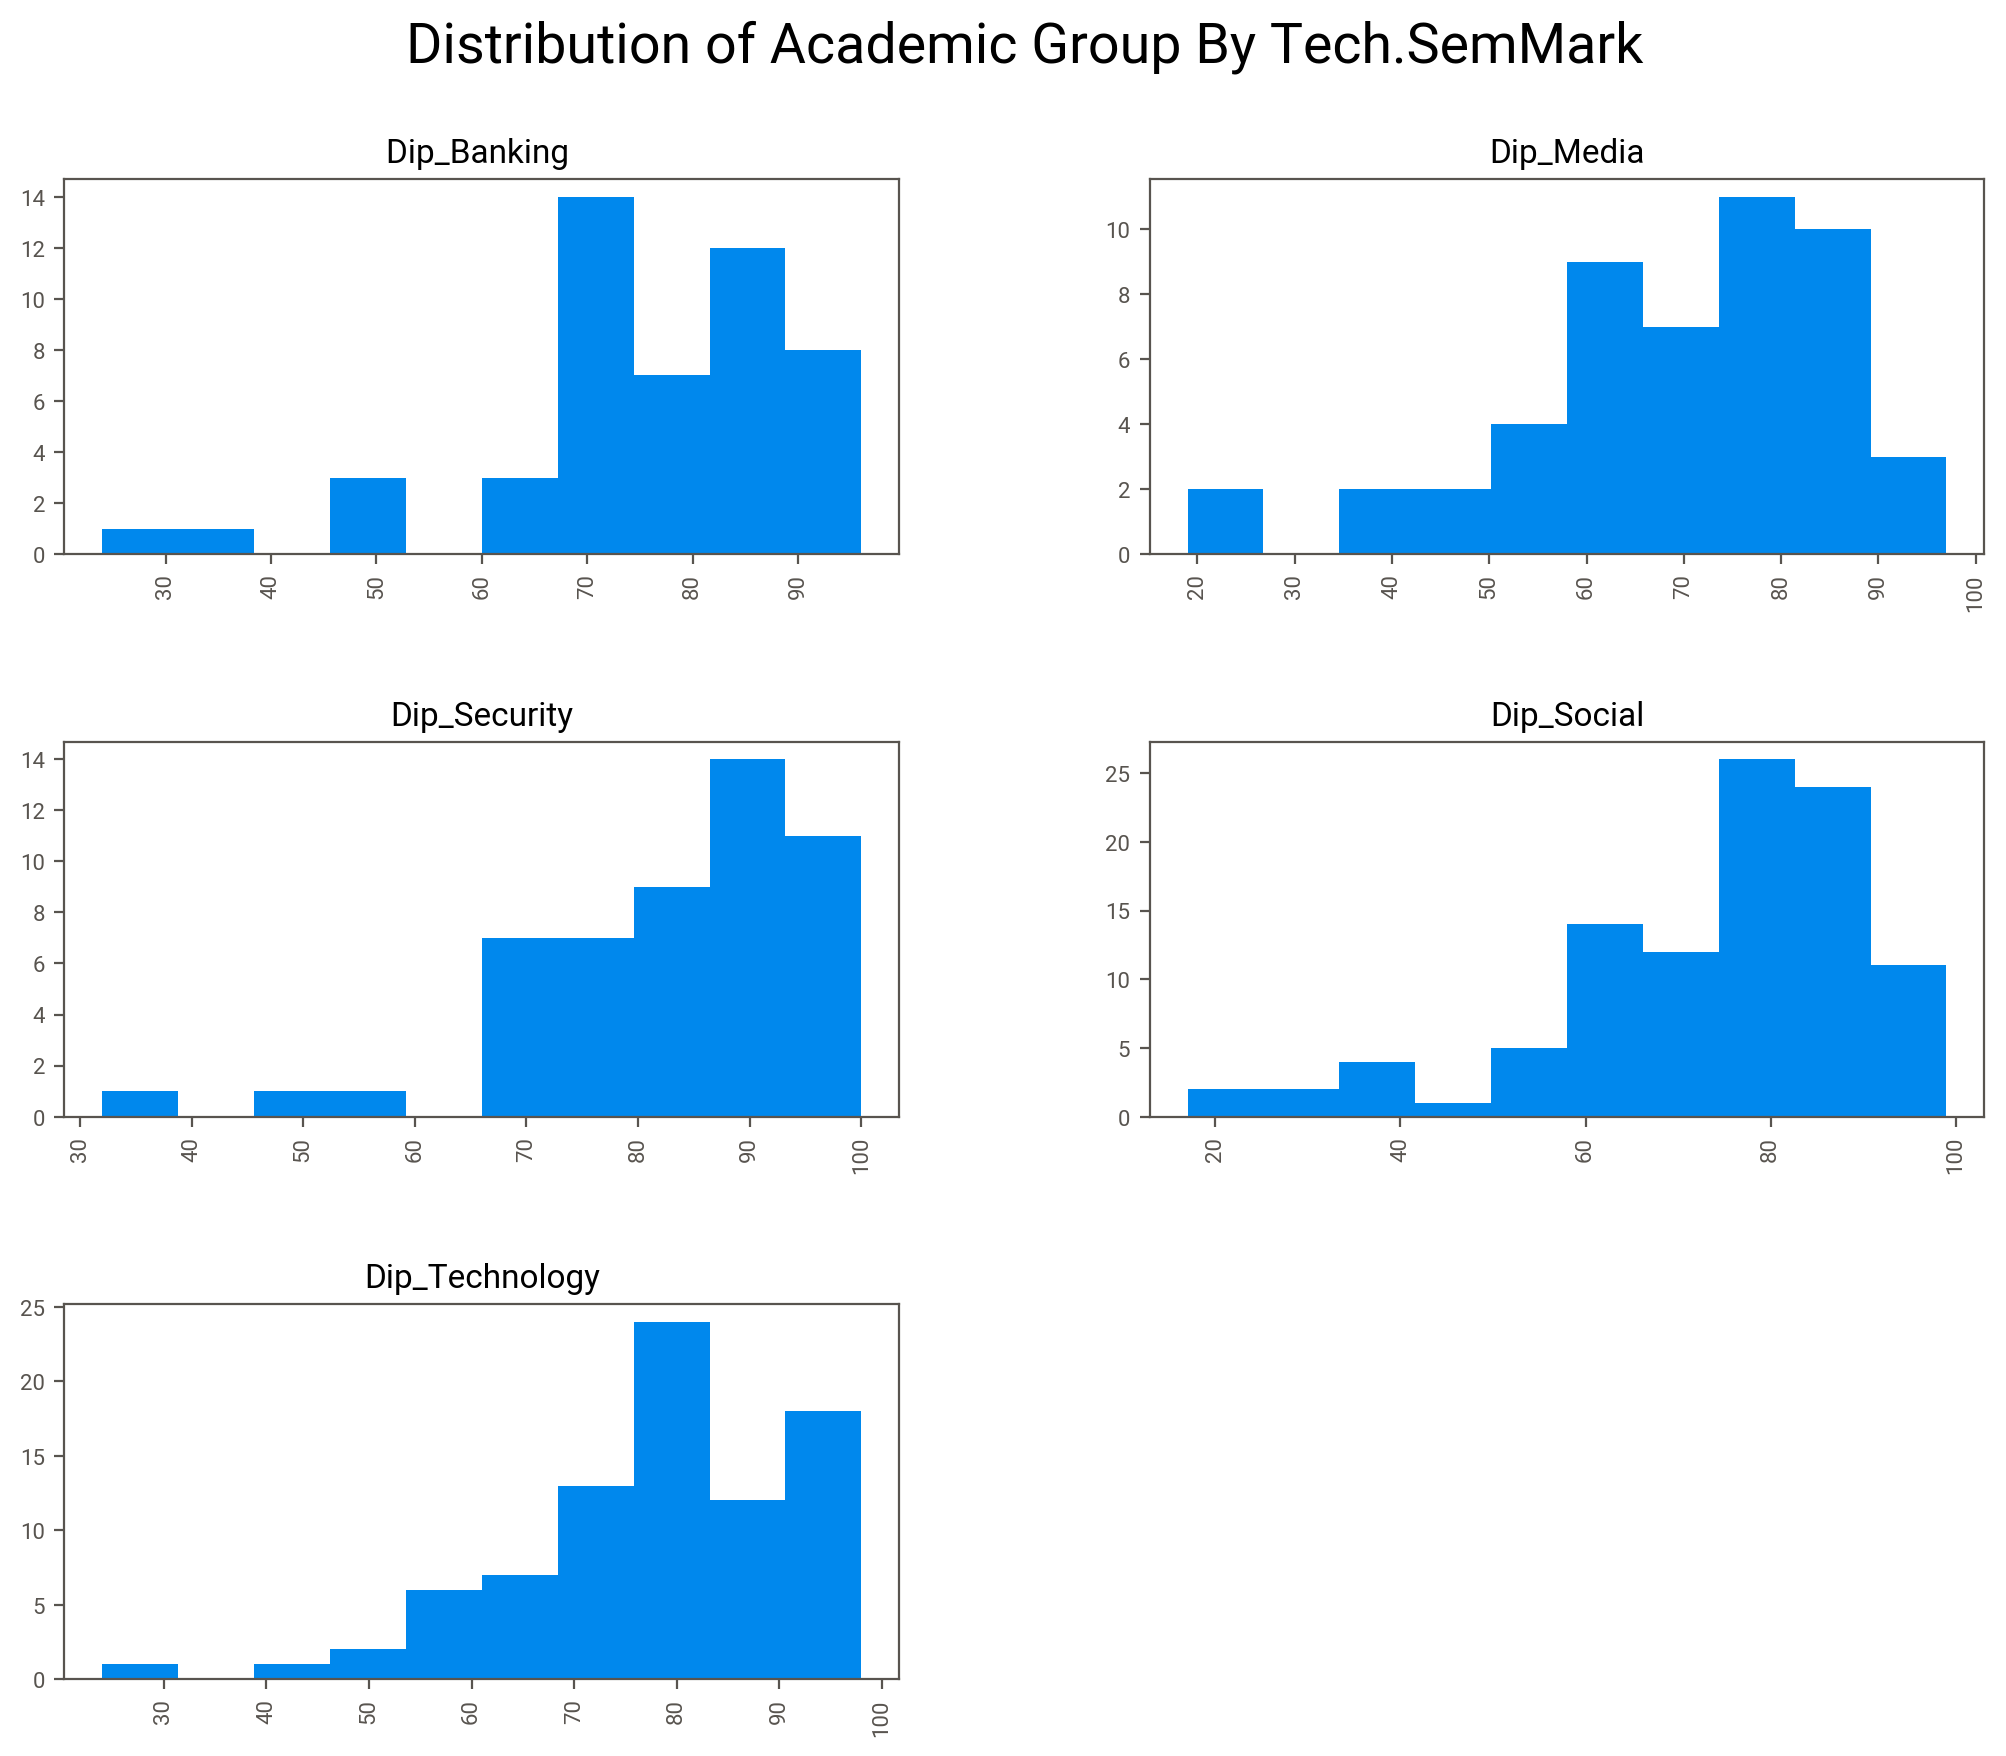

In [ ]:
# Let create histograms to view the Distribution of observations for Tech.SemMark variable.

# Plot histograms.

data_academicgroup.hist(by='ACAD_PROG',column='Tech.SemMark')

# Set title.

pl.suptitle('Distribution of Academic Group By Tech.SemMark', fontsize=20)

# Display the plot.

plt.show()

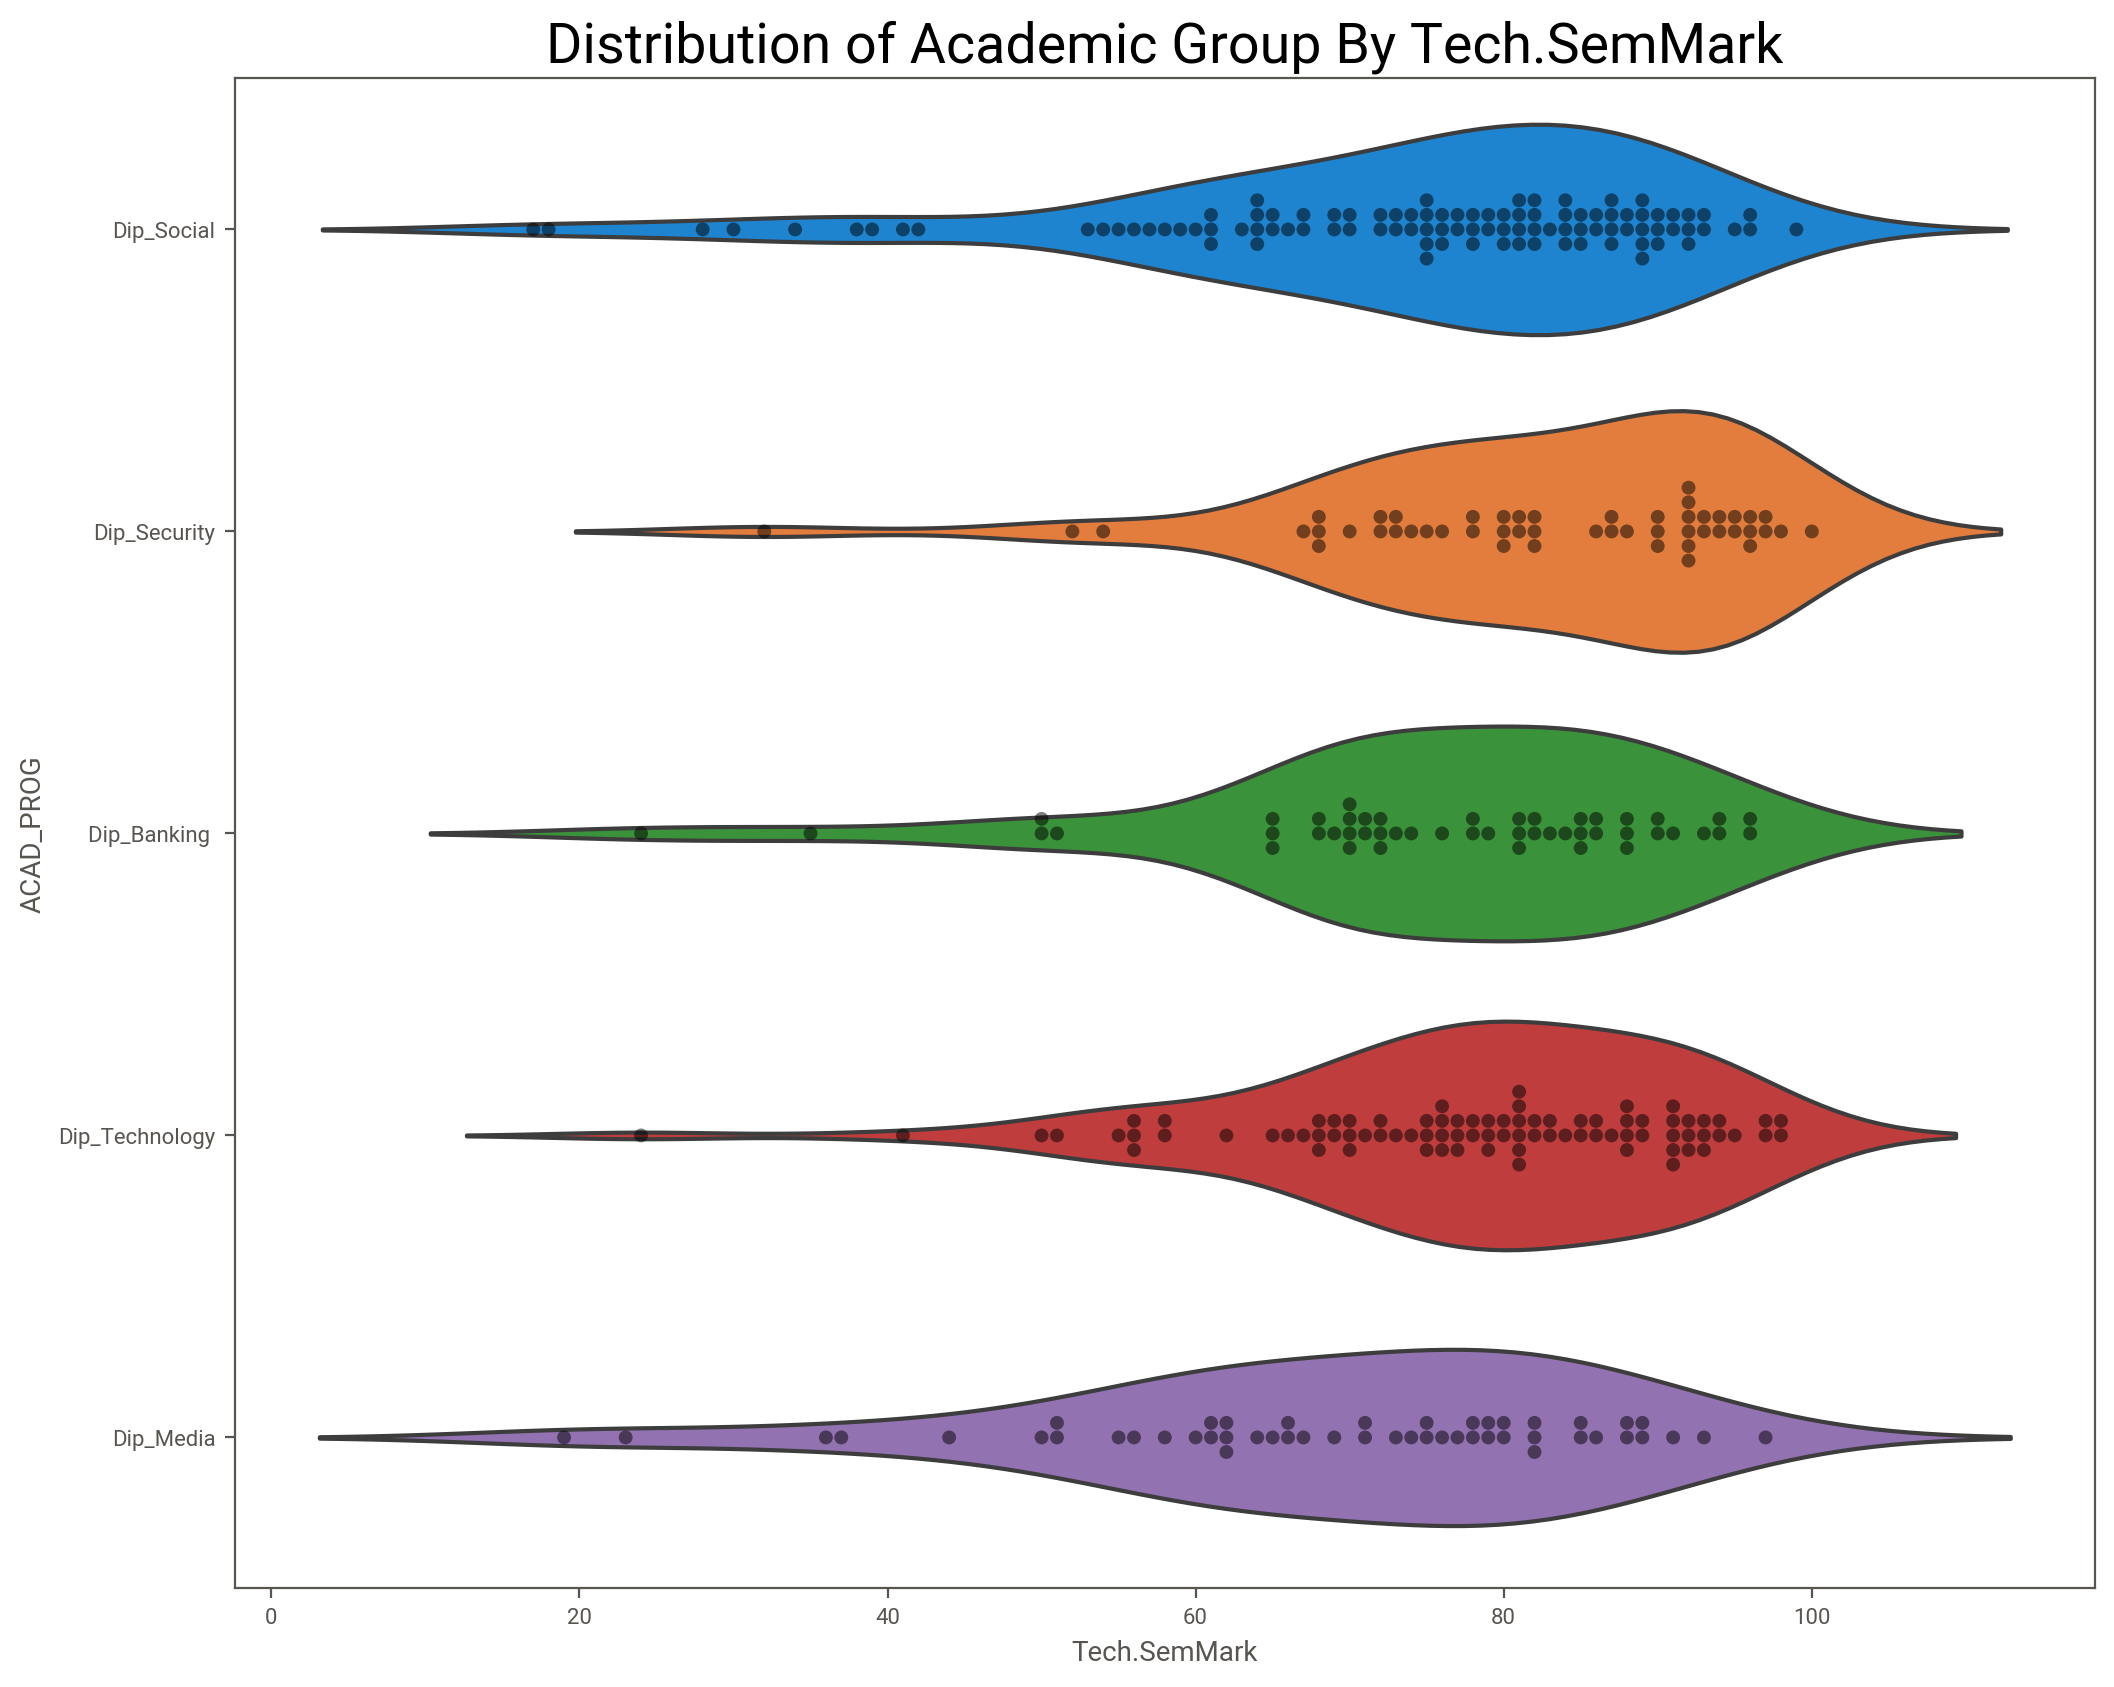

In [ ]:
# Combined swarm & violin plots to view  Distribution of observations for Tech.SemMark variable.

# Set figure size.

plt.figure(figsize=(12,10))
 
# Create violin plot with inner boxplots removed.

sns.violinplot(x='Tech.SemMark',
               y='ACAD_PROG', 
               data=data_academicgroup, 
               inner=None), # Remove the bars inside the violins

# Overlay swarm plot on violin plot.

sns.swarmplot(x='Tech.SemMark', 
              y='ACAD_PROG', 
              data=data_academicgroup, 
              color='k', # Make points black and 
              alpha=0.5) # slightly transparent
 
# Set title.

plt.title('Distribution of Academic Group By Tech.SemMark', fontsize=20)


# Display the plot.

plt.show()

Text(0.5, 1.0, 'Distribution of Academic Group By Tech.SemMark')

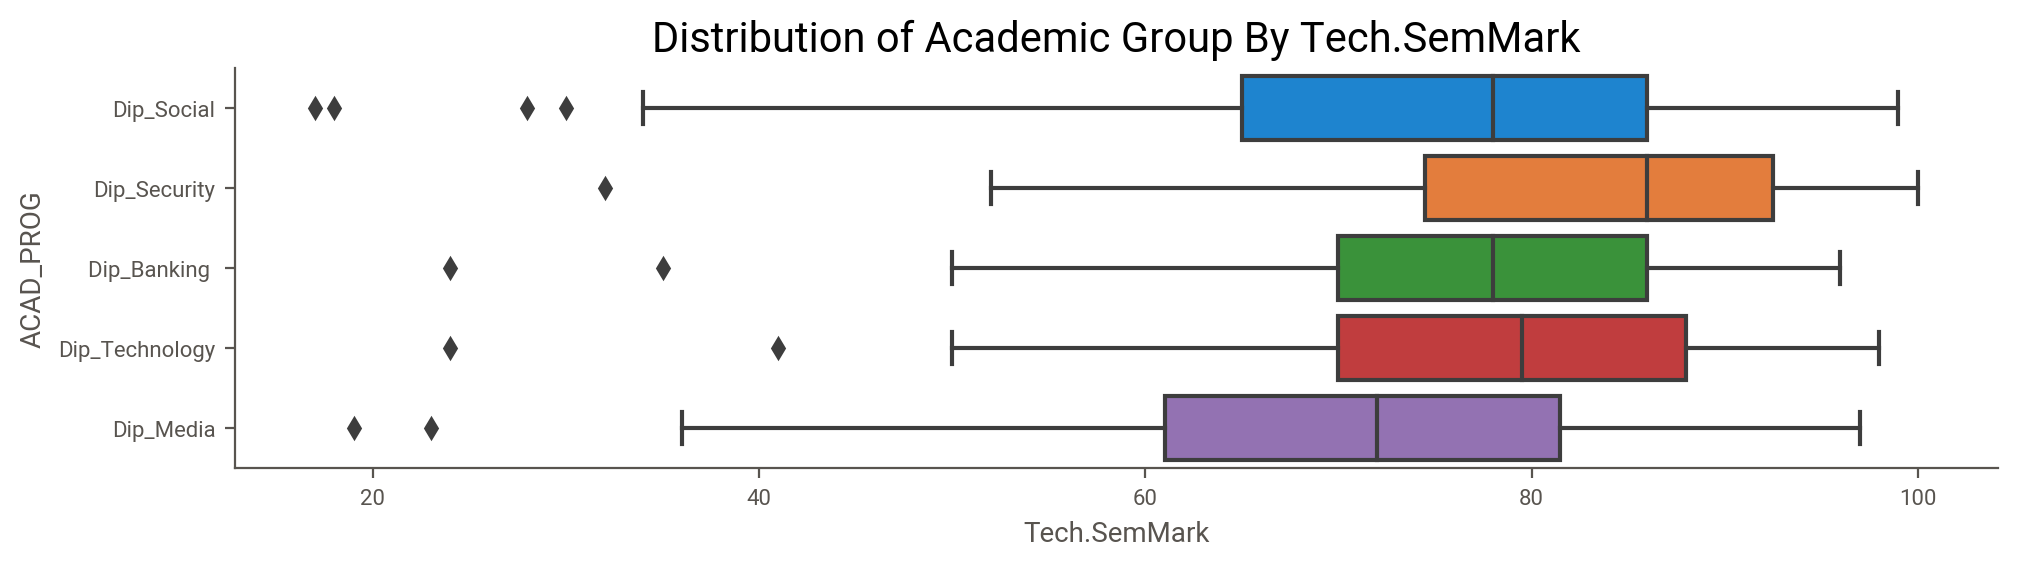

In [ ]:
# Let customised a boxplot using methods on the FacetGrid object that it returns.

g = sns.catplot(x='Tech.SemMark', y='ACAD_PROG',
                kind='box', orient='h', height=2.5, aspect=4,
                data=data_academicgroup)

# Display the plot.

plt.title('Distribution of Academic Group By Tech.SemMark', fontsize=15)

Text(0.5, 1.0, 'Statistical estimation (Mean) of Academic Group By Tech.SemMark')

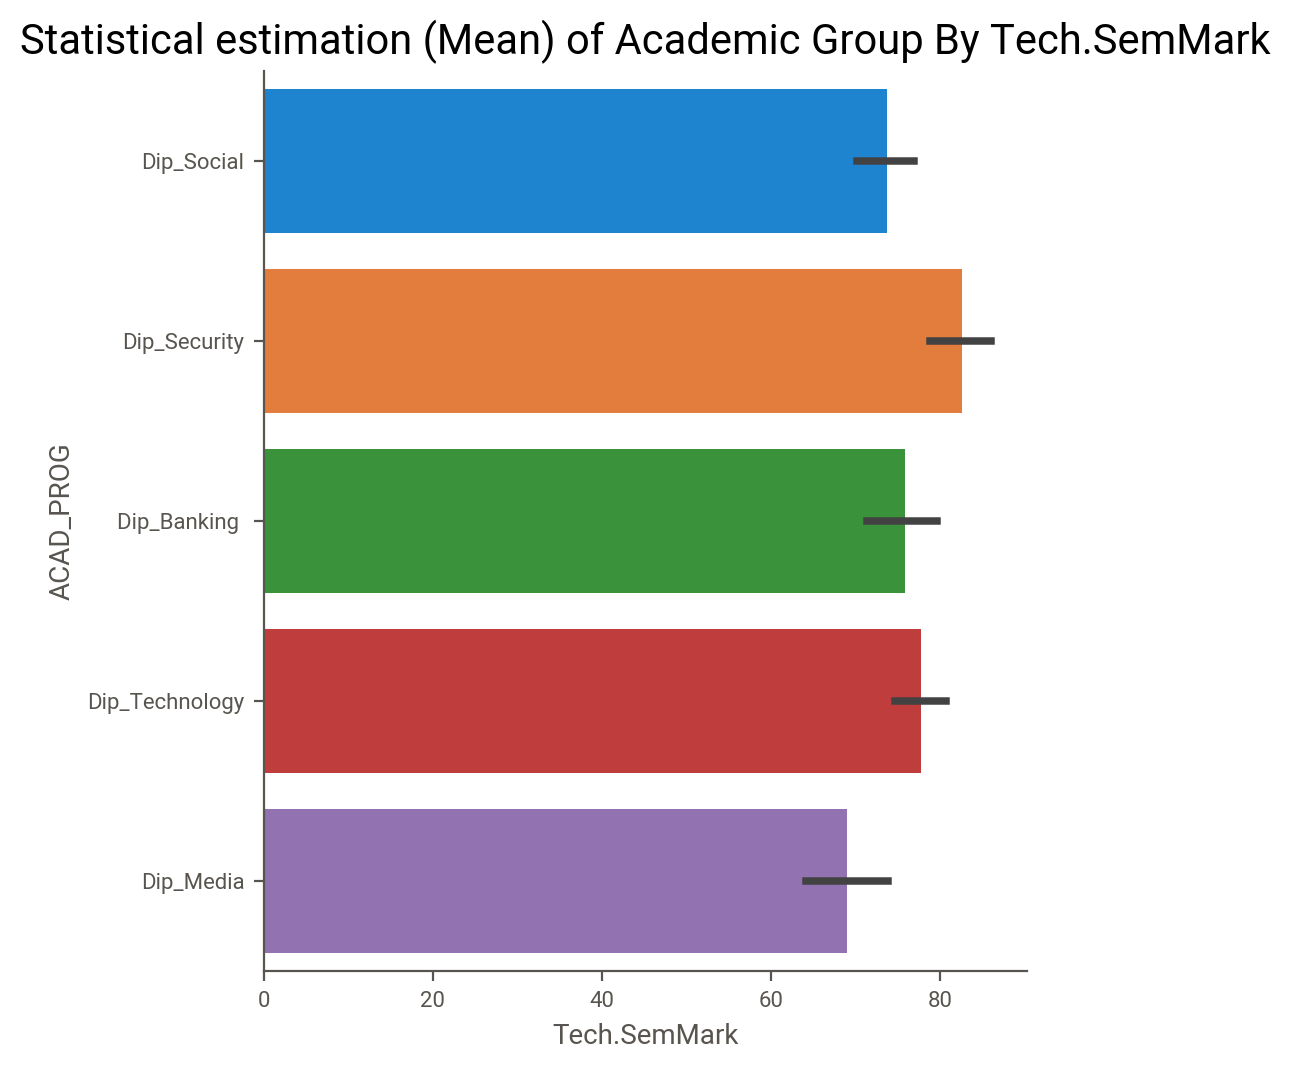

In [ ]:
# A barplot() function operates on a full dataset and applies a function to obtain the estimate
# (taking the mean by default). it also uses bootstrapping to compute a confidence interval 
# around the estimate, which is plotted using error bars.

sns.catplot(x='Tech.SemMark', y='ACAD_PROG', kind='bar', data=data_academicgroup)

plt.title('Statistical estimation (Mean) of Academic Group By Tech.SemMark', fontsize=15)

### Commentary: Distribution of Observations Within Categories Variables 

A histogram is used to summarize discrete or continuous data, it provides a visual interpretation of numerical data by showing the number of data points that fall within a specified range of values (called “bins”). It is similar to a vertical bar graph. However, a histogram, unlike a vertical bar graph, shows no gaps between the bars.  

A histogram provides a visual representation of data distribution. Histograms can display a large amount of data and the frequency of the data values. The median and distribution of the data can be determined by a histogram. In addition, it can show any outliers or gaps in the data.

Violin plots are a method of plotting numeric data and can be considered a combination of the  swarm plot with a kernel density plot. By adding the swarm plot I can see where the actual majority of data points are contained. A swarm plot is an excellent complement to a violin plot when I want to show all observations along with some representation of the underlying distribution. Therefore, when combining swarm and violin plots together they reveal greater insights.

The advantage of the violin plot over the box plot is that it also shows the entire distribution of the data. Violin plots are often used to compare the distribution of a given variable across some categories.

The box plot is a graphical way of representing the distribution of data on the basis of five number summary: (1) minimum, (2) first quartile, (3) median, (4) third quartile, and (5) maximum. The difference between the third quartile (Q3) and the first quartile (Q1) is referred to as interquartile range. There could also be an outlier that is an extreme value.

A Seaborn bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and I want to make comparisons against it. 

It is also important to keep in mind that a Seaborn bar plot shows only the mean value by default.


### Commentary: Is The Distribution of Marks Similar Across Academic Groups?

Based on the summary of distribution of observations within the categories variables:

The histograms show that the distribution of academic groups between Math.SemMark and Tech.SemMark is quite similar as most of the distribution are left-skewed , most of the values are in the upper portion of the distribution. Some extremely small values cause the long tail and distortion to the left and cause the mean to be less than the median. Because the skewness statistic for such a distribution will be less than zero, some use the term negative skew to describe this distribution. The boxplots also show that there are many outliers as many students scored below 50 marks.

The histograms of academic groups between Science.SemMark and Comms.SemMark shows that the Dip_Social displays a left-skewed distribution , most of the values are in the upper portion of the distribution. Some extremely small values cause the long tail and distortion to the left and cause the mean to be less than the median. Because the skewness statistic for such a distribution will be less than zero, some use the term negative skew to describe this distribution. The boxplots also show that there are extreme outliers as some students scored below 30 marks. 

The rest of the distribution of marks between Science.SemMark and Comms.SemMark are rather different. The histograms shows the following: 

A bimodal distribution which looks like the back of a two-humped camel. The outcomes of two processes with different distributions are combined in one set of data. 

A unimodal distribution is the distribution with one clear peak or most frequent value. The values increase at first, rising to a single peak where they then decrease.

A bimodal distribution there are two peaks of data, which usually indicates I have gotten two different groups. The two peaks in a bimodal distribution also represent two local maximums; these are points where the data points stop increasing and start decreasing.

## Comparison of Mean And Standard Deviation 

In [ ]:
# Let compare the mean and standard deviation score across the academic group.

# pandas.DataFrame.loc is used to select data by label which labels of columns are column names

dip_technology1 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Technology',['ACAD_PROG', 'Math.SemMark']]
dip_technology2 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Technology',['ACAD_PROG', 'Science.SemMark']]
dip_technology3 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Technology',['ACAD_PROG', 'Comms.SemMark']]
dip_technology4 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Technology',['ACAD_PROG', 'Tech.SemMark']]
dip_social1 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Social',['ACAD_PROG', 'Math.SemMark']]
dip_social2 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Social',['ACAD_PROG', 'Science.SemMark']]
dip_social3 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Social',['ACAD_PROG', 'Comms.SemMark']]
dip_social4 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Social',['ACAD_PROG', 'Tech.SemMark']]
dip_Security1 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Security',['ACAD_PROG', 'Math.SemMark']]
dip_Security2 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Security',['ACAD_PROG', 'Science.SemMark']]
dip_Security3 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Security',['ACAD_PROG', 'Comms.SemMark']]
dip_Security4 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Security',['ACAD_PROG', 'Tech.SemMark']]
dip_media1 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Media',['ACAD_PROG', 'Math.SemMark']]
dip_media2 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Media',['ACAD_PROG', 'Science.SemMark']]
dip_media3 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Media',['ACAD_PROG', 'Comms.SemMark']]
dip_media4 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Media',['ACAD_PROG', 'Tech.SemMark']]
dip_banking1 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Banking ',['ACAD_PROG', 'Math.SemMark']]
dip_banking2 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Banking ',['ACAD_PROG', 'Science.SemMark']]
dip_banking3 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Banking ',['ACAD_PROG', 'Comms.SemMark']]
dip_banking4 = data_academicgroup.loc[data_academicgroup['ACAD_PROG'] == 'Dip_Banking ',['ACAD_PROG', 'Tech.SemMark']]

# Mean.

mean_dip_technology1 = np.mean(dip_technology1['Math.SemMark']) 
mean_dip_technology2 = np.mean(dip_technology2['Science.SemMark']) 
mean_dip_technology3 = np.mean(dip_technology3['Comms.SemMark']) 
mean_dip_technology4 = np.mean(dip_technology4['Tech.SemMark']) 
mean_dip_social1 = np.mean(dip_social1['Math.SemMark']) 
mean_dip_social2 = np.mean(dip_social2['Science.SemMark']) 
mean_dip_social3 = np.mean(dip_social3['Comms.SemMark']) 
mean_dip_social4 = np.mean(dip_social4['Tech.SemMark']) 
mean_dip_Security1 = np.mean(dip_Security1['Math.SemMark']) 
mean_dip_Security2 = np.mean(dip_Security2['Science.SemMark']) 
mean_dip_Security3 = np.mean(dip_Security3['Comms.SemMark']) 
mean_dip_Security4 = np.mean(dip_Security4['Tech.SemMark']) 
mean_dip_media1 = np.mean(dip_media1['Math.SemMark']) 
mean_dip_media2 = np.mean(dip_media2['Science.SemMark']) 
mean_dip_media3 = np.mean(dip_media3['Comms.SemMark']) 
mean_dip_media4 = np.mean(dip_media4['Tech.SemMark'])
mean_dip_banking1 = np.mean(dip_banking1['Math.SemMark'])
mean_dip_banking2 = np.mean(dip_banking2['Science.SemMark'])
mean_dip_banking3 = np.mean(dip_banking3['Comms.SemMark'])
mean_dip_banking4 = np.mean(dip_banking4['Tech.SemMark'])

# Standard deviation.

# ddof is Means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, 
# where N represents the number of elements. By default ddof is 0.

s_dip_technology1 = np.std(dip_technology1['Math.SemMark'], ddof = 1)
s_dip_technology2 = np.std(dip_technology2['Science.SemMark'], ddof = 1)
s_dip_technology3 = np.std(dip_technology3['Comms.SemMark'], ddof = 1)
s_dip_technology4 = np.std(dip_technology4['Tech.SemMark'], ddof = 1)
s_dip_social1 = np.std(dip_social1['Math.SemMark'], ddof = 1)
s_dip_social2 = np.std(dip_social2['Science.SemMark'], ddof = 1)
s_dip_social3 = np.std(dip_social3['Comms.SemMark'], ddof = 1)
s_dip_social4 = np.std(dip_social4['Tech.SemMark'], ddof = 1)
s_dip_Security1 = np.std(dip_Security1['Math.SemMark'], ddof = 1)
s_dip_Security2 = np.std(dip_Security2['Science.SemMark'], ddof = 1)
s_dip_Security3 = np.std(dip_Security3['Comms.SemMark'], ddof = 1)
s_dip_Security4 = np.std(dip_Security4['Tech.SemMark'], ddof = 1)
s_dip_media1 = np.std(dip_media1['Math.SemMark'], ddof = 1)
s_dip_media2 = np.std(dip_media2['Science.SemMark'], ddof = 1)
s_dip_media3 = np.std(dip_media3['Comms.SemMark'], ddof = 1)
s_dip_media4 = np.std(dip_media4['Tech.SemMark'], ddof = 1)
s_dip_banking1 = np.std(dip_banking1['Math.SemMark'], ddof = 1)
s_dip_banking2 = np.std(dip_banking2['Science.SemMark'], ddof = 1)
s_dip_banking3 = np.std(dip_banking3['Comms.SemMark'], ddof = 1)
s_dip_banking4 = np.std(dip_banking4['Tech.SemMark'], ddof = 1)

# Display mean & standard deviation.

print('Dip_Technology - Math.SemMark Mean & Standard Deviation:'
      , mean_dip_technology1, s_dip_technology1)
print()
print('Dip_Technology - Science.SemMark Mean & Standard Deviation:'
      , mean_dip_technology2, s_dip_technology2)
print()
print('Dip_Technology - Comms.SemMark Mean & Standard Deviation:'
      , mean_dip_technology3, s_dip_technology3)
print()
print('Dip_Technology - Tech.SemMark Mean & Standard Deviation:'
      , mean_dip_technology4, s_dip_technology4)
print()
print('Dip_Social - Math.SemMark Mean & Standard Deviation:'
      , mean_dip_social1, s_dip_social1)
print()
print('Dip_Social - Science.SemMark Mean & Standard Deviation:'
      , mean_dip_social2, s_dip_social2)
print()
print('Dip_Social - Comms.SemMark Mean & Standard Deviation:'
      , mean_dip_social3, s_dip_social3)
print()
print('Dip_Social - Tech.SemMark Mean & Standard Deviation:'
      , mean_dip_social4, s_dip_social4)
print()
print('Dip_Security  - Math.SemMark Mean & Standard Deviation:'
      , mean_dip_Security1, s_dip_Security1)
print()
print('Dip_Security  - Science.SemMark Mean & Standard Deviation:'
      , mean_dip_Security2, s_dip_Security2)
print()
print('Dip_Security  - Comms.SemMark Mean & Standard Deviation:'
      , mean_dip_Security3, s_dip_Security3)
print()
print('Dip_Security  - Tech.SemMark Mean & Standard Deviation:'
      , mean_dip_Security4, s_dip_Security4)
print()
print('Dip_Media  - Math.SemMark Mean & Standard Deviation:'
      , mean_dip_media1, s_dip_media1)
print()
print('Dip_Media  - Science.SemMark Mean & Standard Deviation:'
      , mean_dip_media2, s_dip_media2)
print()
print('Dip_Media  - Comms.SemMark Mean & Standard Deviation:'
      , mean_dip_media3, s_dip_media3)
print()
print('Dip_Media  - Tech.SemMark Mean & Standard Deviation:'
      , mean_dip_media4, s_dip_media4)
print()
print('Dip_Banking  - Math.SemMark Mean & Standard Deviation:'
      , mean_dip_banking1, s_dip_banking1)
print()
print('Dip_Banking  - Science.SemMark Mean & Standard Deviation:'
      , mean_dip_banking2, s_dip_banking2)
print()
print('Dip_Banking  - Comms.SemMark Mean & Standard Deviation:'
      , mean_dip_banking3, s_dip_banking3)
print()
print('Dip_Banking  - Tech.SemMark Mean & Standard Deviation:'
      , mean_dip_banking4, s_dip_banking4)

Dip_Technology - Math.SemMark Mean & Standard Deviation: 78.61904761904762 14.078013929190302

Dip_Technology - Science.SemMark Mean & Standard Deviation: 79.16666666666667 5.1151401383088375

Dip_Technology - Comms.SemMark Mean & Standard Deviation: 79.3452380952381 4.997575430505429

Dip_Technology - Tech.SemMark Mean & Standard Deviation: 77.78571428571429 13.74910417986238

Dip_Social - Math.SemMark Mean & Standard Deviation: 76.92079207920793 12.407806549359826

Dip_Social - Science.SemMark Mean & Standard Deviation: 76.99009900990099 7.3218782419608015

Dip_Social - Comms.SemMark Mean & Standard Deviation: 78.34653465346534 8.42310589220432

Dip_Social - Tech.SemMark Mean & Standard Deviation: 73.6930693069307 17.23063700172308

Dip_Security  - Math.SemMark Mean & Standard Deviation: 82.82352941176471 13.045621307324451

Dip_Security  - Science.SemMark Mean & Standard Deviation: 79.68627450980392 4.8928118544592785

Dip_Security  - Comms.SemMark Mean & Standard Deviation: 82.3137

### Commentary: Is There A Particular Academic Group That Fared Better?

Based on the summary of distribution of observations within the categories variables, the Seaborn bar plots show that across academic groups, Dip_Security have the highest average marks from the four SemMark (each module final score).

Based upon the above analysis comparison of mean and standard deviation in score across the academic group, Dip_Security have the highest average marks for Math.SemMark, Comms.SemMark, Science.SemMark and Tech.SemMark.

# Question 3: Students From Dip_Security Consistently Perform Better. Is That A Fair Statement? Use Hypothesis Testing To Prove Or Disprove This Statement. (15 Marks)


## Use Hypothesis Testing To Prove Or Disprove This Statement. 

A hypothesis test is a statistical test that is used to ascertain whether I am allowed
to assume that a certain condition is true for the entire population, given a data
sample. Basically, a hypothesis test is a test for a certain hypothesis that I have
about an entire population. The result of the test then tells me whether I should
believe the hypothesis or reject it for an alternative one.

A hypothesis test generally looks at two opposing hypotheses about a population.
I call them the null hypothesis and the alternative hypothesis. The null
hypothesis is the statement being tested and is the default correct answer; it is
the starting point and my original hypothesis. The alternative hypothesis is the
statement that opposes the null hypothesis. The test will tell me which hypothesis I
should trust and which I should reject.

Based on sample data from a population, a hypothesis test determines whether or
not to reject the null hypothesis. I usually use a p-value (which is based on the
significance level) to make this conclusion.

## Hypothesis Testing: Two Sample Mean T-Test For Dip_Technology - Math.SemMark And Dip_Security - Math.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Technology - Math.SemMark is 78.61 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Technology - Math.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Technology - Math.SemMark

x̄2 is Dip_Security - Math.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_technology1sample = dip_technology1.sample(n=30)
dip_Security1sample = dip_Security1.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Technology - Math.SemMark > x̄2: Dip_Security - Math.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Technology - Math.SemMark perform better, when in fact it is not.

In [15]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_technology1float = dip_technology1sample.iloc[:,1]

dip_Security1float = dip_Security1sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_technology1float, dip_Security1float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -1.6091550076729562
p-value: 0.9434937086634879


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Technology - Math.SemMark score is better than Dip_Security - Math.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Technology - Math.SemMark score is worse than Dip_Security - Math.SemMark.")

Accept null hypothesis, the average Dip_Technology - Math.SemMark score is worse than Dip_Security - Math.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Technology - Science.SemMark And Dip_Security - Science.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Technology -  Science.SemMark is 79.07 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Technology -  Science.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Technology -  Science.SemMark

x̄2 is Dip_Security -  Science.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 


In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_technology2sample = dip_technology2.sample(n=30)
dip_Security2sample = dip_Security2.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Technology - Science.SemMark > x̄2: Dip_Security - Science.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Technology - Science.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_technology2float = dip_technology2.iloc[:,1]

dip_Security2float = dip_Security2.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_technology2float, dip_Security2float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -0.5816096578097637
p-value: 0.7190929502070855


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Technology - Science.SemMark score is better than Dip_Security - Science.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Technology - Science.SemMark score is worse than Dip_Security - Science.SemMark.")

Accept null hypothesis, the average Dip_Technology - Science.SemMark score is worse than Dip_Security - Science.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Technology - Comms.SemMark And Dip_Security - Comms.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Technology - Comms.SemMark is 79.63 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Technology - Comms.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Technology - Comms.SemMark

x̄2 is Dip_Security - Comms.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_technology3sample = dip_technology3.sample(n=30)
dip_Security3sample = dip_Security3.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Technology - Comms.SemMark > x̄2: Dip_Security - Comms.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Technology - Comms.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_technology3float = dip_technology3sample.iloc[:,1]

dip_Security3float = dip_Security3sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_technology3float, dip_Security3float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -3.7268934457961005
p-value: 0.9997791625539908


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Technology - Comms.SemMark score is better than Dip_Security - Comms.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Technology - Comms.SemMark score is worse than Dip_Security - Comms.SemMark.")

Accept null hypothesis, the average Dip_Technology - Comms.SemMark score is worse than Dip_Security - Comms.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Technology - Tech.SemMark And Dip_Security - Tech.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Technology - Tech.SemMark is 77.42 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Technology - Tech.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Technology - Tech.SemMark

x̄2 is Dip_Security - Tech.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_technology4sample = dip_technology4.sample(n=30)
dip_Security4sample = dip_Security4.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Technology - Tech.SemMark > x̄2: Dip_Security - Tech.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Technology - Tech.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic


In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_technology4float = dip_technology4sample.iloc[:,1]

dip_Security4float = dip_Security4sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_technology4float, dip_Security4float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -1.9335310936103656
p-value: 0.9709718631482379


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Technology - Tech.SemMark score is better than Dip_Security - Tech.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Technology - Tech.SemMark score is worse than Dip_Security - Tech.SemMark.")

Accept null hypothesis, the average Dip_Technology - Tech.SemMark score is worse than Dip_Security - Tech.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Social - Math.SemMark And Dip_Security - Math.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Social - Math.SemMark is 76.92 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Social - Math.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Social - Math.SemMark

x̄2 is Dip_Security - Math.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_social1sample = dip_social1.sample(n=30)
dip_Security1sample = dip_Security1.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Social - Math.SemMark > x̄2: Dip_Security - Math.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Social - Math.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic


In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_social1float = dip_social1sample.iloc[:,1]

dip_Security1float = dip_Security1sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_social1float, dip_Security1float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -0.6870003973126448
p-value: 0.7525898469320904


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Social - Math.SemMark score is better than Dip_Security - Math.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Social - Math.SemMark score is worse than Dip_Security - Math.SemMark.")

Accept null hypothesis, the average Dip_Social - Math.SemMark score is worse than Dip_Security - Math.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Social - Science.SemMark And Dip_Security - Science.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Social - Science.SemMark is 76.99 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Social - Science.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Social - Science.SemMark

x̄2 is Dip_Security - Science.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_social2sample = dip_social2.sample(n=30)
dip_Security2sample = dip_Security2.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Social - Science.SemMark > x̄2: Dip_Security - Science.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Social - Science.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_social2float = dip_social2sample.iloc[:,1]

dip_Security2float = dip_Security2sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_social2float, dip_Security2float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -2.261826000825963
p-value: 0.9862640014008951


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Social - Science.SemMark score is better than Dip_Security - Science.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Social - Science.SemMark score is worse than Dip_Security - Science.SemMark.")

Accept null hypothesis, the average Dip_Social - Science.SemMark score is worse than Dip_Security - Science.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Social - Comms.SemMark And Dip_Security - Comms.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Social - Comms.SemMark is 78.34 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Social - v perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Social - Comms.SemMark

x̄2 is Dip_Security - Comms.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_social3sample = dip_social3.sample(n=30)
dip_Security3sample = dip_Security3.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Social - Comms.SemMark > x̄2: Dip_Security - Comms.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Social - Comms.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic


In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_social3float = dip_social3sample.iloc[:,1]

dip_Security3float = dip_Security3sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_social3float, dip_Security3float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -2.0387114728232034
p-value: 0.9769771027357492


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Social - Comms.SemMark score is better than Dip_Security - Comms.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Social - Comms.SemMark score is worse than Dip_Security - Comms.SemMark.")

Accept null hypothesis, the average Dip_Social - Comms.SemMark score is worse than Dip_Security - Comms.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Social - Tech.SemMark And Dip_Security - Tech.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Social - Tech.SemMark is 73.69 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Social - Tech.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Social - Tech.SemMark

x̄2 is Dip_Security - Tech.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_social4sample = dip_social4.sample(n=30)
dip_Security4sample = dip_Security4.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Social - Tech.SemMark > x̄2: Dip_Security - Tech.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Social - Tech.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_social4float = dip_social4sample.iloc[:,1]

dip_Security4float = dip_Security4sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_social4float, dip_Security4float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -2.7034873704094817
p-value: 0.9955059771818775


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Social - Tech.SemMark score is better than Dip_Security - Tech.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Social - Tech.SemMark score is worse than Dip_Security - Tech.SemMark.")

Accept null hypothesis, the average Dip_Social - Tech.SemMark score is worse than Dip_Security - Tech.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Media - Math.SemMark And Dip_Security - Math.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Media - Math.SemMark is 71.62 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Media - Math.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Media - Math.SemMark

x̄2 is Dip_Security - Math.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_media1sample = dip_media1.sample(n=30)
dip_Security1sample = dip_Security1.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Media - Math.SemMark > x̄2: Dip_Security - Math.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Media - Math.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_media1float = dip_media1sample.iloc[:,1]

dip_Security1float = dip_Security1sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_media1float, dip_Security1float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -3.644190438152602
p-value: 0.9997128138925169


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Media - Math.SemMark score is better than Dip_Security - Math.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Media - Math.SemMark score is worse than Dip_Security - Math.SemMark.")

Accept null hypothesis, the average Dip_Media - Math.SemMark score is worse than Dip_Security - Math.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Media - Science.SemMark And Dip_Security - Science.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Social - Science.SemMark is 76.99 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Social - Science.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Social - Science.SemMark

x̄2 is Dip_Security - Science.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_media2sample = dip_media2.sample(n=30)
dip_Security2sample = dip_Security2.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1 is Dip_Social - Science.SemMark > x̄2: Dip_Security - Science.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Media - Science.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_media2float = dip_media2sample.iloc[:,1]

dip_Security2float = dip_Security2sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_media2float, dip_Security2float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -4.238471868241888
p-value: 0.9999591503207955


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Media - Science.SemMark score is better than Dip_Security - Science.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Media - Science.SemMark score is worse than Dip_Security - Science.SemMark.")

Accept null hypothesis, the average Dip_Media - Science.SemMark score is worse than Dip_Security - Science.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Media - Comms.SemMark And Dip_Security - Comms.SemMark

Step 1: Construct the null and alternative hypothesis.
The average marks of Dip_Media - Comms.SemMark is 78.08 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Media - Comms.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Media - Comms.SemMark

x̄2 is Dip_Security - Comms.SemMark

𝐻0: x̄1  ≤  x̄2

𝐻1: x̄1  >  x̄2

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_media3sample = dip_media3.sample(n=30)
dip_Security3sample = dip_Security3.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Media - Comms.SemMark > x̄2: Dip_Security - Comms.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Media - Comms.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_media3float = dip_media3sample.iloc[:,1]

dip_Security3float = dip_Security3sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_media3float, dip_Security3float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -3.4852324571975895
p-value: 0.9995282841988465


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [16]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Media - Comms.SemMark score is better than Dip_Security - Comms.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Media - Comms.SemMark score is worse than Dip_Security - Comms.SemMark.")

NameError: ignored

## Hypothesis Testing: Two Sample Mean T-Test For Dip_Media - Tech.SemMark And Dip_Security - Tech.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Media - Tech.SemMark is 68.96 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Media - Tech.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Media - Tech.SemMark

x̄2 is Dip_Security - Tech.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [17]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_media4sample = dip_media4.sample(n=30)
dip_Security4sample = dip_Security4.sample(n=30)

NameError: ignored

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Media - Tech.SemMark > x̄2: Dip_Security - Tech.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Media - Tech.SemMark perform better, when in fact it is not.

In [18]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_media4float = dip_media4sample.iloc[:,1]

dip_Security4float = dip_Security4sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_media4float, dip_Security4float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -3.051738677283628
p-value: 0.9982853286532478


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Media - Tech.SemMark score is better than Dip_Security - Tech.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Media - Tech.SemMark score is worse than Dip_Security - Tech.SemMark.")

Accept null hypothesis, the average Dip_Media - Tech.SemMark score is worse than Dip_Security - Tech.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Banking - Math.SemMark And Dip_Security - Math.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Banking - Math.SemMark is 79.93 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Banking - Math.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Banking - Math.SemMark

x̄2 is Dip_Security - Math.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_banking1sample = dip_banking1.sample(n=30)
dip_Security1sample = dip_Security1.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Banking - Math.SemMark > x̄2: Dip_Security - Math.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Banking - Math.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_banking1float = dip_banking1sample.iloc[:,1]

dip_Security1float = dip_Security1sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_banking1float, dip_Security1float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -2.1725341763342003
p-value: 0.9830425225791917


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Banking - Math.SemMark score is better than Dip_Security - Math.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Banking - Math.SemMark score is worse than Dip_Security - Math.SemMark.")

Accept null hypothesis, the average Dip_Banking - Math.SemMark score is worse than Dip_Security - Math.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Banking - Science.SemMark And Dip_Security - Science.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Banking - Science.SemMark is 77.73 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Banking - Science.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Banking - Science.SemMark

x̄2 is Dip_Security - Science.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_banking2sample = dip_banking2.sample(n=30)
dip_Security2sample = dip_Security2.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Banking - Science.SemMark > x̄2: Dip_Security - Science.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Banking - Science.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_banking2float = dip_banking2sample.iloc[:,1]

dip_Security2float = dip_Security2sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_banking2float, dip_Security2float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -0.532956094606731
p-value: 0.7019498865302738


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Banking - Science.SemMark score is better than Dip_Security - Science.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Banking - Science.SemMark score is worse than Dip_Security - Science.SemMark.")

Accept null hypothesis, the average Dip_Banking - Science.SemMark score is worse than Dip_Security - Science.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Banking - Comms.SemMark And Dip_Security - Comms.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Banking - Comms.SemMark is 78.02 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Banking - Comms.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Banking - Comms.SemMark

x̄2 is Dip_Security - Comms.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_banking3sample = dip_banking3.sample(n=30)
dip_Security3sample = dip_Security3.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Banking - Comms.SemMark > x̄2: Dip_Security - Comms.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Banking - Comms.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_banking3float = dip_banking3sample.iloc[:,1]

dip_Security3float = dip_Security3sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_banking3float, dip_Security3float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -5.241271537320639
p-value: 0.9999988350346161


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Banking - Comms.SemMark score is better than Dip_Security - Comms.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Banking - Comms.SemMark score is worse than Dip_Security - Comms.SemMark.")

Accept null hypothesis, the average Dip_Banking - Comms.SemMark score is worse than Dip_Security - Comms.SemMark.


## Hypothesis Testing: Two Sample Mean T-Test For Dip_Banking - Tech.SemMark And Dip_Security - Tech.SemMark

#### Step 1: Construct the null and alternative hypothesis.

The average marks of Dip_Banking - Tech.SemMark is 75.73 (selected from the above analysis of the mean score across the academic group).

Assume that the standard deviation does not vary, test at 10% level, whether the average marks of Dip_Banking - Tech.SemMark perform better. I use the t test as the randomly selected sample size is 30, and each individual observation is independent of other observations.

x̄1 is Dip_Banking - Tech.SemMark

x̄2 is Dip_Security - Tech.SemMark

𝐻0: x̄1 $\le$  x̄2       

𝐻1: x̄1 $\gt$ x̄2 

In [ ]:
# Randomly Select 30 rows (samples) from the dataframe.

dip_banking4sample = dip_banking4.sample(n=30)
dip_Security4sample = dip_Security4.sample(n=30)

#### State the null hypothesis (try to reject).

null_hypothesis = x̄1: Dip_Banking - Tech.SemMark > x̄2: Dip_Security - Tech.SemMark

#### Step 2: Specify one-tail or two-tail test?

Carry out the (one) right-tailed test.

####  Step 3 & 4: Level of significance and Critical value

- Level of significance: $\alpha = 0.10$
- This means that there is 10% chance that I will reject a null hypothesis wrongly (Type 1 error or false positive)
- To put it in another way, there is a 10% chance that I will claim the mean marks of Dip_Banking - Tech.SemMark perform better, when in fact it is not.

In [ ]:
# Set level of significance 𝛼 = 0.10 (one) right-tailed test.

sig_level = 0.10

# Find critical value.

# scipy.stats.t for a Student’s t continuous random variable.

# PPF stands for Percent Point Function : Normal Distribution, Mean 0, Variance = 1

# Note: ppf(q, loc=0, scale=1) Percent point function (inverse of cdf — percentiles)

critical_value = stats.t.ppf(1-0.10, 29) # degrees of freedom = 29 (1 - 30)

print(critical_value)

1.311433643950529


#### Step 5: Calculate test statistic

In [ ]:
# Retrieve the 1 d array from the dataframe.

# iloc is integer position based so I need to specify rows and columns integer position values.

dip_banking4float = dip_banking4sample.iloc[:,1]

dip_Security4float = dip_Security4sample.iloc[:,1]

In [ ]:
# Let calculate the t-test and p-value.

# scipy.stats.ttest_ind calculate t-test for means of two independent samples of scores.

# a, b : array_like 
# The arrays must have the same shape, except in the dimension corresponding to axis.

t_stat, p_value = stats.ttest_ind(dip_banking4float, dip_Security4float, alternative='greater') # right-tailed test 

# Returns as follows:
# statistic : float or array - The calculated t-statistic.
# pvalue : float or array - The right-tailed test p-value.

print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: -1.5670335468610694
p-value: 0.9387264908744526


####  Step 6: Make a decision

Our level of significance, $\alpha$ = 0.10. 

If using t-test statistic and critical value:
- if |t- test| > |critical value|, there is evidence to reject the null hypothesis
- if |t- test| < |critical value|, then there is insufficient evidence to reject null hypothesis

If using p-value:
- if $p\text{-value} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_A$).
- if $p\text{-value} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if p_value < sig_level:
    print("Reject null hypothesis, the average Dip_Banking -Tech.SemMark score is better than Dip_Security - Tech.SemMark. ")
else:
    print("Accept null hypothesis, the average Dip_Banking - Tech.SemMark score is worse than Dip_Security - Tech.SemMark.")

Accept null hypothesis, the average Dip_Banking - Tech.SemMark score is worse than Dip_Security - Tech.SemMark.


### Commentary: Students From Dip_Security Consistently Perform Better?

Based upon all the above hypothesis testing, none of the diplomas (with modules) averager score is better than Dip_Security (with modules), therefore, Dip_Security is consistently perform better.

### Commentary: Is That A Fair Statement?

The hypothesis tests should not be used in a mechanical fashion. It should be kept in view that testing is not decision-making itself; the tests are only useful aids for decision-making. Hence “proper interpretation of statistical evidence is important to intelligent decisions.”

The hypothesis test do not explain the reasons as to why does the difference exist, say between the means of the two samples. They simply indicate whether the difference is due to fluctuations of sampling or because of other reasons but the tests do not tell me as to which is/are the other reason(s) causing the difference.

Results of significance tests are based on probabilities and as such cannot be expressed with full certainty. When a test shows that a difference is statistically significant, then it simply suggests that the difference is probably not due to chance.

Statistical inferences based on the significance tests cannot be said to be entirely correct evidences concerning the truth of the hypothesis. This is specially so in case of small samples where the probability of drawing erring inferences happens to be generally higher. For greater reliability, the size of samples be sufficiently enlarged.

All these limitations suggest that in problems of statistical significance, the inference techniques (or the tests) must be combined with adequate knowledge of the subject-matter along with the ability of good judgement.

Thus, it is not a fair statement to conclude that Students from Dip_Security consistently perform better.

# Question 4: Is The Distribution of Grades Independent of The Academic Program? (15 Marks)

### Step 1: Construct the null and alternative hypothesis

<br>
$ H_0: \text{Distribution of grades from the academic program are independent}$
<br>
$ H_1: \text{Distribution of grades from the academic program  are associated} $

In [ ]:
# Let create another dataframe for the Chi-square test.

data_academicgroup1 = data_academicgroup

# Retrieve the data in array.

data_academicgroup1 = data_academicgroup1.loc[:,["Math.SemMark", "Science.SemMark"
                                                 , "Comms.SemMark", "Tech.SemMark"]].values

In [ ]:
# Let inspect the newly created dataframe.

data_academicgroup1

array([[93., 79., 78., 93.],
       [82., 79., 80., 89.],
       [80., 86., 80., 89.],
       ...,
       [67., 76., 77., 76.],
       [55., 67., 75., 64.],
       [76., 79., 78., 73.]])

In [ ]:
# Set significance level.

sig_level = 0.05

### Step 2: Prepare
I use the **chi-square test-of-independence** because there is one sample with two response variables.
<br>
Check that all conditions are met:
- 1. Random: Samples are selected randomly.
- 2. Independent: Sampling with replacement.
- 3. Large counts: Each calculated expected value needs to be 5 or greater.
- 4. Categorical: Variables that I study are categorical.

<br> 
Note: P-value would be calculated by the program. 

### Step 3: Compute

In [ ]:
# Let compute the Chi-square statistic.

# scipy.stats.chi2_contingency is a two way Chi-square test : 
# chi2._contingency(observed contingency table)

# observedarray_like:
# The contingency table. Table contains observed frequencies (number of occurrences) in each category. 
# In the two-dimensional case, the table is often described as an “R x C table”.

chi2, pval, dof, expected_obs = stats.chi2_contingency(data_academicgroup1)

# Returns as follow:
# chi2 : float - The test statistic.
# p: float - The p-value of the test
# dof: int - Degrees of freedom
# expected_obs : ndarray, same shape as observe - Expected frequencies, based on marginal sums of table.

print(f"chisq stat: {chi2} \np-value: {pval} \nDegrees of freedom: {dof} \nExpected_counts:\n {expected_obs}")

chisq stat: 1103.7173309140658 
p-value: 0.013402832806463705 
Degrees of freedom: 1002 
Expected_counts:
 [[86.08980648 85.82258002 87.44903239 83.6385811 ]
 [82.82692752 82.56982918 84.13463758 80.46860572]
 [84.08188096 83.8208872  85.40940482 81.68782702]
 ...
 [74.29324408 74.06263466 75.46622038 72.17790089]
 [65.50856994 65.30522853 66.54284972 63.6433518 ]
 [76.80315097 76.56475069 78.01575485 74.61634349]]


### Step 4: Intepret

Note: The chi-square statistic will change after restarting the kernel (slightly different from what I stated).
<br> The chi-square statistic $X^2$ of the chi-square $(\chi^2)$ distribution is 1103.71.
<br>The degree of freedom: (ncol - 1) x (nrow -1) = 1002
<br> The p-value: < 0.05

Using p-value of the chisquare statistic:

- if $\text{pval} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_1$).
- if $\text{pval} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [ ]:
if pval < sig_level:
    print("Reject null hypothesis in favor of the alternative that the distribution of grades from the academic program are associated.")
else: 
    print("Accept null hypothesis that the distribution of grades from the academic program are independent")

Reject null hypothesis in favor of the alternative that the distribution of grades from the academic program are associated.


### Commentary: Is The Distribution of Grades Independent of The Academic Program?

The Chi-Square Test of Independence determines whether there is an association between categorical variables (i.e., whether the variables are independent or related). It is a nonparametric test.

This test utilizes a contingency table to analyze the data. A contingency table (also known as a cross-tabulation, crosstab, or two-way table) is an arrangement in which data is classified according to two or more categorical variables. The Chi-Square Test of Independence can only compare categorical variables. It cannot make comparisons between continuous variables or between categorical and continuous variables. Additionally, the Chi-Square Test of Independence only assesses associations between categorical variables, and can not provide any inferences about causation.

Based on the above hypothesis test, the distribution of grades from the academic program  are associated (not independent).




# Question 5: What Is The Breakdown of Each Component To The Final SemMark? For Example, CA, Test 1, Test 2 And Test 3 Contribute 40%, 20%, 20% And 20% Respectively To The Final Semester Mark For Math (Math.SemMark). (15 Marks)


In [ ]:
# Let add the column of ones (constant) to the inputs to calculate the intercept 𝑏₀.

# pandas.DataFrame.values returns a Numpy representation of the DataFrame.

X = data[['Math.CA', 'Math.TEST1', 'Math.TEST2', 'Math.TEST3']].values # Independent variables (inputs)

# Add a column to the data, for statsmodels to do matrix multiplication
# IMPORTANCE: You need to add the column of ones (constant) to the inputs if you want statsmodels 
# to calculate the intercept 𝑏₀. It doesn’t takes 𝑏₀ into account by default.

# statsmodels.tools.tools.add_constant add a column of ones to an array.

# has_constant : str {‘raise’, ‘add’, ‘skip’}
# Behavior if data already has a constant. 
# The default will return data without adding another constant. 
# If ‘raise’, will raise an error if any column has a constant value. 
# Using ‘add’ will add a column of 1s if a constant column is present.

# Returns : array_like
# The original values with a constant (column of ones) as the first or last column. 
# Returned value type depends on input type.

X = sm.add_constant(X) # 1.add constant (add column of 1s)
y = data[['Math.SemMark']].values # Dependent variable (target)

# Print X for inspection.

X # Independent variable (inputs) with added constant 

array([[  1.,  84.,  95., 100., 100.],
       [  1.,  85.,  80.,  98.,  63.],
       [  1.,  91.,  55.,  78.,  83.],
       ...,
       [  1.,  66.,  83.,  54.,  65.],
       [  1.,  69.,  48.,  55.,  35.],
       [  1.,  83.,  70.,  70.,  73.]])

In [ ]:
# The regression model based on ordinary least squares is an instance of the 
# class statsmodels.regression.linear_model.OLS.

# Note: Please, notice that the first argument is the output (target), followed with the input.

model = sm.OLS(y, X) # X includes constant 

# Once the model is created, apply .fit() on it.
# By calling .fit(), you obtain the variable results, which is an instance of the 
# class statsmodels.regression.linear_model.RegressionResultsWrapper.

model = model.fit()

# Predict using the linear model.

predictions = model.predict(X)

# call .summary() to get the table with the results of linear regression.

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.947e+05
Date:                Tue, 29 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:51:39   Log-Likelihood:                -46.886
No. Observations:                 335   AIC:                             103.8
Df Residuals:                     330   BIC:                             122.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1589      0.113      1.411      0.159      -0.063       0.380
x1             0.3995      0.002    223.851      0.000       0.396       0.403
x2             0.1992      0.001    166.083      0.000       0.197       0.202
x3             0.1992      0.001    187.889      0.000       0.197       0.201
x4             0.2005      0.001    216.765      0.000       0.199       0.202
==============================================================================
Omnibus:                      266.924   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.876
Skew:                          -0.033   Prob(JB):                     1.78e-05
Kurtosis:                       1.750   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Commentary: What Is The Breakdown of Each Component To The Final SemMark (Math.SemMark)?

Regression coefficients are estimates of the unknown population parameters and describe the relationship between a Predictor/Explanatory/Independent Variable/Input and the Response/Predicted/Dependent/Output. In linear regression, coefficients are the values that multiply the Predictor/Explanatory/Independent Variable/Input values.

The coefficients of x1, x2, x3, x4 for each variable (Math.CA, Math.TEST1, Math.TEST2, Math.TEST3), it is the measurement of how change in that variables affect the independent variables. It is the ‘m’ in ‘y = mx + b’ One unit of change in the dependent variable (Math.SemMark) will affect the variable coefficients' worth of change in the independent variables. If the coefficient is negative, they have an inverse relationship. As one rises, the other falls and vice versa.

Based on the above OLS Regression Results, x1 (Math.CA) coefficient is about +0.40, the mean Response/Predicted/Dependent/Output value increases by 40% for every one unit changes in the Predictor/Explanatory/Independent Variable/Input.

Moreover, x2 (Math.TEST1) coefficient is about +0.20, the mean Response/Predicted/Dependent/Output value increases by 20% for every one unit changes in the Predictor/Explanatory/Independent Variable/Input.

Also, x3 (Math.TEST2) coefficient is about +0.20, the mean Response/Predicted/Dependent/Output value increases by 20% for every one unit changes in the Predictor/Explanatory/Independent Variable/Input.

Lastly, x4 (Math.TEST3) coefficient is +0.20, the mean Response/Predicted/Dependent/Output value increases by 20% for every one unit changes in the Predictor/Explanatory/Independent Variable/Input.




# Question 6: If We Know A Student’s Math, Comms, Tech Marks, Can We Predict The Science Mark? Will Knowing The Academic Program Increase The Accuracy of The Prediction? (20 Marks)


## Highlighting Outliers

![Screenshot%202021-06-25%20144503.jpg](attachment:Screenshot%202021-06-25%20144503.jpg)

Text(0.5, 1.0, 'Boxplot For Science.SemMark Variable')

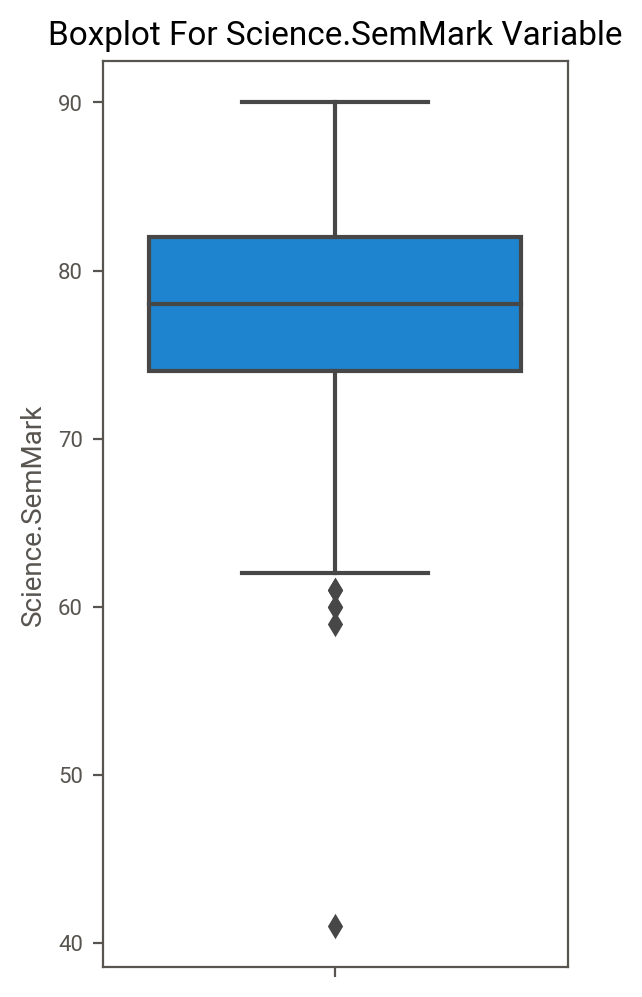

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect performance of Ordinary Least Squares Linear Regression model.

# Make a boxplot for the Science.SemMark variable which is the target.

plt.figure(figsize=(3,6))
sns.boxplot(y=data_academicgroup['Science.SemMark'])

# add title

plt.title('Boxplot For Science.SemMark Variable')

# Note: I can see that there are outliers and one that is extreme.

Text(0.5, 1.0, 'Boxplot For Math.SemMark Variable')

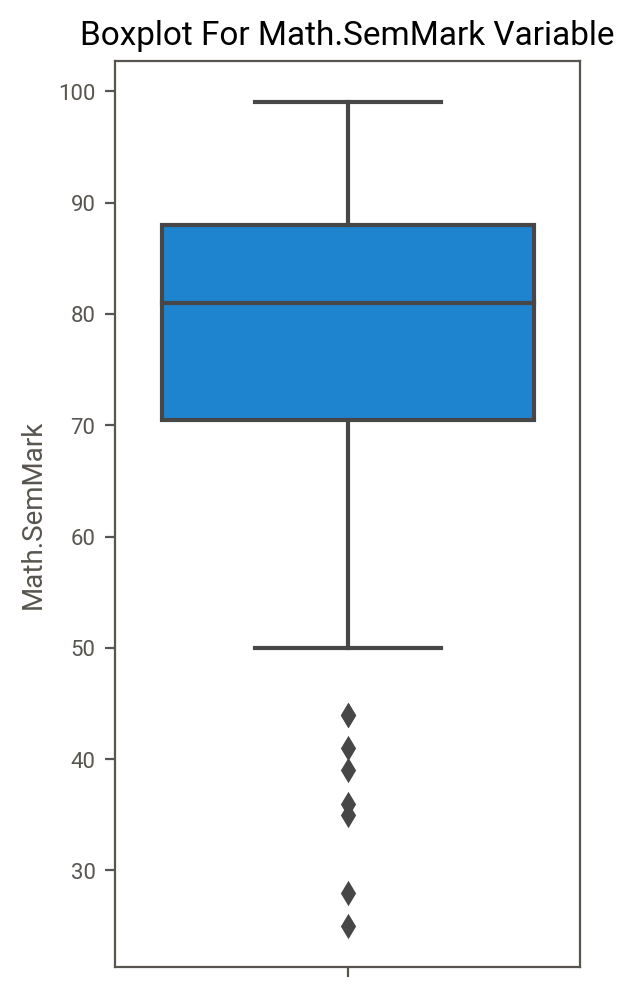

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect performance of Ordinary Least Squares Linear Regression model.

# Make a boxplot for the Math.SemMark variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=data_academicgroup['Math.SemMark'])

# add title

plt.title('Boxplot For Math.SemMark Variable')

# Note: I can see that there are outliers.

Text(0.5, 1.0, 'Boxplot For Comms.SemMark Variable')

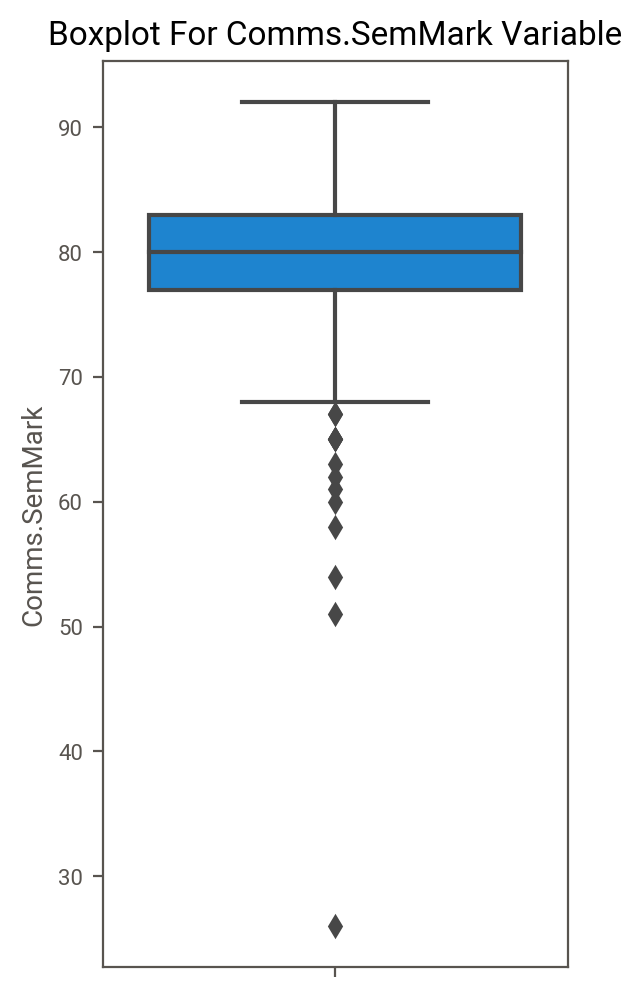

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect performance of Ordinary Least Squares Linear Regression model.

# Make a boxplot for the Comms.SemMark variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=data_academicgroup['Comms.SemMark'])

# add title

plt.title('Boxplot For Comms.SemMark Variable')

# Note: I can see that there are outliers and one that is extreme.

Text(0.5, 1.0, 'Boxplot For Tech.SemMark Variable')

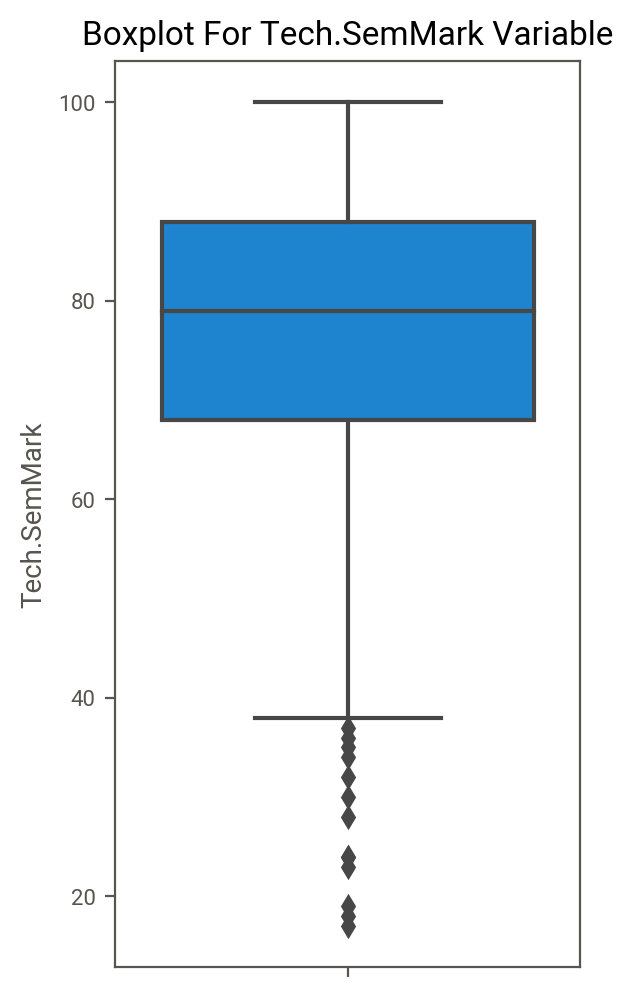

In [ ]:
# Outliers are rare observations that do not add any additional information. 
# Also, these cases may also affect performance of Ordinary Least Squares Linear Regression model.

# Make a boxplot for the Tech.SemMark variable.

plt.figure(figsize=(3,6))
sns.boxplot(y=data_academicgroup['Tech.SemMark'])

# add title

plt.title('Boxplot For Tech.SemMark Variable')

# Note: I can see that there are outliers.

## Performing Winsorization

Winsorization, or winsorizing, is the process of transforming the data by limiting the extreme values which is the outliers, to a certain arbitrary value, closer to the mean of the distribution. 

Winsorizing is different from trimming because the extreme values are not removed, but are instead replaced by other values. Hence these transformed values reduce the variation caused by extreme values without losing any data. A typical strategy involves setting outliers to a specified percentile.

For example, with 90% winsorization, we set all data below the 5th percentile to the value at the 5th percentile and all data above the 95th percentile to the value at the 95th percentile. 

Winsorization is symmetric; therefore, the winsorized mean of a symmetric distribution provides an unbiased representation of the distribution of the variable.

In [ ]:
# Let create capper by setting up a Winsorizer indicating which variables I want to winsorize.

# The Winsorizer() caps maximum and / or minimum values of a variable.

# capping_method : str, default=gaussian
# ‘quantiles’: the limits are given by the percentiles.

# tail : str, default=right
# Whether to cap outliers on the right, left or both tails of the distribution. 
# Can take ‘left’, ‘right’ or ‘both’.

# Further Explaination: 
# With Winsorizer from Feature-engine, we can replace the values by the
# percentiles at the left and right tails or only at one of the tails by setting
# the argument tail to either both, left, or right.

# fold : int or float, default=3
# How far out to to place the capping values. 
# The number that will multiply the std or IQR to calculate the capping values. 
# Recommended values, 2 or 3 for the gaussian approximation, or 1.5 or 3 for 
# the IQR proximity rule.
# If capping_method=’quantile’, then ‘fold’ indicates the percentile. So if fold=0.05, 
# the limits will be the 95th and 5th percentiles. 
# Note: Outliers will be removed up to a maximum of the 20th percentiles on both sides. 
# Thus, when capping_method=’quantile’, then ‘fold’ takes values between 0 and 0.20.

# variables : list, default=None
# The list of variables for which the outliers will be capped. 
# If None, the transformer will find and select all numerical variables.

windsorizer = Winsorizer(capping_method ='quantiles', 
                        tail='both', # cap left, right or both tails
                        fold =0.05,
                        variables=['Math.SemMark', 'Science.SemMark', 'Comms.SemMark', 'Tech.SemMark'])

# Fit windsorizer to the data so that it learns the percentiles

windsorizer.fit(data_academicgroup)

Winsorizer(capping_method='quantiles', fold=0.05, tail='both',
           variables=['Math.SemMark', 'Science.SemMark', 'Comms.SemMark',
                      'Tech.SemMark'])

I can select how far out to cap the maximum or minimum values with the parameter ‘fold’.

If `capping_method ='gaussian'` fold gives the value to multiply the std.

If `capping_method ='skewed'` fold is the value to multiply the IQR.

If `capping_method ='quantile'`, fold is the percentile on each tail that should be censored. For example, if fold=0.05, the limits will be the 5th and 95th percentiles. If fold=0.1, the limits will be the 10th and 90th percentiles.

In [ ]:
# Let winsorize (transform) Math.SemMark, Science.SemMark, Comms.SemMark, Tech.SemMark variables.

data_academicgroup_winsorized = windsorizer.transform(data_academicgroup)

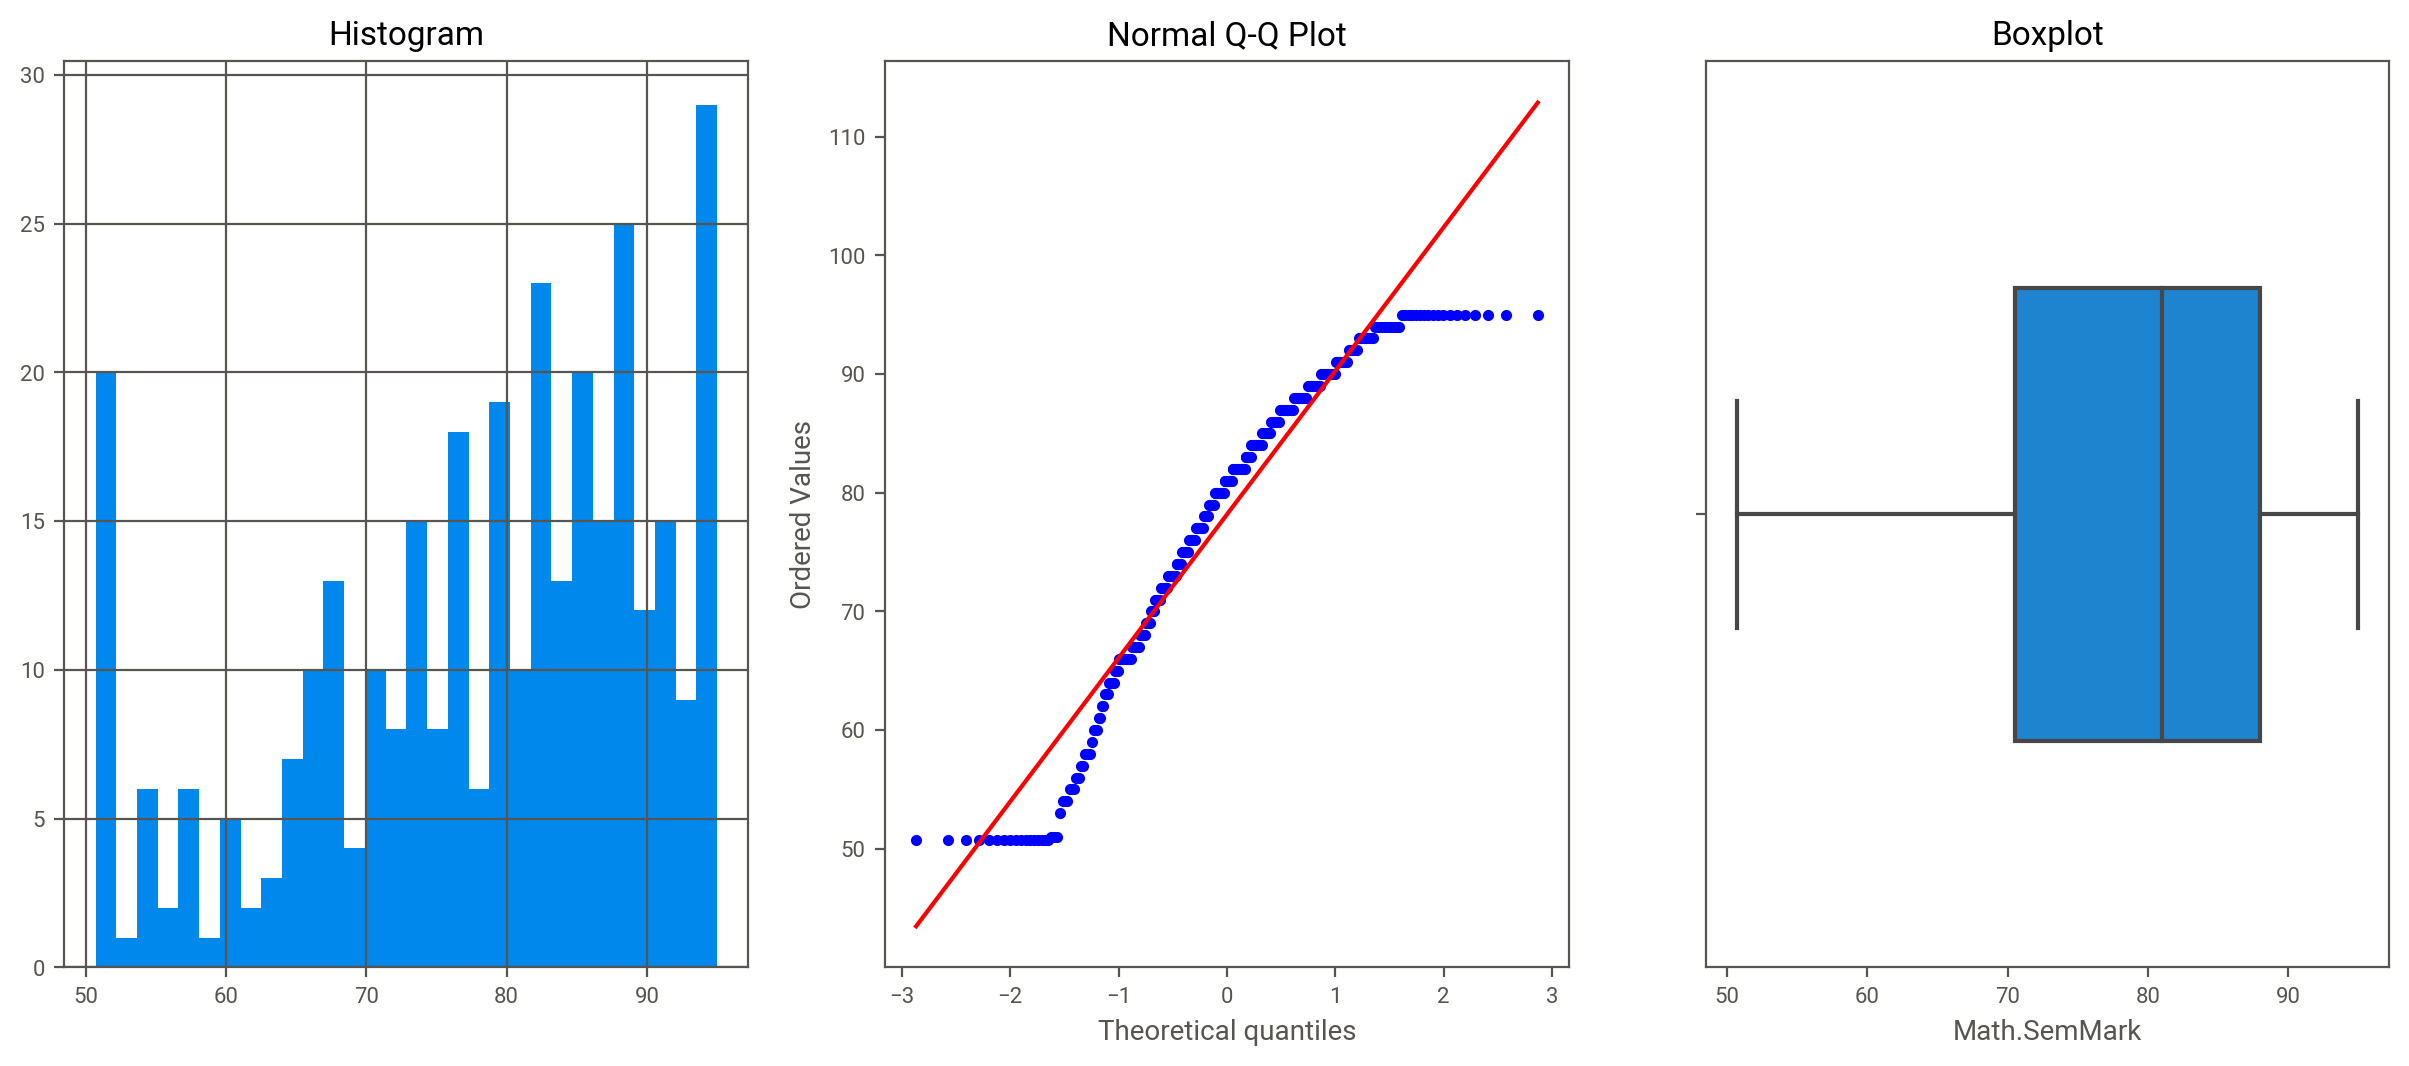

In [ ]:
# Let check the distribution of the Math.SemMark variable after the transformation.

diagnostic_plots(data_academicgroup_winsorized, 'Math.SemMark')

# Note: There is no more outlier.

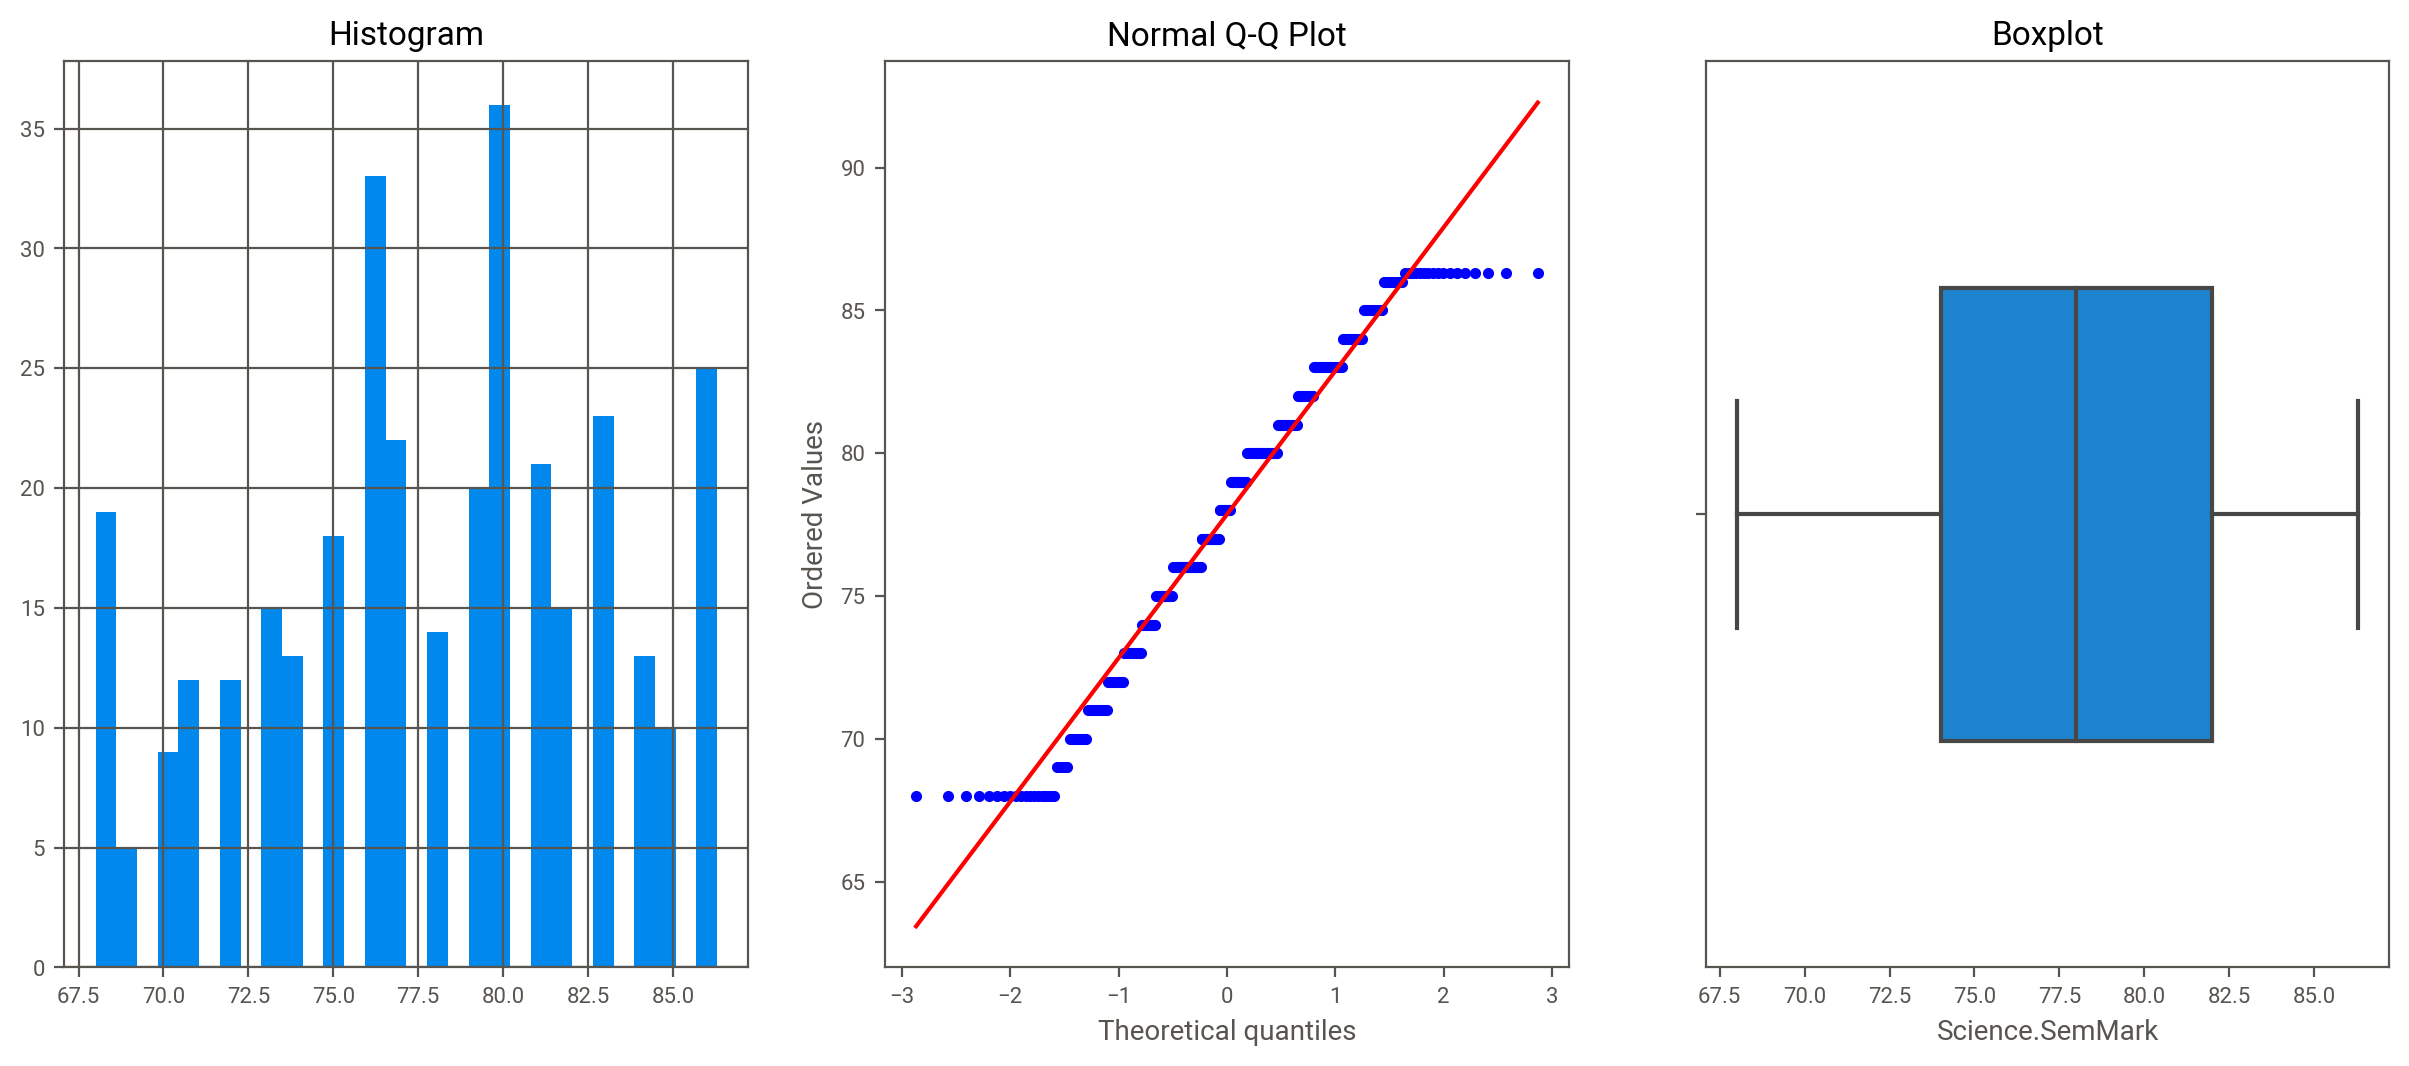

In [ ]:
# Let check the distribution of the Science.SemMark variable (target) after the transformation.

diagnostic_plots(data_academicgroup_winsorized, 'Science.SemMark')

# Note: There is no more outlier.

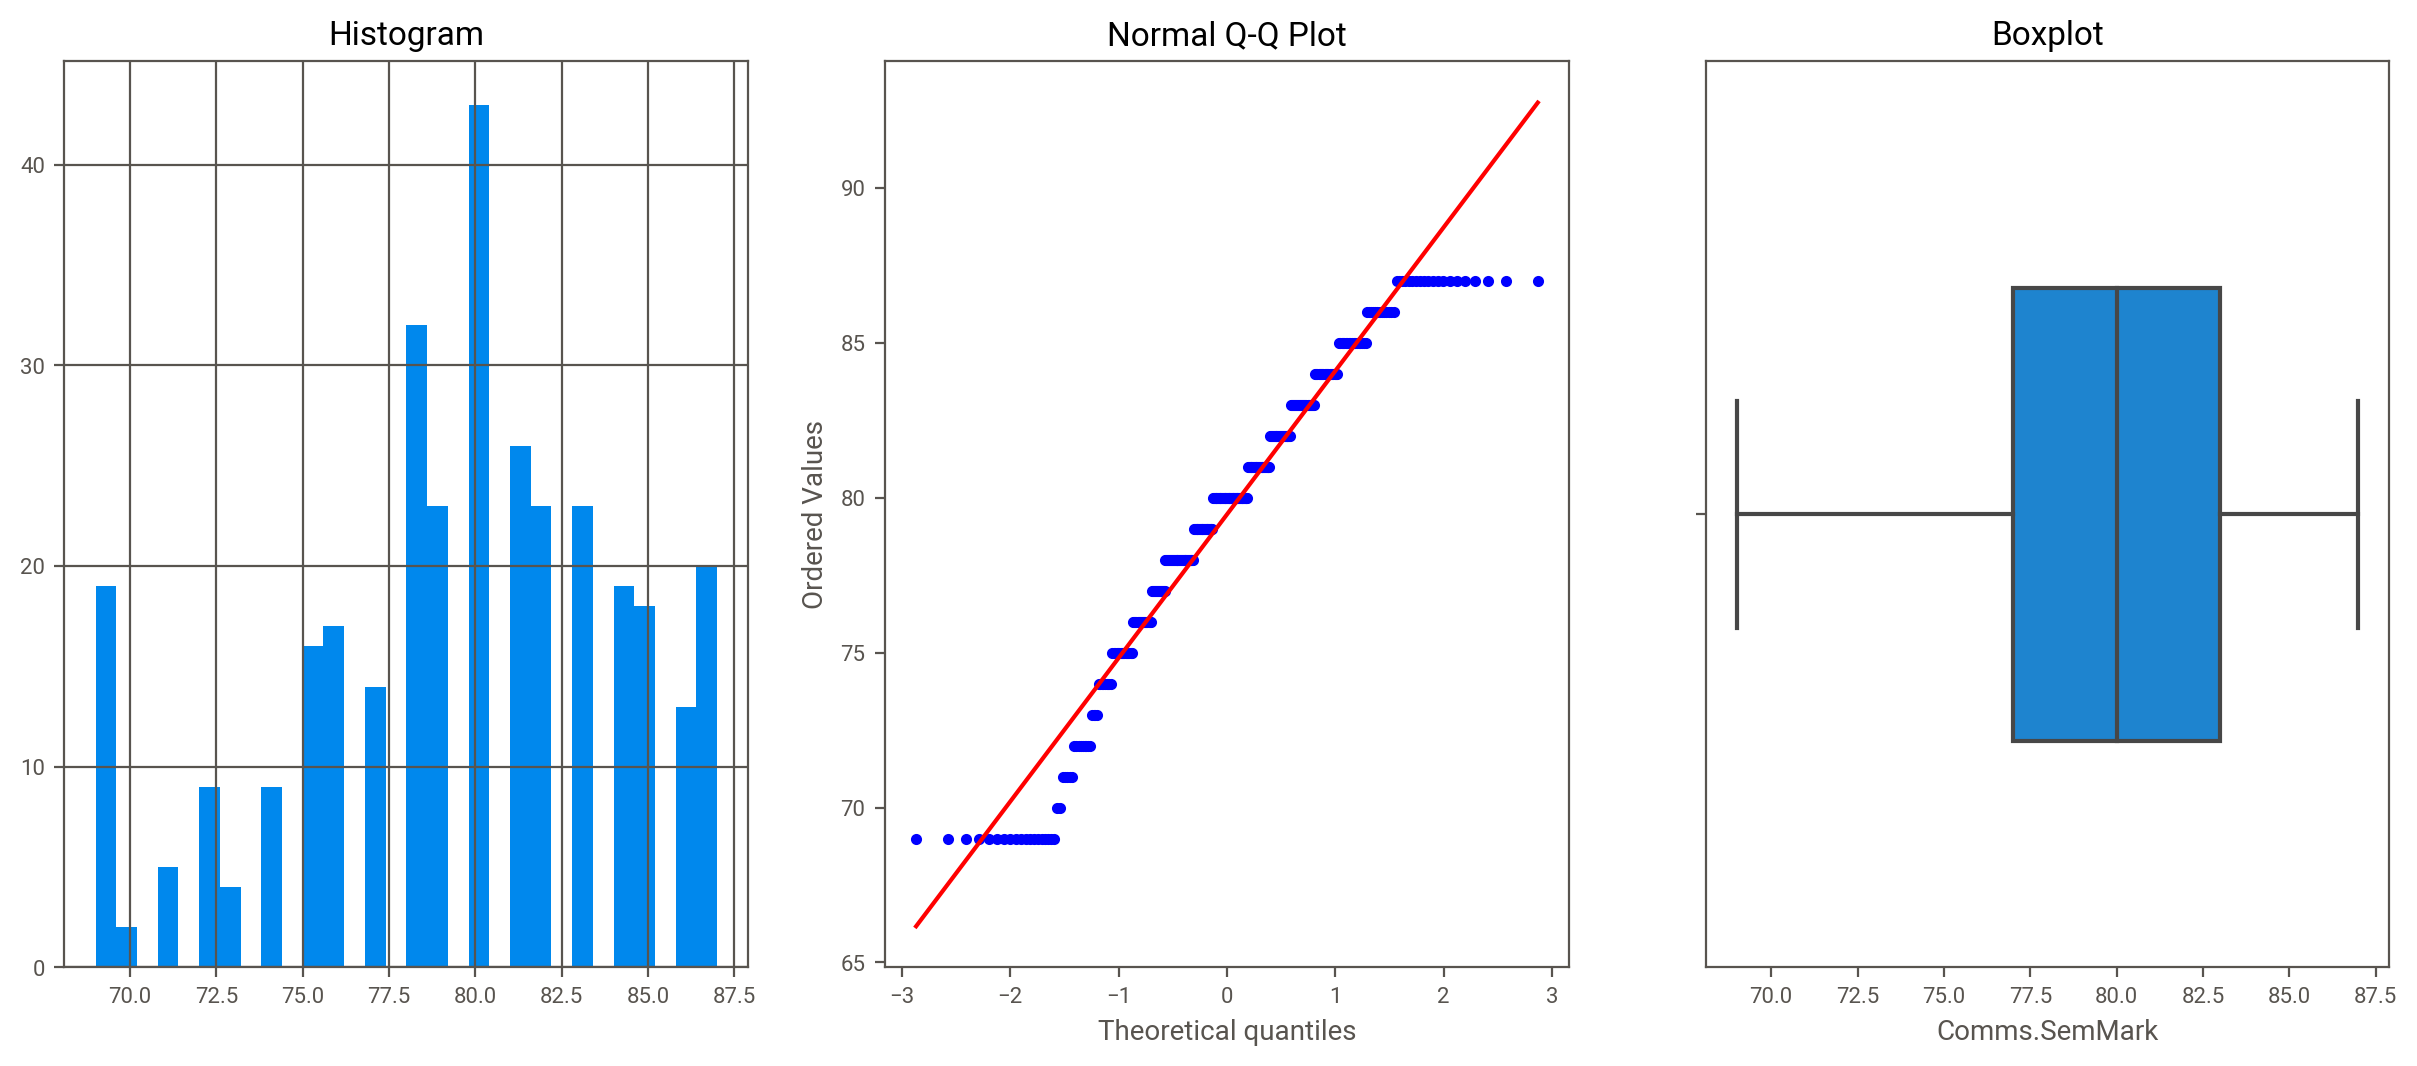

In [ ]:
# Let check the distribution of the Comms.SemMark variable after the transformation.

diagnostic_plots(data_academicgroup_winsorized, 'Comms.SemMark')

# Note: There is no more outlier.

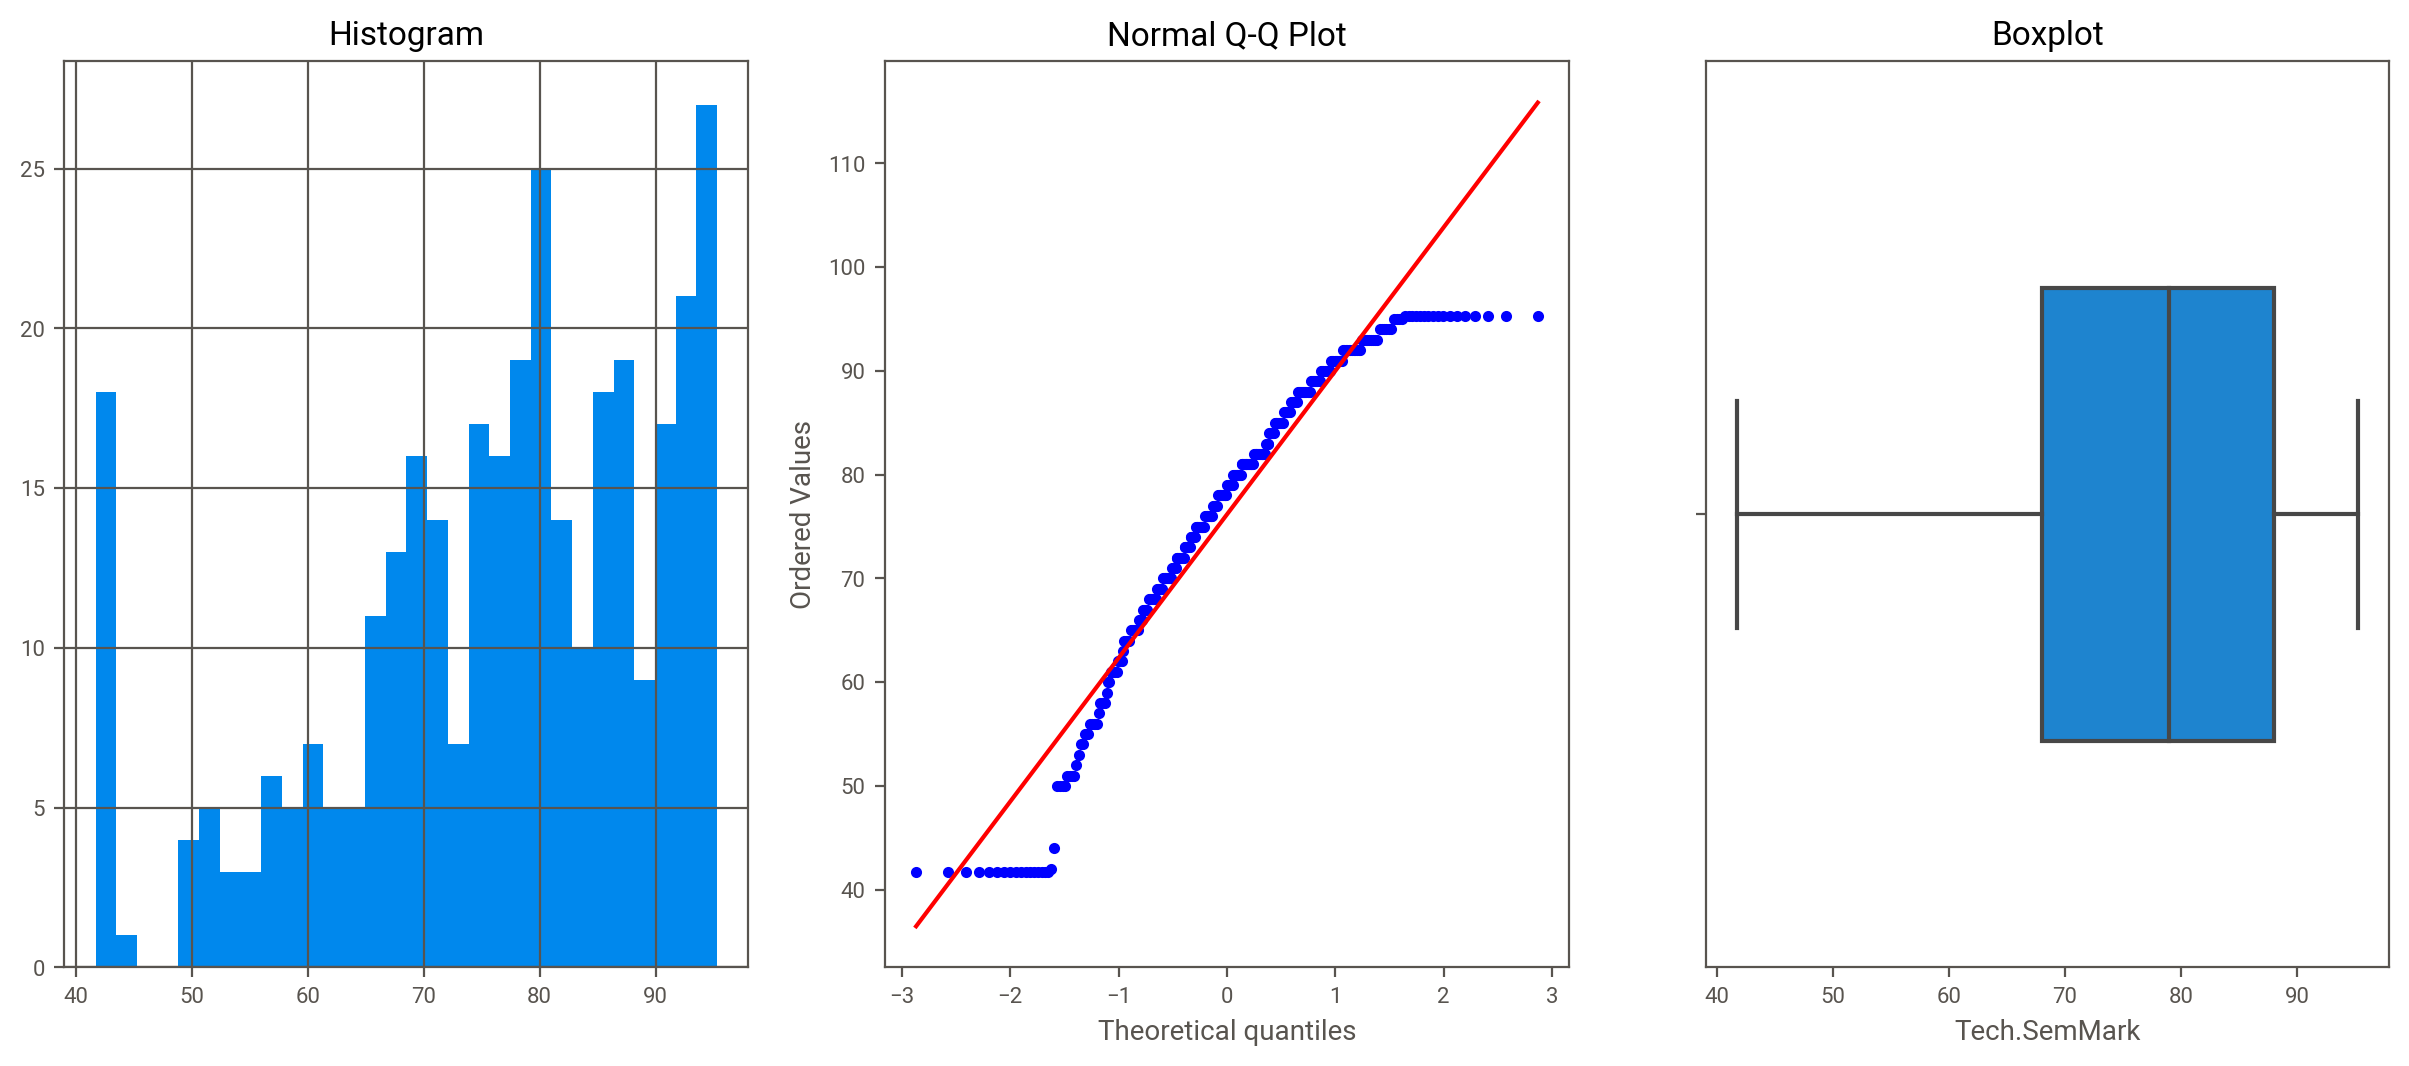

In [ ]:
# Let check the distribution of the Tech.SemMark variable after the transformation.

diagnostic_plots(data_academicgroup_winsorized, 'Tech.SemMark')

# Note: There is no more outlier.

## Trimming Outliers By Finding Maximum & Minimum Boundaries Using Inter-Quartile Range Proximity Rule (IQR)

The inter-quartile range proximity rules can replace the extreme values by values closer to other
values in the variable, by determining the maximum and minimum boundaries with the
mean plus or minus the inter-quartile range proximity rule. 

This procedure is also called bottom and top coding, censoring, or capping. I can cap both
extremes of the distribution or just one of the tails, depending on where I find the outliers
in the variable. 

It is a preferred method to use when the data are skewed. To identify outliers in the dataframe, I have created a function to find the interquartile range proximity rule boundaries. The function takes the dataframe and the variable as arguments and calculates the interquartile range and the maximum and minimum boundaries.

In [ ]:
# Let create a function to find the boundaries of a variable distribution, using the
# inter-quartile range proximity rule (IQR).

def find_boundaries(df, variable, distance):

    # Let calculate the boundaries outside which sit the outliers for skewed distributions:

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate the boundaries.
    
    # pandas.DataFrame.quantile returns values at the given quantile over requested axis.
    # q : float or array-like, default 0.5 (50% quantile)
    # Value between 0 <= q <= 1, the quantile(s) to compute.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [ ]:
# Let determine the limits of the Math.SemMark variable.

math_upper_limit, math_lower_limit = find_boundaries(data_academicgroup, 'Math.SemMark', 1.5) # use 3 to find very extreme

# Let print those limits beyond which I will consider a value an outlier.

math_upper_limit, math_lower_limit

(114.25, 44.25)

In [ ]:
# Let determine the limits of the Science.SemMark which is the target variable.

science_upper_limit, science_lower_limit = find_boundaries(data_academicgroup, 'Science.SemMark', 1.5) # use 3 to find very extreme

# Let print those limits beyond which I will consider a value an outlier.

science_upper_limit, science_lower_limit

(94.0, 62.0)

In [ ]:
# Let determine the limits of the Comms.SemMark variable.

comms_upper_limit, comms_lower_limit = find_boundaries(data_academicgroup, 'Comms.SemMark', 1.5) # use 3 to find very extreme

# Let print those limits beyond which I will consider a value an outlier.

comms_upper_limit, comms_lower_limit

(92.0, 68.0)

In [ ]:
# Let determine the limits of the Tech.SemMark variable.

tech_upper_limit, tech_lower_limit = find_boundaries(data_academicgroup, 'Tech.SemMark', 1.5) # use 3 to find very extreme

# Let print those limits beyond which I will consider a value an outlier.

tech_upper_limit, tech_lower_limit

(118.0, 38.0)

In [ ]:
# Let flag the outliers in the dataset for Math.SemMark variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_math = np.where(data_academicgroup['Math.SemMark'] > math_upper_limit, True,
                    np.where(data_academicgroup['Math.SemMark'] < math_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for Science.SemMark (target) variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_science = np.where(data_academicgroup['Science.SemMark'] > science_upper_limit, True,
                    np.where(data_academicgroup['Science.SemMark'] < science_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for Comms.SemMark variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_comms = np.where(data_academicgroup['Comms.SemMark'] > comms_upper_limit, True,
                    np.where(data_academicgroup['Comms.SemMark'] < comms_lower_limit, True, False))

In [ ]:
# Let flag the outliers in the dataset for Tech.SemMark variable.
# Create a boolean vector to flag observations outside the boundaries.

outliers_tech = np.where(data_academicgroup['Tech.SemMark'] > tech_upper_limit, True,
                    np.where(data_academicgroup['Tech.SemMark'] < tech_lower_limit, True, False))

In [ ]:
# Create a new dataframe with the outlier values and trimm (remove) the dataset of outliers 
# across multiple variables (Math.SemMark, Science.SemMark, Comms.SemMark, Tech.SemMark).

data_trimmed = data_academicgroup.loc[~(outliers_math + outliers_science + outliers_comms + outliers_tech), ]  # ~ NOT outliers

data_academicgroup.shape, data_trimmed.shape 
#  Original dataframe (total rows = 335, total columns = 5)
# Trimmed dataframe (total rows = 306, total columns = 5)

((335, 5), (305, 5))

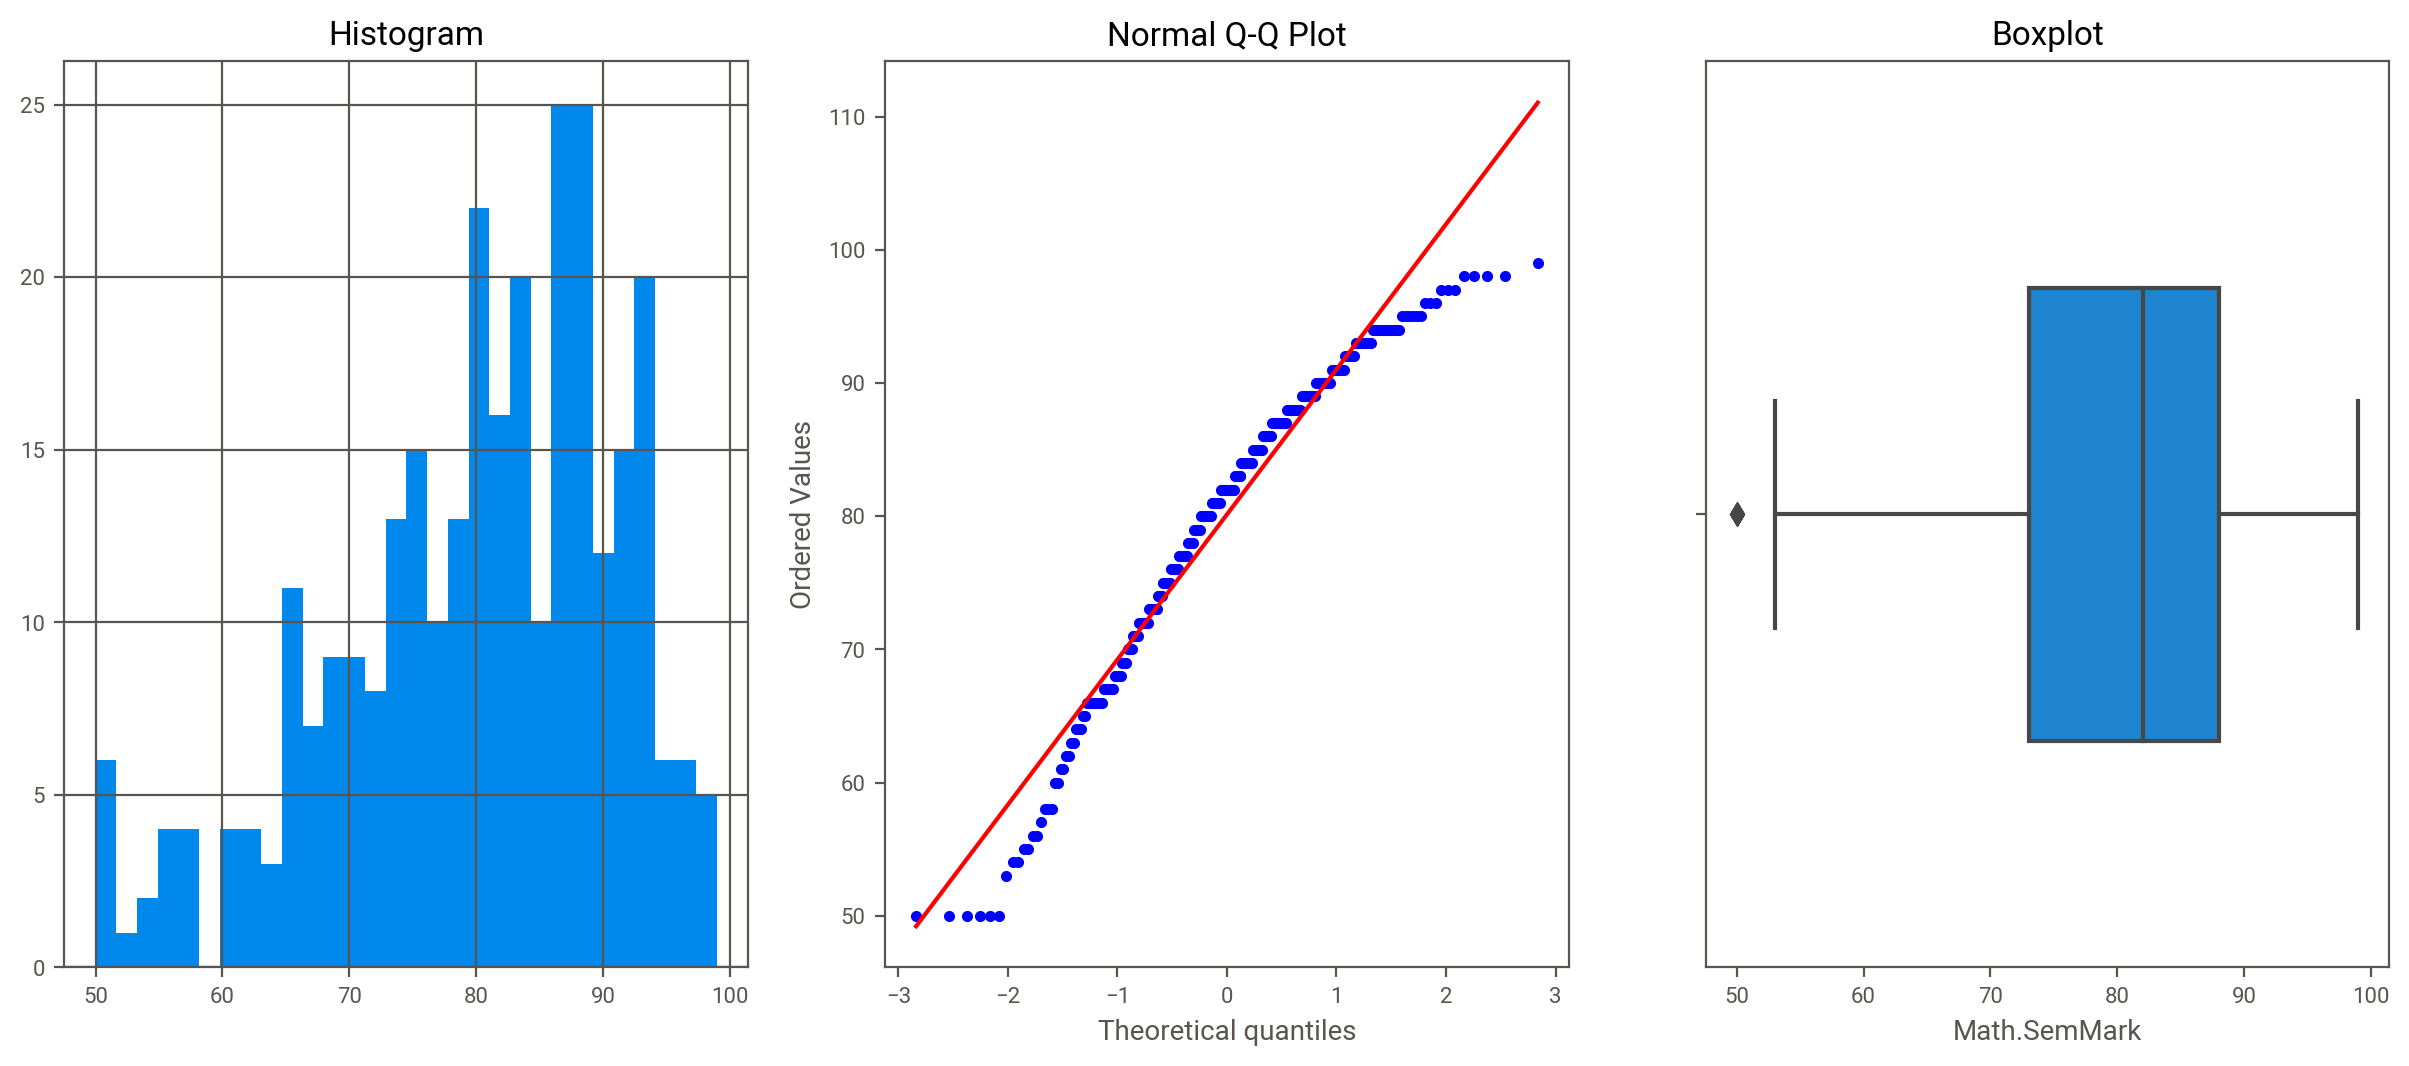

In [ ]:
# Let check the distribution of the Math.SemMark variable after the transformation.

diagnostic_plots(data_trimmed, 'Math.SemMark')

# Note: There is no more outlier.

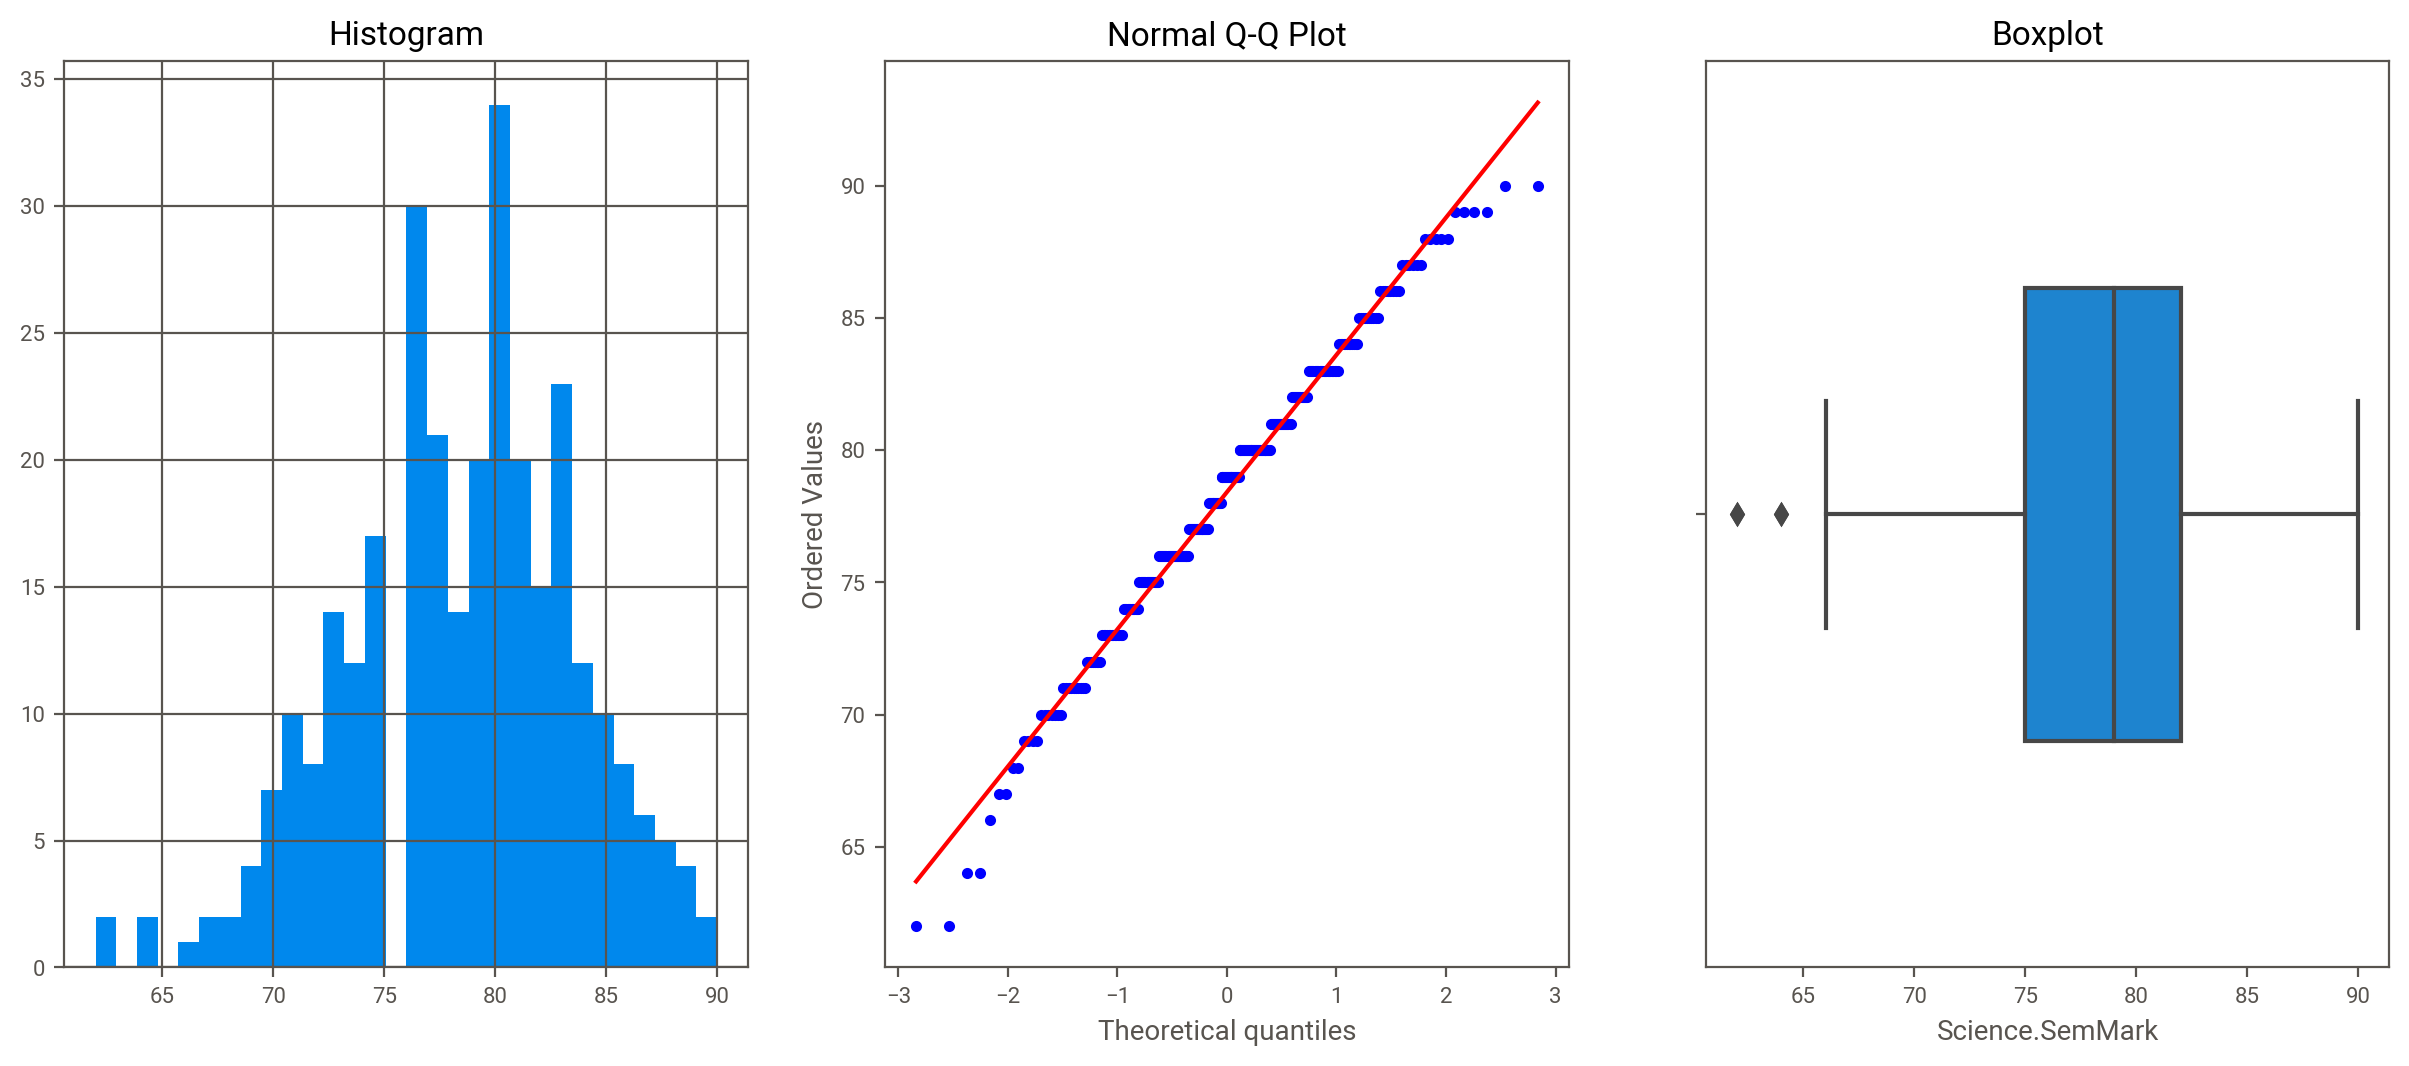

In [ ]:
# Let check the distribution of the Science.SemMark (target) variable after the transformation.

diagnostic_plots(data_trimmed, 'Science.SemMark')

# Note: There are a few outliers.

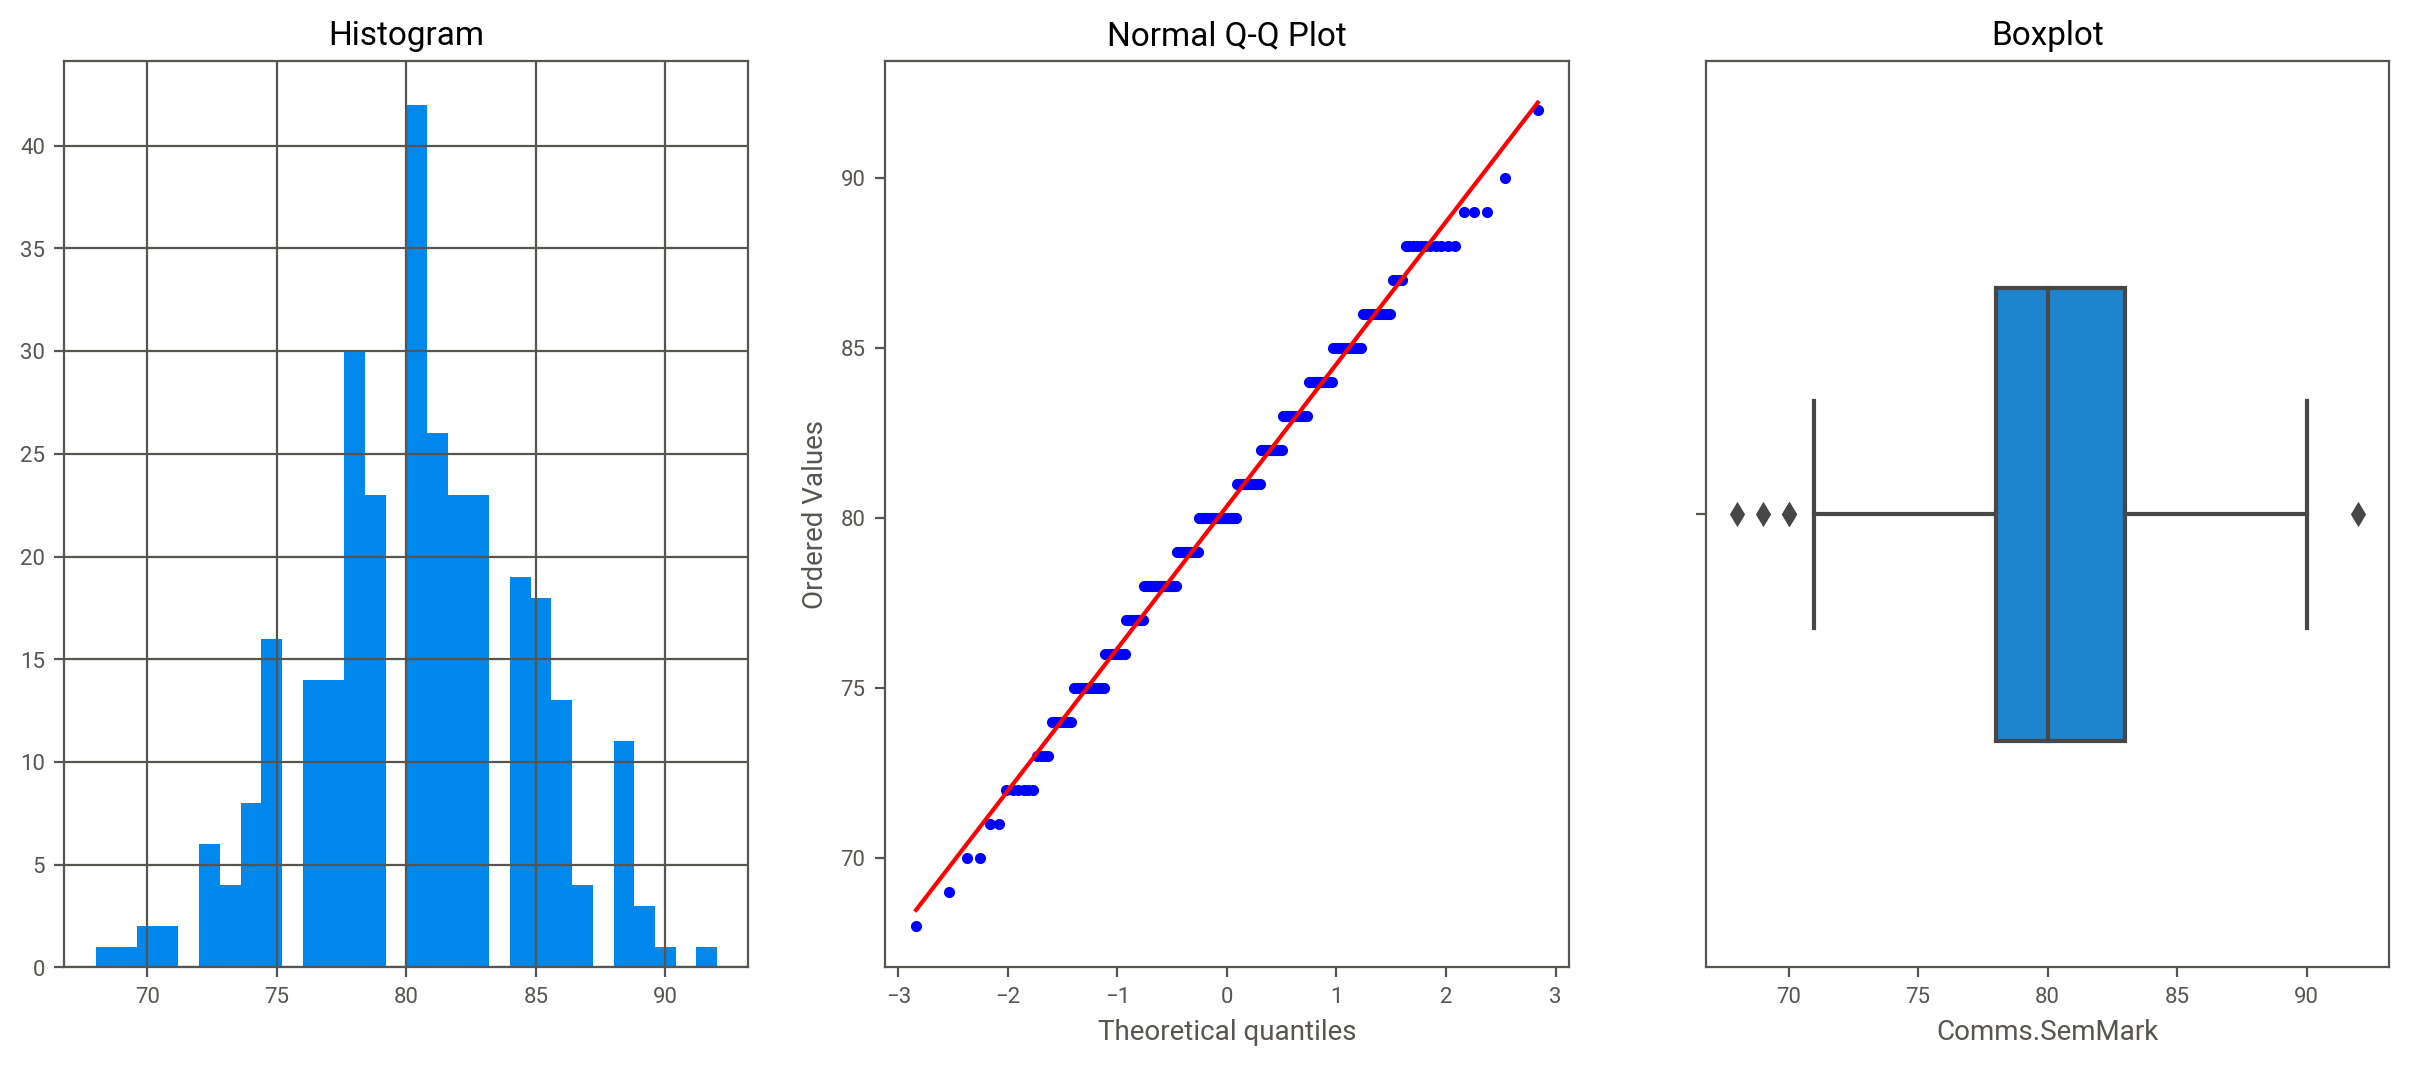

In [ ]:
# Let check the distribution of the Comms.SemMark variable after the transformation.

diagnostic_plots(data_trimmed, 'Comms.SemMark')

# Note: There are a few outliers.

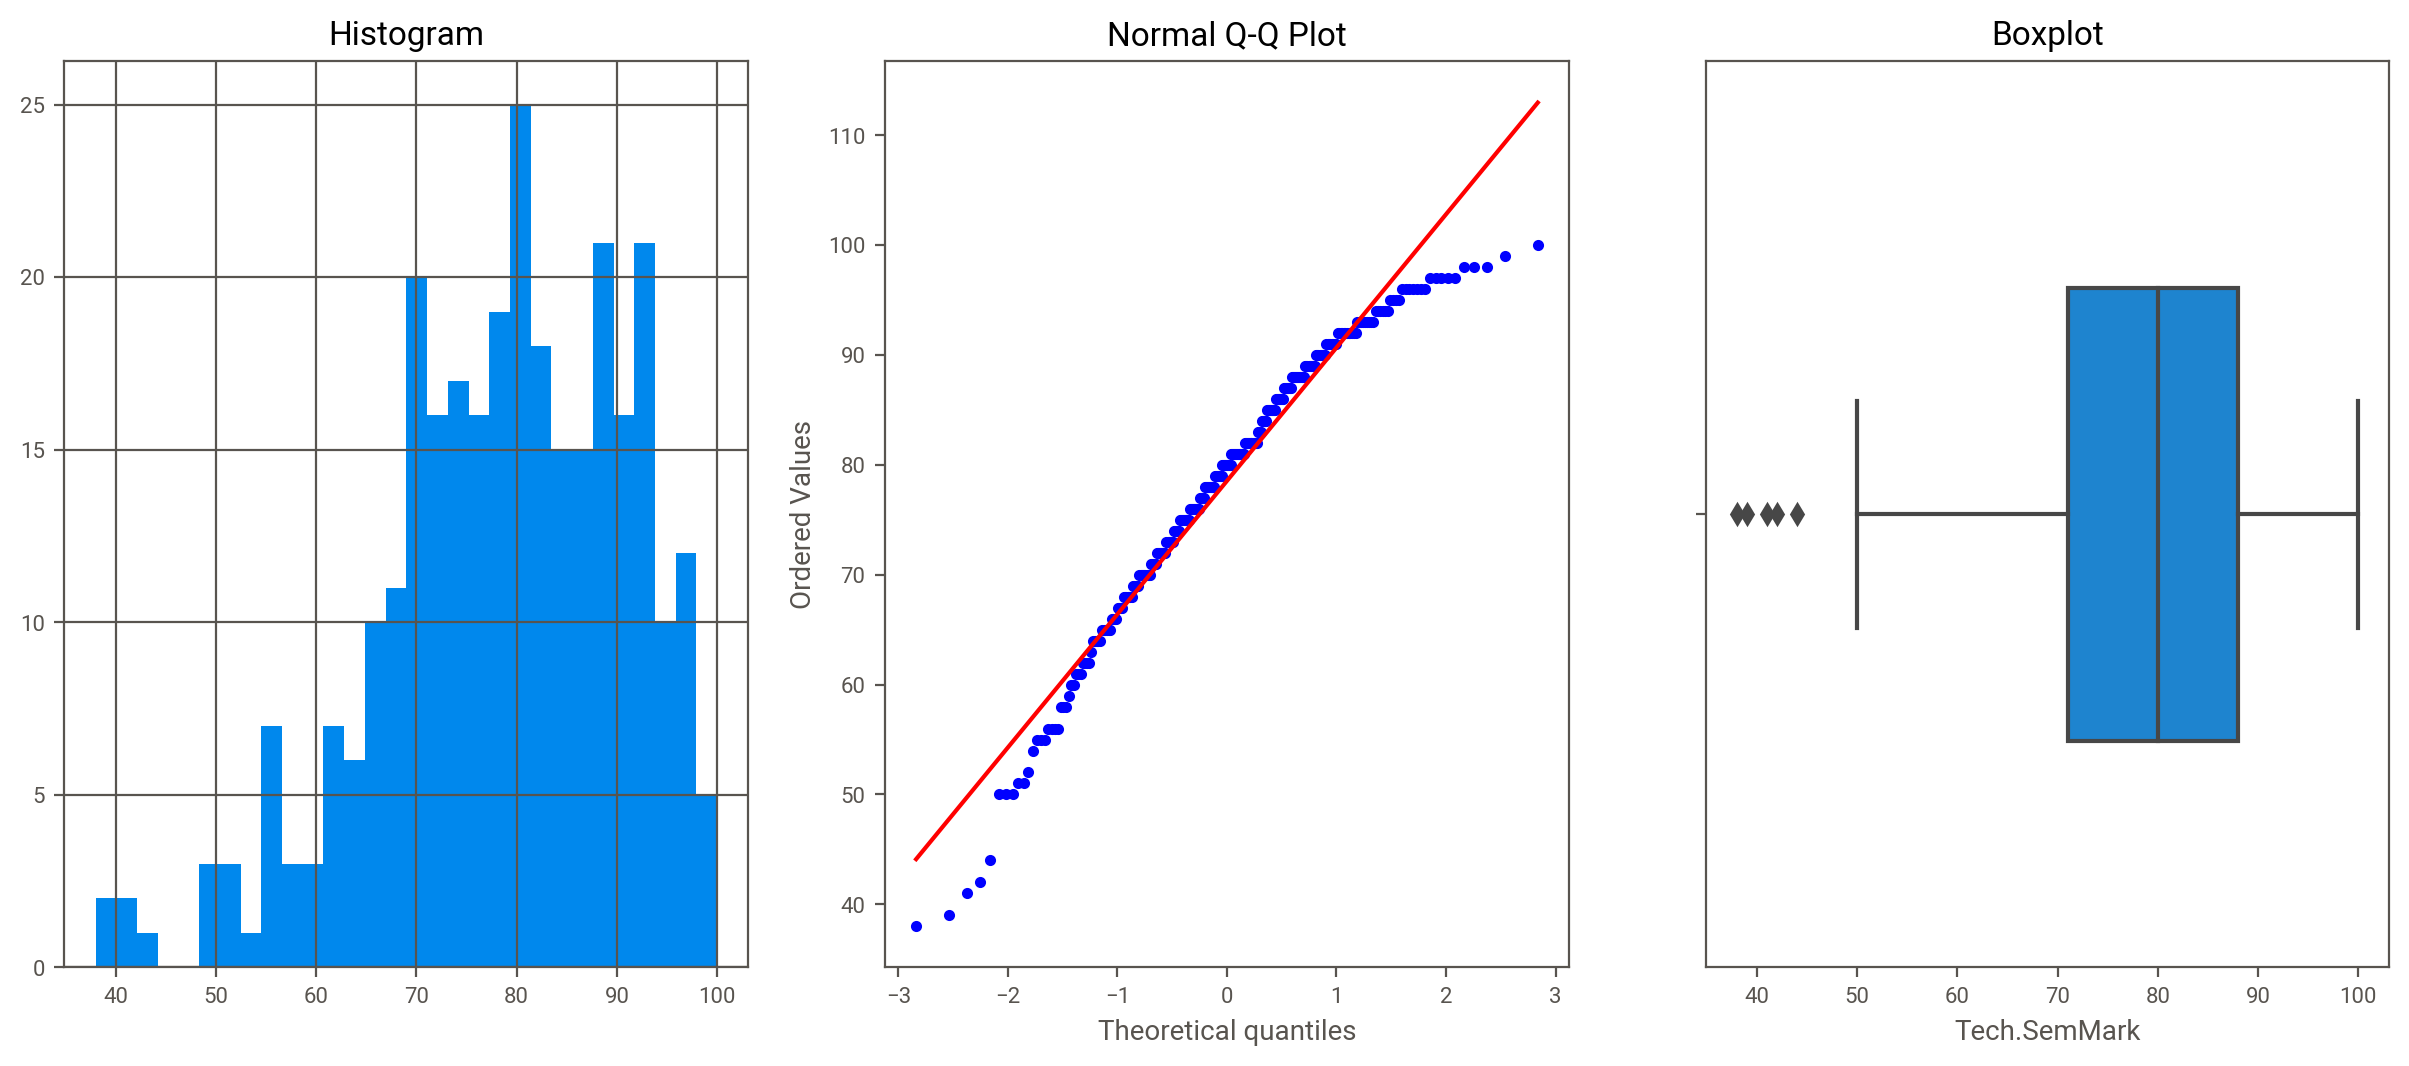

In [ ]:
# Let check the distribution of the Tech.SemMark variable after the transformation.

diagnostic_plots(data_trimmed, 'Tech.SemMark')

# Note: There are a few outliers.

## Perform Ordinary Least Squares Linear Regression Model - With Outliers (No Transformation)

In [ ]:
# Extract all rows, Math.SemMark, Comms.SemMark and Tech.SemMark columns (Independent variables).

# pandas.DataFrame.values returns a Numpy representation of the DataFrame.

X1 = data_academicgroup.loc[:,['ACAD_PROG', 'Math.SemMark', 'Comms.SemMark', 'Tech.SemMark']].values 

# Extract all row, Science.SemMark column (Dependent variable).

y1 = data_academicgroup.loc[:, ['Science.SemMark']].values 
# Sanity check 

print('X1', X1) # 2D array of independent variable
print('y1', y1) # 2D array of dependent variable

X1 [['Dip_Social' 93 78.0 93.0]
 ['Dip_Social' 82 80.0 89.0]
 ['Dip_Social' 80 80.0 89.0]
 ...
 ['Dip_Media' 67 77.0 76.0]
 ['Dip_Media' 55 75.0 64.0]
 ['Dip_Media' 76 78.0 73.0]]
y1 [[79.]
 [79.]
 [86.]
 [87.]
 [81.]
 [79.]
 [87.]
 [84.]
 [76.]
 [85.]
 [88.]
 [88.]
 [87.]
 [77.]
 [81.]
 [82.]
 [89.]
 [79.]
 [81.]
 [85.]
 [85.]
 [80.]
 [78.]
 [81.]
 [73.]
 [84.]
 [82.]
 [60.]
 [82.]
 [86.]
 [78.]
 [81.]
 [84.]
 [72.]
 [81.]
 [75.]
 [83.]
 [79.]
 [72.]
 [68.]
 [70.]
 [83.]
 [85.]
 [77.]
 [84.]
 [83.]
 [83.]
 [84.]
 [62.]
 [85.]
 [80.]
 [77.]
 [77.]
 [76.]
 [80.]
 [83.]
 [67.]
 [75.]
 [72.]
 [69.]
 [75.]
 [80.]
 [73.]
 [74.]
 [71.]
 [76.]
 [73.]
 [71.]
 [82.]
 [72.]
 [75.]
 [83.]
 [76.]
 [62.]
 [71.]
 [41.]
 [80.]
 [75.]
 [76.]
 [75.]
 [72.]
 [80.]
 [60.]
 [70.]
 [74.]
 [75.]
 [76.]
 [72.]
 [71.]
 [66.]
 [80.]
 [70.]
 [70.]
 [75.]
 [73.]
 [76.]
 [71.]
 [76.]
 [75.]
 [86.]
 [74.]
 [90.]
 [78.]
 [86.]
 [86.]
 [88.]
 [82.]
 [83.]
 [88.]
 [85.]
 [84.]
 [80.]
 [81.]
 [84.]
 [83.]
 [83.]
 [77.

## Encode Categorical Data

In [ ]:
# sklearn.compose.ColumnTransformer applies transformers to columns of an array or pandas DataFrame.

# remainder{‘drop’, ‘passthrough’} or estimator, default=’drop’
#  By specifying remainder='passthrough', all remaining columns that were 
# not specified in transformers will be automatically passed through.

# sklearn.preprocessing.OneHotEncoder encodes categorical features as a one-hot numeric array.

# categories‘auto’ or a list of array-like, default=’auto’
# Categories (unique values) per feature:
# ‘auto’ : Determine categories automatically from the training data.
# list : categories[i] holds the categories expected in the ith column. 
# The passed categories should not mix strings and numeric values within a single feature, 
# and should be sorted in case of numeric values.

# [0]index starts from first column 
# encode column 1 (passed in as index 0 refer to ['Math.SemMark', 'Comms.SemMark', 'Tech.SemMark'])
# as we expect different modules to have different scores.

ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

# numpy.array creates an array.

X1_ecode = np.array(ct1.fit_transform(X1)) # Fit all transformers using X (independent variables)

# Print the transformed (OneHotEncoder) X independent variables.

print(X1_ecode)

[[0.0 0.0 0.0 ... 93 78.0 93.0]
 [0.0 0.0 0.0 ... 82 80.0 89.0]
 [0.0 0.0 0.0 ... 80 80.0 89.0]
 ...
 [0.0 1.0 0.0 ... 67 77.0 76.0]
 [0.0 1.0 0.0 ... 55 75.0 64.0]
 [0.0 1.0 0.0 ... 76 78.0 73.0]]


## Split The Dataset Into Train And Test Set
<br>
For completeness this is how I could set aside some data to test the robustness of the model on unseen data.


In [ ]:
# Separate the data into training (80%) and testing sets (20%)
# Target variable is y1 (Dependent variable)

# Note: X1_ecode one-hot encoded input, y1 predicted output

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_ecode, y1, test_size = 0.2, 
                                                        random_state = 0)
# X1_ecode ---> X1_train, X1_test:
# X1_train = 80% of independent variables use to train the model.
# X1_test = 20% of independent variables use to make prediction to test model's accuracy.

# y1---> y1_train, y1_test:
# y1_train = Dependent variable to be predicted by the model (Which is category lobels against independent variables).
# y1_test = Category labels for test data to test accuracy between actual & predicted categories.

# Let inspect the number of rows and columns.

X1_train.shape, X1_test.shape # (total rows = 335 , total columns = 8)

((268, 8), (67, 8))

In [ ]:
# sklearn.linear_model.LinearRegression is the Ordinary Least Squares Linear Regression.

lm1 = LinearRegression()

# Let fit linear model.

lm1.fit(X1_train, y1_train)

LinearRegression()

## Predicting The Test Set Results

In [ ]:
# Predict using the Ordinary Least Squares Linear Regression model.

y1_pred = lm1.predict(X1_test) # using test set (X1_test)

# numpy.set_printoptions (Set printing options) which determines 
# the way floating point numbers, arrays and other NumPy objects are displayed.

# precision: int or None, optional
# Number of digits of precision for floating point output (default 8).

np.set_printoptions(precision=2) # precision displays to 2 floating point output.

# numpy.concatenate joins a sequence of arrays along an existing axis:
# concantenate vertically. y_pred is horizontal. 

# numpy.reshape gives a new shape to an array without changing its data: 
# Use reshape to turn it from horizontal to vertical of len(y) as row number
# and 1 column. Concantenate by axis = 1 (column bind), 0 (row bind)

print(np.concatenate((y1_pred.reshape(len(y1_pred),1), 
                      y1_test.reshape(len(y1_test),1)),axis = 1))

# Importance: Predicted (y1_pred) X1_test set results against (compared to) y1_test (side-by-side)
# which is category labels for test data to test accuracy between actual and predicted categories. 

[[82.48 84.  ]
 [80.34 76.  ]
 [79.21 82.  ]
 [80.06 73.  ]
 [78.03 73.  ]
 [78.46 81.  ]
 [74.5  76.  ]
 [82.13 75.  ]
 [77.86 71.  ]
 [81.67 89.  ]
 [83.85 86.  ]
 [73.17 83.  ]
 [77.3  79.  ]
 [75.21 77.  ]
 [78.59 71.  ]
 [79.44 80.  ]
 [81.01 82.  ]
 [82.76 76.  ]
 [78.64 80.  ]
 [79.49 85.  ]
 [84.35 80.  ]
 [78.69 82.  ]
 [76.28 76.  ]
 [74.63 79.  ]
 [77.27 78.  ]
 [84.34 87.  ]
 [68.73 80.  ]
 [81.   80.  ]
 [80.75 82.  ]
 [78.06 80.  ]
 [80.24 82.  ]
 [80.42 90.  ]
 [78.16 80.  ]
 [81.49 80.  ]
 [79.08 78.  ]
 [76.13 76.  ]
 [77.99 69.  ]
 [80.82 74.  ]
 [77.85 79.  ]
 [81.77 82.  ]
 [79.86 81.  ]
 [79.52 78.  ]
 [79.23 83.  ]
 [82.15 83.  ]
 [79.46 80.  ]
 [82.25 80.  ]
 [83.   75.  ]
 [72.2  76.  ]
 [79.74 83.  ]
 [71.58 84.  ]
 [75.79 87.  ]
 [75.46 73.  ]
 [78.94 78.  ]
 [78.31 78.  ]
 [79.49 84.  ]
 [66.96 67.  ]
 [80.8  76.  ]
 [74.99 80.  ]
 [81.37 74.  ]
 [71.07 74.  ]
 [76.51 76.  ]
 [78.99 83.  ]
 [80.07 77.  ]
 [77.88 77.  ]
 [81.43 87.  ]
 [82.34 82.  ]
 [76.27 79

## Check The Coefficients And $R^2$ Value

In [ ]:
# Let check the coefficients.

# beta 0 or intercept (b0 : Constant) value.

print('Intercept/Constant')
print(lm1.intercept_)
print()

# beta 1 to beta 8 or slope1 to slope8 (b1 to b8 : grandients/coefficient).
# All the coefficients of the independent variables for the following:
# Dip_Social, Dip_Security, Dip_Banking, Dip_Technology, Dip_Media, Math.SemMark, 
# Comms.SemMark, Tech.SemMark.

print('All the coefficients of the independent variables: ')
print('Dip_Social, Dip_Security, Dip_Banking, Dip_Technology, Dip_Media, Math.SemMark, Comms.SemMark, Tech.SemMark')
print(lm1.coef_)
print()

# Let check the R-squared value of the model.

print('R-squared')
print(lm1.score(X1_train, y1_train)) # train set 

Intercept/Constant
[43.4]

All the coefficients of the independent variables: 
Dip_Social, Dip_Security, Dip_Banking, Dip_Technology, Dip_Media, Math.SemMark, Comms.SemMark, Tech.SemMark
[[ 0.52 -2.08  0.44 -0.02  1.14  0.07  0.25  0.11]]

R-squared
0.40520470002582154


## Equation of Model
<br>

Therefore, the equation of the linear regression model is:

Note: The constant and all the coefficients of the independent variables changes after restarting the Kernel. Therefore, the inputs of the equation of the linear regression model will change (slightly different from what I stated). I get different results when running the same algorithm with the same data due to the evaluation procedure in the train-test split. A train-test split involves randomly assigning rows to either be used to train the model or evaluate the model to meet a predefined train or test set size. Also, stochastic machine learning algorithms use randomness during learning, ensuring a different model is trained each run. Lastly, differences in the development environment, such as software versions and CPU type, can cause rounding error differences in predictions and model evaluations.


$$\textrm{Science mark} = 43.4 + 0.52 \times \textrm{Dip_Social} -2.08  \times \textrm{Dip_Security} + 0.44 \times \textrm{ Dip_Banking} - 0.02 \times \textrm{Dip_Technology} + 1.14 \times \textrm{Dip_Media} + 0.07 \times \textrm{Math.SemMark} + 0.25 \times \textrm{Comms.SemMark} + 0.11 \times \textrm{Tech.SemMark}$$

The $R^2$ value for this data is 0.40, which means 40% of the marks variability is explained by Math.SemMark, Comms.SemMark, Tech.SemMark and the ACAD_PROG.

## Regression Error Metrics For Model Evaluation

In [ ]:
# Let perform the Regression Error Metrics to assess the model's accuracy.

# R-squared (Coefficient of determination) represents the coefficient of how well the values 
# The higher the value, the better the model is.
print("R-squared: ", r2_score(y1_test, y1_pred))

# MSE (Mean Squared Error) represents the difference between the original and predicted values 
# extracted by squared the average difference over the data set.
# The lower the value, the better the model is.
print("MSE: ",(mean_squared_error(y1_test, y1_pred)))

# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
# The lower the value, the better the model is.
print("RMSE: ",np.sqrt(mean_squared_error(y1_test, y1_pred)))

# MAE (Mean absolute error) represents the difference between the original and predicted values 
# extracted by averaged the absolute difference over the data set.
# The lower the value, the better the model is.
print("MAE: ", mean_absolute_error(y1_test, y1_pred))

# IMPORTANCE: Interpreting MAE result is more meaningful than RMSE!

R-squared:  -0.08389010411774156
MSE:  22.77207473814935
RMSE:  4.772009507340629
MAE:  3.6243179663426752


## Perform Ordinary Least Squares Linear Regression Model - Without Outliers (After The Winsorization Transformation)

In [ ]:
# Extract all rows, Math.SemMark, Comms.SemMark and Tech.SemMark columns (Independent variables).

# pandas.DataFrame.values returns a Numpy representation of the DataFrame.

X2 = data_academicgroup_winsorized.loc[:,['ACAD_PROG', 'Math.SemMark', 'Comms.SemMark', 'Tech.SemMark']].values 

# Extract all row, Science.SemMark column (Dependent variable).

y2 = data_academicgroup_winsorized.loc[:, ['Science.SemMark']].values 
# Sanity check 

print('X2', X2) # 2D array of independent variable
print('y2', y2) # 2D array of dependent variable

X2 [['Dip_Social' 93.0 78.0 93.0]
 ['Dip_Social' 82.0 80.0 89.0]
 ['Dip_Social' 80.0 80.0 89.0]
 ...
 ['Dip_Media' 67.0 77.0 76.0]
 ['Dip_Media' 55.0 75.0 64.0]
 ['Dip_Media' 76.0 78.0 73.0]]
y2 [[79. ]
 [79. ]
 [86. ]
 [86.3]
 [81. ]
 [79. ]
 [86.3]
 [84. ]
 [76. ]
 [85. ]
 [86.3]
 [86.3]
 [86.3]
 [77. ]
 [81. ]
 [82. ]
 [86.3]
 [79. ]
 [81. ]
 [85. ]
 [85. ]
 [80. ]
 [78. ]
 [81. ]
 [73. ]
 [84. ]
 [82. ]
 [68. ]
 [82. ]
 [86. ]
 [78. ]
 [81. ]
 [84. ]
 [72. ]
 [81. ]
 [75. ]
 [83. ]
 [79. ]
 [72. ]
 [68. ]
 [70. ]
 [83. ]
 [85. ]
 [77. ]
 [84. ]
 [83. ]
 [83. ]
 [84. ]
 [68. ]
 [85. ]
 [80. ]
 [77. ]
 [77. ]
 [76. ]
 [80. ]
 [83. ]
 [68. ]
 [75. ]
 [72. ]
 [69. ]
 [75. ]
 [80. ]
 [73. ]
 [74. ]
 [71. ]
 [76. ]
 [73. ]
 [71. ]
 [82. ]
 [72. ]
 [75. ]
 [83. ]
 [76. ]
 [68. ]
 [71. ]
 [68. ]
 [80. ]
 [75. ]
 [76. ]
 [75. ]
 [72. ]
 [80. ]
 [68. ]
 [70. ]
 [74. ]
 [75. ]
 [76. ]
 [72. ]
 [71. ]
 [68. ]
 [80. ]
 [70. ]
 [70. ]
 [75. ]
 [73. ]
 [76. ]
 [71. ]
 [76. ]
 [75. ]
 [86. ]
 [74.

## Encode Categorical Data

In [ ]:
# sklearn.compose.ColumnTransformer applies transformers to columns of an array or pandas DataFrame.

# remainder{‘drop’, ‘passthrough’} or estimator, default=’drop’
#  By specifying remainder='passthrough', all remaining columns that were 
# not specified in transformers will be automatically passed through.

# sklearn.preprocessing.OneHotEncoder encodes categorical features as a one-hot numeric array.

# categories‘auto’ or a list of array-like, default=’auto’
# Categories (unique values) per feature:
# ‘auto’ : Determine categories automatically from the training data.
# list : categories[i] holds the categories expected in the ith column. 
# The passed categories should not mix strings and numeric values within a single feature, 
# and should be sorted in case of numeric values.

# [0]index starts from first column 
# encode column 1 (passed in as index 0 refer to ['Math.SemMark', 'Comms.SemMark', 'Tech.SemMark'])
# as we expect different modules to have different scores.

ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

# numpy.array creates an array.

X2_ecode = np.array(ct2.fit_transform(X2)) # Fit all transformers using X (independent variables)

# Print the transformed (OneHotEncoder) X independent variables.

print(X2_ecode)

[[0.0 0.0 0.0 ... 93.0 78.0 93.0]
 [0.0 0.0 0.0 ... 82.0 80.0 89.0]
 [0.0 0.0 0.0 ... 80.0 80.0 89.0]
 ...
 [0.0 1.0 0.0 ... 67.0 77.0 76.0]
 [0.0 1.0 0.0 ... 55.0 75.0 64.0]
 [0.0 1.0 0.0 ... 76.0 78.0 73.0]]


## Split The Dataset Into Train And Test Set
<br>
For completeness this is how I could set aside some data to test the robustness of the model on unseen data.

In [ ]:
# Separate the data into training (80%) and testing sets (20%)
# Target variable is y2 (Dependent variable)

# Note: X2_ecode one-hot encoded input, y2 predicted output

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_ecode, y2, test_size = 0.2, 
                                                        random_state = 0)
# X2_ecode ---> X2_train, X2_test:
# X2_train = 80% of independent variables use to train the model.
# X2_test = 20% of independent variables use to make prediction to test model's accuracy.

# y2---> y2_train, y2_test:
# y2_train = Dependent variable to be predicted by the model (Which is category lobels against independent variables).
# y2_test = Category labels for test data to test accuracy between actual & predicted categories.

# Let inspect the number of rows and columns.

X2_train.shape, X2_test.shape # (total rows = 335 , total columns = 8)

((268, 8), (67, 8))

In [ ]:
# sklearn.linear_model.LinearRegression is the Ordinary Least Squares Linear Regression.

lm2 = LinearRegression()

# Let fit linear model.

lm2.fit(X2_train, y2_train)

LinearRegression()

## Predicting The Test Set Results

In [ ]:
# Predict using the Ordinary Least Squares Linear Regression model.

y2_pred = lm2.predict(X2_test) # using test set (X2_test)

# numpy.set_printoptions (Set printing options) which determines 
# the way floating point numbers, arrays and other NumPy objects are displayed.

# precision: int or None, optional
# Number of digits of precision for floating point output (default 8).

np.set_printoptions(precision=2) # precision displays to 2 floating point output.

# numpy.concatenate joins a sequence of arrays along an existing axis:
# concantenate vertically. y_pred is horizontal. 

# numpy.reshape gives a new shape to an array without changing its data: 
# Use reshape to turn it from horizontal to vertical of len(y) as row number
# and 1 column. Concantenate by axis = 1 (column bind), 0 (row bind)

print(np.concatenate((y2_pred.reshape(len(y2_pred),1), 
                      y2_test.reshape(len(y2_test),1)),axis = 1))

# Importance: Predicted (y2_pred) X2_test set results against (compared to) y2_test (side-by-side)
# which is category labels for test data to test accuracy between actual and predicted categories. 

[[81.85 84.  ]
 [79.42 76.  ]
 [79.39 82.  ]
 [79.82 73.  ]
 [78.26 73.  ]
 [78.52 81.  ]
 [75.36 76.  ]
 [81.46 75.  ]
 [78.06 71.  ]
 [81.36 86.3 ]
 [82.82 86.  ]
 [74.25 83.  ]
 [77.45 79.  ]
 [75.67 77.  ]
 [78.67 71.  ]
 [79.36 80.  ]
 [80.72 82.  ]
 [82.12 76.  ]
 [78.65 80.  ]
 [79.44 85.  ]
 [82.17 80.  ]
 [78.72 82.  ]
 [75.83 76.  ]
 [74.47 79.  ]
 [76.71 78.  ]
 [83.19 86.3 ]
 [71.79 80.  ]
 [80.74 80.  ]
 [80.65 82.  ]
 [78.21 80.  ]
 [79.96 82.  ]
 [79.85 86.3 ]
 [78.11 80.  ]
 [80.9  80.  ]
 [78.05 78.  ]
 [76.59 76.  ]
 [78.1  69.  ]
 [80.54 74.  ]
 [77.22 79.  ]
 [81.59 82.  ]
 [79.7  81.  ]
 [79.54 78.  ]
 [79.19 83.  ]
 [81.74 83.  ]
 [79.29 80.  ]
 [81.77 80.  ]
 [82.36 75.  ]
 [72.26 76.  ]
 [79.59 83.  ]
 [72.61 84.  ]
 [76.24 86.3 ]
 [75.92 73.  ]
 [78.9  78.  ]
 [78.46 78.  ]
 [79.53 84.  ]
 [71.02 68.  ]
 [80.53 76.  ]
 [75.43 80.  ]
 [81.21 74.  ]
 [73.41 74.  ]
 [76.8  76.  ]
 [78.96 83.  ]
 [80.1  77.  ]
 [78.   77.  ]
 [80.84 86.3 ]
 [82.02 82.  ]
 [76.78 79

## Check The Coefficients And $R^2$ Value

In [ ]:
# Let check the coefficients.

# beta 0 or intercept (b0 : Constant) value.

print('Intercept/Constant')
print(lm2.intercept_)
print()

# beta 1 to beta 8 or slope1 to slope8 (b1 to b8 : grandients/coefficient).
# All the coefficients of the independent variables for the following:
# Dip_Social, Dip_Security, Dip_Banking, Dip_Technology, Dip_Media, Math.SemMark, 
# Comms.SemMark, Tech.SemMark.

print('All the coefficients of the independent variables: ')
print('Dip_Social, Dip_Security, Dip_Banking, Dip_Technology, Dip_Media, Math.SemMark, Comms.SemMark, Tech.SemMark')
print(lm2.coef_)
print()

# Let check the R-squared value of the model.

print('R-squared')
print(lm2.score(X2_train, y2_train)) # train set 

Intercept/Constant
[48.65]

All the coefficients of the independent variables: 
Dip_Social, Dip_Security, Dip_Banking, Dip_Technology, Dip_Media, Math.SemMark, Comms.SemMark, Tech.SemMark
[[ 0.51 -2.4   0.65  0.14  1.1   0.06  0.21  0.1 ]]

R-squared
0.3603124733362836


## Equation of Model
<br>

Therefore, the equation of our simple linear regression model is:

Note: The constant and all the coefficients of the independent variables changes after restarting the Kernel. Therefore, the inputs of the equation of the linear regression model will change (slightly different from what I stated). I get different results when running the same algorithm with the same data due to the evaluation procedure in the train-test split. A train-test split involves randomly assigning rows to either be used to train the model or evaluate the model to meet a predefined train or test set size. Also, stochastic machine learning algorithms use randomness during learning, ensuring a different model is trained each run. Lastly, differences in the development environment, such as software versions and CPU type, can cause rounding error differences in predictions and model evaluations.

$$\textrm{Science mark} = 48.65 + 0.51 \times \textrm{Dip_Social} -2.4  \times \textrm{Dip_Security} + 0.65 \times \textrm{ Dip_Banking} + 0.14 \times \textrm{Dip_Technology} + 1.1 \times \textrm{Dip_Media} + 0.06 \times \textrm{Math.SemMark} + 0.21 \times \textrm{Comms.SemMark} + 0.1 \times \textrm{Tech.SemMark}$$

The $R^2$ value for this data is 0.36, which means 36% of the marks variability is explained by Math.SemMark, Comms.SemMark, Tech.SemMark and the ACAD_PROG.

## Regression Error Metrics For Model Evaluation

In [ ]:
# Let perform the Regression Error Metrics to assess the model's accuracy.

# R-squared (Coefficient of determination) represents the coefficient of how well the values 
# The higher the value, the better the model is.
print("R-squared: ", r2_score(y2_test, y2_pred))

# MSE (Mean Squared Error) represents the difference between the original and predicted values 
# extracted by squared the average difference over the data set.
# The lower the value, the better the model is.
print("MSE: ",(mean_squared_error(y2_test, y2_pred)))

# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
# The lower the value, the better the model is.
print("RMSE: ",np.sqrt(mean_squared_error(y2_test, y2_pred)))

# MAE (Mean absolute error) represents the difference between the original and predicted values 
# extracted by averaged the absolute difference over the data set.
# The lower the value, the better the model is.
print("MAE: ", mean_absolute_error(y2_test, y2_pred))

# IMPORTANCE: Interpreting MAE result is more meaningful than RMSE!

R-squared:  -0.024347595694703017
MSE:  18.967407900864313
RMSE:  4.3551587687321245
MAE:  3.3930067807203605


## Perform Ordinary Least Squares Linear Regression model - With Some Outliers (After Trimming Outliers By Finding Maximum & Minimum Boundaries Using Inter-Quartile Range Proximity Rule (IQR)

In [ ]:
# Extract all rows, Math.SemMark, Comms.SemMark and Tech.SemMark columns (Independent variables).

# pandas.DataFrame.values returns a Numpy representation of the DataFrame.

X3 = data_trimmed.loc[:,['ACAD_PROG', 'Math.SemMark', 'Comms.SemMark', 'Tech.SemMark']].values 

# Extract all row, Science.SemMark column (Dependent variable).

y3 = data_trimmed.loc[:, ['Science.SemMark']].values 
# Sanity check 

print('X3', X3) # 2D array of independent variable
print('y3', y3) # 2D array of dependent variable

X3 [['Dip_Social' 93 78.0 93.0]
 ['Dip_Social' 82 80.0 89.0]
 ['Dip_Social' 80 80.0 89.0]
 ...
 ['Dip_Media' 67 77.0 76.0]
 ['Dip_Media' 55 75.0 64.0]
 ['Dip_Media' 76 78.0 73.0]]
y3 [[79.]
 [79.]
 [86.]
 [87.]
 [81.]
 [79.]
 [87.]
 [84.]
 [85.]
 [88.]
 [88.]
 [87.]
 [77.]
 [81.]
 [82.]
 [89.]
 [79.]
 [85.]
 [85.]
 [80.]
 [78.]
 [81.]
 [73.]
 [84.]
 [82.]
 [82.]
 [86.]
 [78.]
 [81.]
 [84.]
 [81.]
 [83.]
 [79.]
 [68.]
 [83.]
 [85.]
 [84.]
 [83.]
 [83.]
 [84.]
 [62.]
 [85.]
 [80.]
 [77.]
 [77.]
 [76.]
 [80.]
 [83.]
 [75.]
 [72.]
 [69.]
 [75.]
 [80.]
 [73.]
 [74.]
 [71.]
 [76.]
 [73.]
 [82.]
 [72.]
 [75.]
 [83.]
 [76.]
 [62.]
 [71.]
 [80.]
 [75.]
 [76.]
 [75.]
 [72.]
 [80.]
 [70.]
 [74.]
 [75.]
 [76.]
 [72.]
 [66.]
 [80.]
 [70.]
 [70.]
 [75.]
 [73.]
 [76.]
 [71.]
 [76.]
 [75.]
 [86.]
 [74.]
 [90.]
 [78.]
 [86.]
 [86.]
 [88.]
 [82.]
 [83.]
 [88.]
 [85.]
 [84.]
 [80.]
 [81.]
 [84.]
 [83.]
 [83.]
 [77.]
 [86.]
 [82.]
 [76.]
 [79.]
 [76.]
 [71.]
 [77.]
 [77.]
 [82.]
 [80.]
 [72.]
 [80.]
 [80.

## Encode Categorical Data

In [ ]:
# sklearn.compose.ColumnTransformer applies transformers to columns of an array or pandas DataFrame.

# remainder{‘drop’, ‘passthrough’} or estimator, default=’drop’
#  By specifying remainder='passthrough', all remaining columns that were 
# not specified in transformers will be automatically passed through.

# sklearn.preprocessing.OneHotEncoder encodes categorical features as a one-hot numeric array.

# categories‘auto’ or a list of array-like, default=’auto’
# Categories (unique values) per feature:
# ‘auto’ : Determine categories automatically from the training data.
# list : categories[i] holds the categories expected in the ith column. 
# The passed categories should not mix strings and numeric values within a single feature, 
# and should be sorted in case of numeric values.

# [0]index starts from first column 
# encode column 1 (passed in as index 0 refer to ['Math.SemMark', 'Comms.SemMark', 'Tech.SemMark'])
# as we expect different modules to have different scores.

ct3 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')

# numpy.array creates an array.

X3_ecode = np.array(ct3.fit_transform(X3)) # Fit all transformers using X (independent variables)

# print the transformed (OneHotEncoder) X independent variables.

print(X3_ecode)

[[0.0 0.0 0.0 ... 93 78.0 93.0]
 [0.0 0.0 0.0 ... 82 80.0 89.0]
 [0.0 0.0 0.0 ... 80 80.0 89.0]
 ...
 [0.0 1.0 0.0 ... 67 77.0 76.0]
 [0.0 1.0 0.0 ... 55 75.0 64.0]
 [0.0 1.0 0.0 ... 76 78.0 73.0]]


## Split The Dataset Into Train And Test Set
<br>
For completeness this is how I could set aside some data to test the robustness of the model on unseen data.


In [ ]:
# Separate the data into training (80%) and testing sets (20%)
# Target variable is y3 (Dependent variable)

# Note: X3_ecode one-hot encoded input, y3 predicted output

X3_train, X3_test, y3_train, y3_test = train_test_split(X3_ecode, y3, test_size = 0.2, 
                                                        random_state = 0)
# X3_ecode ---> X3_train, X3_test:
# X3_train = 80% of independent variables use to train the model.
# X3_test = 20% of independent variables use to make prediction to test model's accuracy.

# y3---> y3_train, y3_test:
# y3_train = Dependent variable to be predicted by the model (Which is category lobels against independent variables).
# y3_test = Category labels for test data to test accuracy between actual & predicted categories.

# Let inspect the number of rows and columns.

X3_train.shape, X3_test.shape # (total rows = 335 , total columns = 8)

((244, 8), (61, 8))

In [ ]:
# sklearn.linear_model.LinearRegression is the Ordinary Least Squares Linear Regression.

lm3 = LinearRegression()

# Let fit linear model.

lm3.fit(X3_train, y3_train)

LinearRegression()

## Predicting The Test set Results

In [ ]:
# Predict using the Ordinary Least Squares Linear Regression model.

y3_pred = lm3.predict(X3_test) # using test set (X3_test)

# numpy.set_printoptions (Set printing options) which determines 
# the way floating point numbers, arrays and other NumPy objects are displayed.

# precision: int or None, optional
# Number of digits of precision for floating point output (default 8).

np.set_printoptions(precision=2) # precision displays to 2 floating point output.

# numpy.concatenate joins a sequence of arrays along an existing axis:
# concantenate vertically. y_pred is horizontal. 

# numpy.reshape gives a new shape to an array without changing its data: 
# Use reshape to turn it from horizontal to vertical of len(y) as row number
# and 1 column. Concantenate by axis = 1 (column bind), 0 (row bind)

print(np.concatenate((y3_pred.reshape(len(y3_pred),1), 
                      y3_test.reshape(len(y3_test),1)),axis = 1))

# Importance: Predicted (y3_pred) X3_test set results against (compared to) y3_test (side-by-side)
# which is category labels for test data to test accuracy between actual and predicted categories. 

[[80.17 75.  ]
 [81.23 80.  ]
 [73.47 72.  ]
 [78.58 80.  ]
 [70.66 69.  ]
 [76.84 74.  ]
 [79.65 71.  ]
 [78.17 71.  ]
 [74.27 80.  ]
 [79.06 83.  ]
 [79.99 86.  ]
 [76.04 87.  ]
 [80.93 75.  ]
 [82.14 88.  ]
 [81.32 90.  ]
 [80.69 83.  ]
 [79.34 78.  ]
 [79.53 84.  ]
 [79.   77.  ]
 [79.59 89.  ]
 [80.31 80.  ]
 [73.67 73.  ]
 [75.04 77.  ]
 [80.35 80.  ]
 [81.39 83.  ]
 [76.76 73.  ]
 [77.58 80.  ]
 [76.83 79.  ]
 [82.31 88.  ]
 [81.01 86.  ]
 [75.05 76.  ]
 [78.24 75.  ]
 [75.66 76.  ]
 [80.28 81.  ]
 [80.34 79.  ]
 [79.12 77.  ]
 [80.11 82.  ]
 [77.96 85.  ]
 [79.03 77.  ]
 [78.51 85.  ]
 [80.09 74.  ]
 [78.84 81.  ]
 [77.82 71.  ]
 [82.89 86.  ]
 [80.65 80.  ]
 [80.87 82.  ]
 [79.4  76.  ]
 [75.92 79.  ]
 [75.92 76.  ]
 [73.1  64.  ]
 [71.65 71.  ]
 [76.56 83.  ]
 [76.63 62.  ]
 [75.76 74.  ]
 [76.42 81.  ]
 [75.94 81.  ]
 [72.89 84.  ]
 [77.01 76.  ]
 [78.84 83.  ]
 [78.59 77.  ]
 [80.84 78.  ]]


## Check The Coefficients And $R^2$ Value

In [ ]:
# Let check the coefficients.

# beta 0 or intercept (b0 : Constant) value.

print('Intercept/Constant')
print(lm3.intercept_)
print()

# beta 1 to beta 8 or slope1 to slope8 (b1 to b8 : grandients/coefficient).
# All the coefficients of the independent variables for the following:
# Dip_Social, Dip_Security, Dip_Banking, Dip_Technology, Dip_Media, Math.SemMark, 
# Comms.SemMark, Tech.SemMark.

print('All the coefficients of the independent variables: ')
print('Dip_Social, Dip_Security, Dip_Banking, Dip_Technology, Dip_Media, Math.SemMark, Comms.SemMark, Tech.SemMark')
print(lm3.coef_)
print()

# Let check the R-squared value of the model.

print('R-squared')
print(lm3.score(X3_train, y3_train)) # train set 

Intercept/Constant
[49.71]

All the coefficients of the independent variables: 
Dip_Social, Dip_Security, Dip_Banking, Dip_Technology, Dip_Media, Math.SemMark, Comms.SemMark, Tech.SemMark
[[ 0.91 -2.49  0.55 -0.01  1.04  0.08  0.21  0.07]]

R-squared
0.23411903692490232


## Equation of Model
<br>

Therefore, the equation of the linear regression model is:

Note: The constant and all the coefficients of the independent variables changes after restarting the Kernel. Therefore, the inputs of the equation of the linear regression model will change (slightly different from what I stated). I get different results when running the same algorithm with the same data due to the evaluation procedure in the train-test split. A train-test split involves randomly assigning rows to either be used to train the model or evaluate the model to meet a predefined train or test set size. Also, stochastic machine learning algorithms use randomness during learning, ensuring a different model is trained each run. Lastly, differences in the development environment, such as software versions and CPU type, can cause rounding error differences in predictions and model evaluations.


$$\textrm{Science mark} = 49.71 + 0.91 \times \textrm{Dip_Social} -2.49  \times \textrm{Dip_Security} + 0.55 \times \textrm{ Dip_Banking} - 0.01 \times \textrm{Dip_Technology} + 1.04 \times \textrm{Dip_Media} + 0.08 \times \textrm{Math.SemMark} + 0.21 \times \textrm{Comms.SemMark} + 0.07 \times \textrm{Tech.SemMark}$$

The $R^2$ value for this data is 0.23, which means 23% of the marks variability is explained by Math.SemMark, Comms.SemMark, Tech.SemMark and the ACAD_PROG.

## Regression Error Metrics For Model Evaluation


In [ ]:
# Let perform the Regression Error Metrics to assess the model's accuracy.

# R-squared (Coefficient of determination) represents the coefficient of how well the values 
# The higher the value, the better the model is.
print("R-squared: ", r2_score(y3_test, y3_pred))

# MSE (Mean Squared Error) represents the difference between the original and predicted values 
# extracted by squared the average difference over the data set.
# The lower the value, the better the model is.
print("MSE: ",(mean_squared_error(y3_test, y3_pred)))

# RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.
# The lower the value, the better the model is.
print("RMSE: ",np.sqrt(mean_squared_error(y3_test, y3_pred)))

# MAE (Mean absolute error) represents the difference between the original and predicted values 
# extracted by averaged the absolute difference over the data set.
# The lower the value, the better the model is.
print("MAE: ", mean_absolute_error(y3_test, y3_pred))

# IMPORTANCE: Interpreting MAE result is more meaningful than RMSE!

R-squared:  0.25175020085669664
MSE:  24.702096701521544
RMSE:  4.970120391049048
MAE:  3.8657558200219455


## Now Suppose I Am Going To Predict The Science Marks With Dip Social 50 Marks, Dip Banking 55 Marks, Dip Technology 50 Marks, Dip Media 58 Marks, Math.SemMark 82 Marks, Comms.SemMark 46 Marks, Tech.SemMark 40 Marks. What Would The Model Predicts The Science Marks To Be?

In [ ]:
# Let create a new dataframe for predicting the science marks.

# Note: Must fall into X (input) variable range!

# create pandas dataframe (Two-dimensional, size-mutable, potentially heterogeneous tabular data)

new_data = pd.DataFrame({'Dip_Social': [50], 'Dip_Security': [55],
                       'Dip_Banking': [50], 'Dip_Technology': [58], 'Dip_Media': [82],
                       'Math.SemMark': [46], 'Comms.SemMark': [52], 'Tech.SemMark': [40]})

# Recreate another dataframe with 2D array

new_data = new_data[['Dip_Social', 'Dip_Security', 'Dip_Banking',
                     'Dip_Technology', 'Dip_Media', 'Math.SemMark',
                     'Comms.SemMark', 'Tech.SemMark']] 

# print the newly created dataframe 

new_data 

Dip_Social  Dip_Security  Dip_Banking  Dip_Technology  Dip_Media  \
0          50            55           50              58         82   

   Math.SemMark  Comms.SemMark  Tech.SemMark  
0            46             52            40

In [ ]:
# Let predict the science marks with Model 3.

sciencemarks = lm3.predict(new_data)

# print predicted science marks.

print(sciencemarks) 

[[87.65]]


### Commentary: If We Know A Student’s Math, Comms, Tech Marks, Can We Predict The Science Mark?

Based on the above Ordinary Least Squares Linear Regression Model 3, when I know a student's Dip Social is 50 marks, Dip Banking is 55 marks, Dip Technology is 50 marks, Dip Media 58 Marks, Math.SemMark 82 Marks, Comms.SemMark 46 Marks, Tech.SemMark 40 Marks.

Note: The predicted science marks change after restarting the Kernel. Therefore, the output derived will be slightly different from what I stated. I get different results when running the same algorithm with the same data due to the evaluation procedure in the train-test split. A train-test split involves randomly assigning rows to either be used to train the model or evaluate the model to meet a predefined train or test set size. Also, stochastic machine learning algorithms use randomness during learning, ensuring a different model is trained each run. Lastly, differences in the development environment, such as software versions and CPU type, can cause rounding error differences in predictions and model evaluations.

I can predict the science marks of 87.65.

## Regression Error Metrics Formular 

The R-squared, MSE, RMSE and MAE changes after restarting the Kernel. Therefore, the Ordinary Least Squares Linear Regression's performance metrics will change (slightly different from what I stated). I get different results when running the same algorithm with the same data due to the evaluation procedure in the train-test split. A train-test split involves randomly assigning rows to either be used to train the model or evaluate the model to meet a predefined train or test set size. Also, stochastic machine learning algorithms use randomness during learning, ensuring a different model is trained each run. Lastly, differences in the development environment, such as software versions and CPU type, can cause rounding error differences in predictions and model evaluations.


### Commentary: Will Knowing The Academic Program Increase The Accuracy of The Prediction? 

Both MAE and RMSE express average model prediction error in units of the variable of interest. Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively oriented scores, which means lower values are better. Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. It means the RMSE should be more useful when large errors are particularly undesirable. RMSE does not necessarily increase with the variance of the errors. RMSE increases with the variance of the frequency distribution of error magnitudes. 

From an interpretation standpoint, MAE is the winner because RMSE does not describe average error alone and has other implications that are more difficult to tease out and understand. Based on the above Ordinary Least Squares Linear Regression Models’ Metrics Performance Comparison, Model 2 has the lowest MAE of 3.39.

**What does it mean to have a negative $R^2$?**

From the above formular, $R^2$ is 1 minus the error of the regression model divided by the error of the baseline model. A negative $R^2$ means that the regression model is performing *worse* than the baseline model. In the context of fitting the data on one sample of data and scoring on another sample, this means that I would have been better off making predictions on the test sample just using the mean of the target variable in the training set.

Any $R^2$ value greater than zero means that the regression analysis did better than just using a horizontal line through the mean value. An $R^2$ of 0 means that the regression is no better than taking the mean value, i.e. I am not using any information from the other variables. A Negative $R^2$ (Model 1 and Model 2) means I am doing worse than the mean value, despite the fact that Model 2 has the lowest MAE of 3.39.

Model 3 produces  $R^2$ of 25.17% means that the linear regression model can account for 25.17% of the variance in the data, and that is not too bad but it also produces the highest MAE of 3.86 (least accurate among the 3 models). I thereby conclude even even though I can predict the science mark, but knowing the academic program will not increase the accuracy of the prediction as 74.83% of the variance in the data is unaccounted for with the worse accuracy among the 3 models. In addition, $R^2$ statistic is not perfect. It suffers from a major flaw. Its value never decreases no matter the number of variables I add to the linear regression model.


Initinally, I wanted to use the confusion matrix to assess the performance of the linear regression model and later found out that a confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Therefore, the confusion matrix cannot describe the performance of a regression model.